I am answering all the questions after solving the project below:

#### 1. Your views about the problem statement?

'''The problem statement involves building a machine learning model to predict rainfall. This is a common problem in weather forecasting and has practical applications in various industries such as agriculture, transportation, and urban planning. Predicting rainfall accurately can help in making informed decisions and mitigating risks associated with weather-related events. In the project case study we have a story about newspaper company in Sydney who wanted to add one more part to their newspaper named "The Weather Oracle" and tried to make most accurate prediction. Because people of Sydney used to rely on this prediction for their daily activities.'''

#### 2. What will be your approach to solving this task?

'''To solve this task, I would follow these general steps:

Data Loading: Loading and importing  the dataset containing historical weather data.

Data Preprocessing: Performing data cleaning, handle missing values, encoding categorical variables and getting dummies wherever needed.

Feature Engineering: creating new features as Date_month and Date_day  and selecting relevant features for model training.

Model Selection: Experimenting with various classification algorithms such as Decision Trees, Random Forest, Logistic Regression, Gradient Boosting,grid score , Ada boost etc etc.

Model Training: Training each selected model on the training data.

Model Evaluation: Evaluate the performance of each model using appropriate evaluation metrics such as accuracy, precision, recall, confusion matrix etc.

Model Comparison: Compare the performance of different models and select the best-performing one.

Final Model Deployment: Deploy the best model for making predictions on new data.'''

#### 3. What were the available ML model options you had to perform this task?

Several machine learning models can be used for this task, including:

Decision Trees,

Random Forest,

Logistic Regression,

Gradient Boosting Machines (e.g., XGBoost),

Support Vector Machines (SVM),

K-Nearest Neighbors (KNN),

Gaussian Naive Bayes (GaussianNB),

Decision Tree Classifier method,

Grid Score Random Forest,

Ensemble methods (e.g., Bagging and Boosting)

#### 4. Which model’s performance is best and what could be the possible reason for that?

In this case, the best-performing model is Random Forest with accuracy score= 0.85 approximately and aslo Logistic regression. One possible reason for its performance could be that the relationship between the features and the target variable is approximately linear, and Random Forest is well-suited for linearly separable data. Additionally, Random Forest is less prone to overfitting compared to some complex models, making it more robust, especially with limited data.And after that Logistic regression, Decision Tree and Grid Score are also good to be considerd with accuracy score =0.84 approximately.

#### 5. What steps can you take to improve this selected model’s performance even further?

 Though I have done all the possible steps which I could do while training this model but I think these are the steps by which we can further improve our model:
 
 Dive deeping into the data like a detective investigating a case. Look for clues and insights that could improve your model's understanding of rain prediction. Sometimes, even small details can make a big difference.
 Experiment with different algorithms, parameters, and techniques to sculpt it into a more accurate predictor. It's all about finding the perfect balance.

Ensuring balance in our data. If one outcome is much more common than others, it can skew predictions. Use methods like resampling or adjusting class weights to level the playing field.

Merging multiple models together, leveraging the strengths of each, to create a unified, more resilient predictor. We have used Ensemble methods like stacking or blending can create a synergy that surpasses individual capabilities.

Treating our model like a scientist conducts experiments – methodically and thoroughly. Evaluate its performance across various metrics, datasets, and validation techniques to gain a comprehensive understanding of its capabilities and limitations.


Thorough Examination--  Treating our model like a student preparing for exams. Test it thoroughly with different scenarios and datasets to gauge its true performance. Only through rigorous testing can you uncover its strengths and weaknesses.

### Data Importing and Preprocessing

In [1]:
#importing all the library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
# loading the data
df = pd.read_csv("C:/Users/Ideapad Gaming 3/Desktop/Project_rain prediction.csv")
pd.set_option("display.max_columns", None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [3]:
#Defining numerical_features
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 2
Continuous feature Count 11
Categorical feature Count 4


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.089901
MaxTemp          0.059934
Rainfall         0.179802
Evaporation      1.528319
Sunshine         0.479473
Humidity9am      0.419539
Humidity3pm      0.389571
Pressure9am      0.599341
Pressure3pm      0.569374
Cloud9am        16.961343
Cloud3pm        16.811507
Temp9am          0.119868
Temp3pm          0.119868
RainToday        0.179802
RainTomorrow     0.000000
dtype: float64

In [5]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
#Droping values which is not available
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [7]:
#Performing random sample imputation
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,21-06-2017,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,22-06-2017,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,23-06-2017,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,24-06-2017,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\2689263927.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


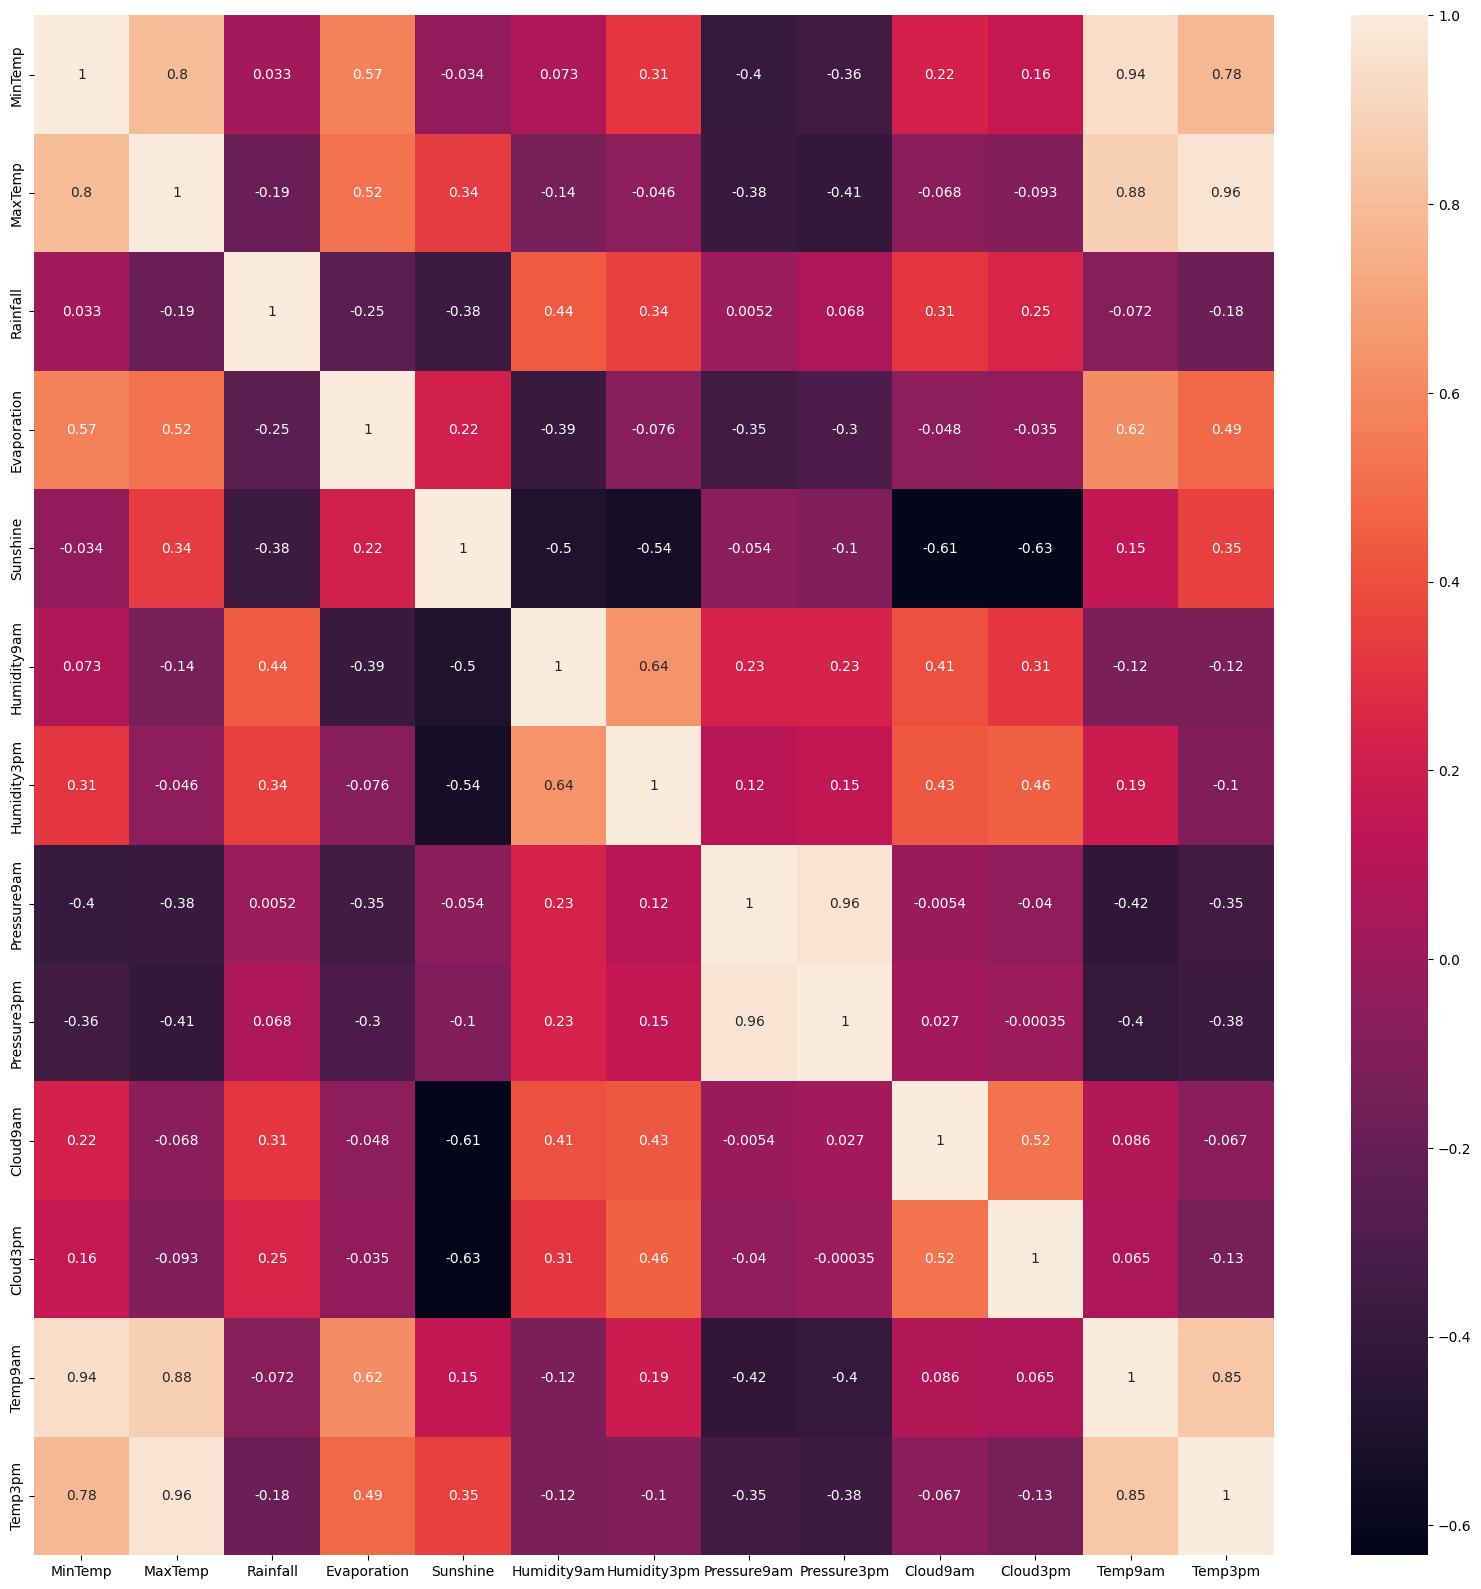

In [9]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


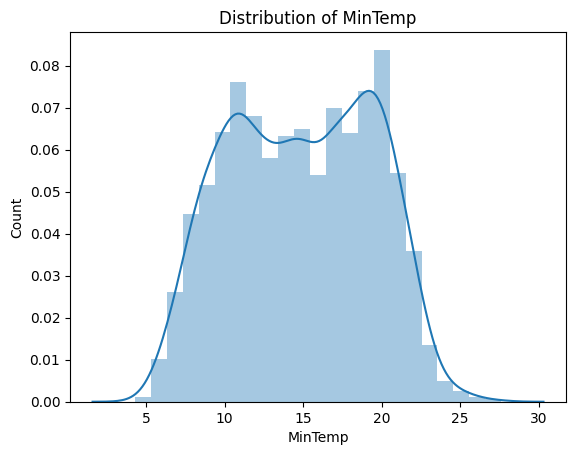

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


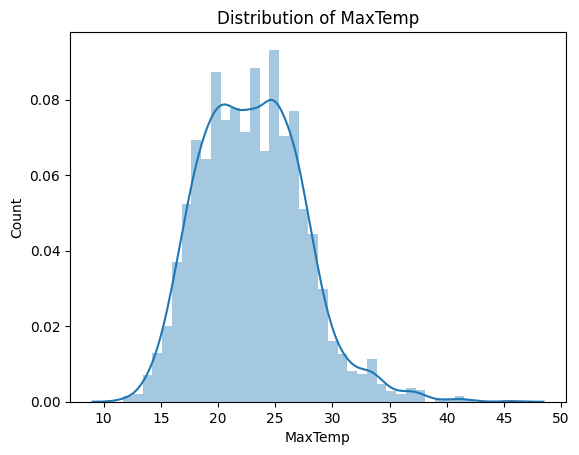

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


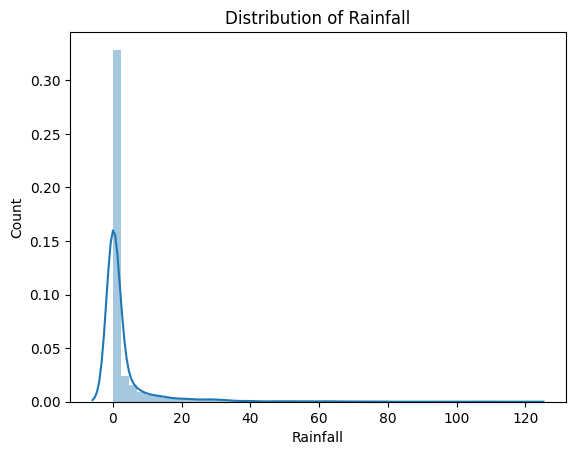

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


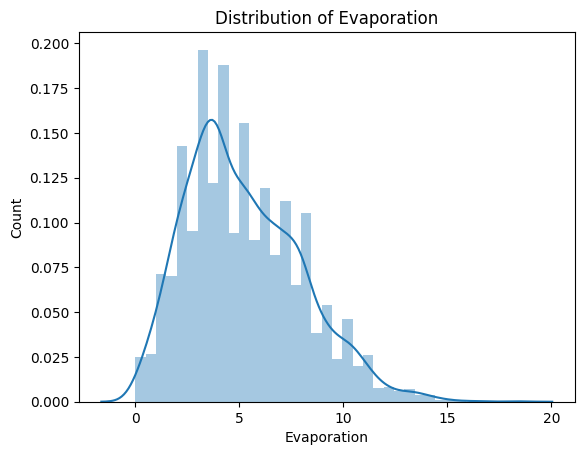

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


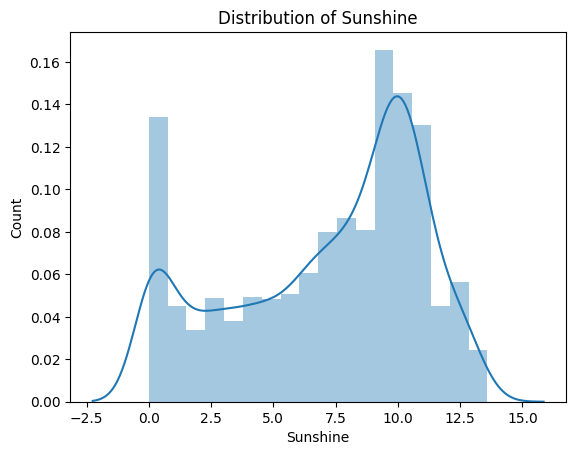

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


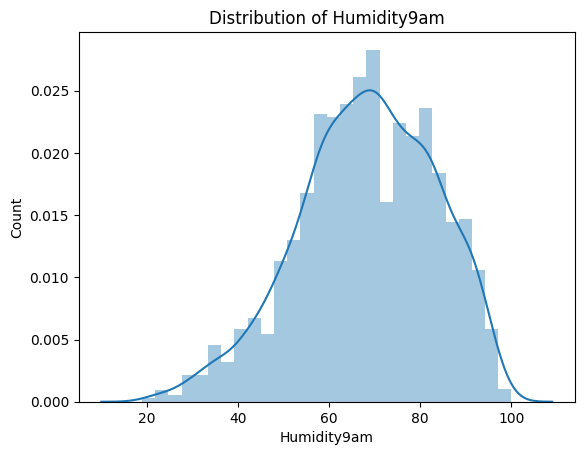

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


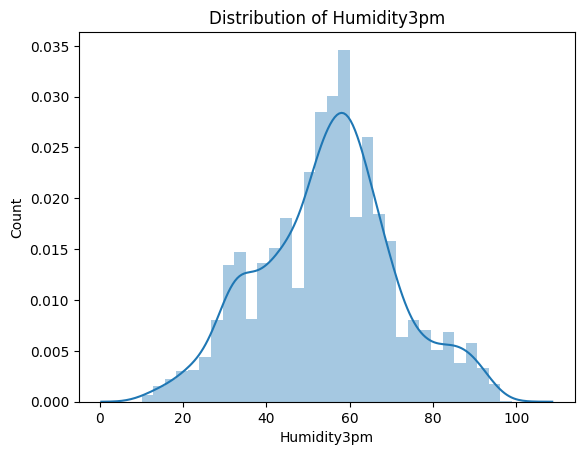

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


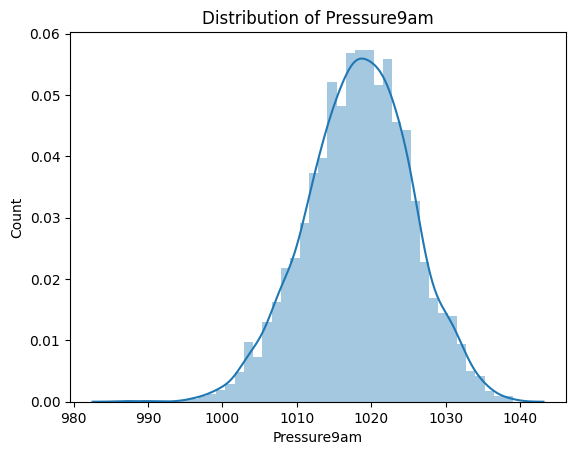

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


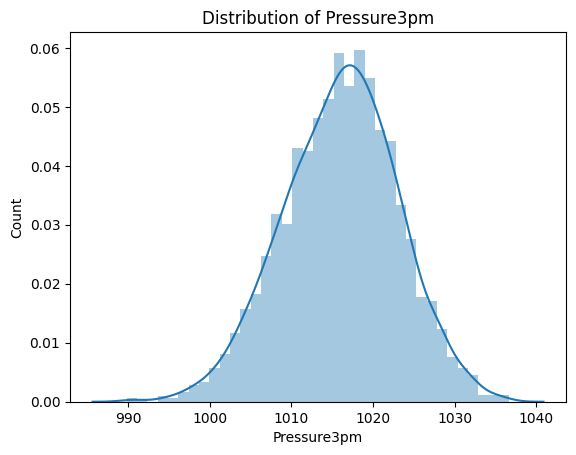

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


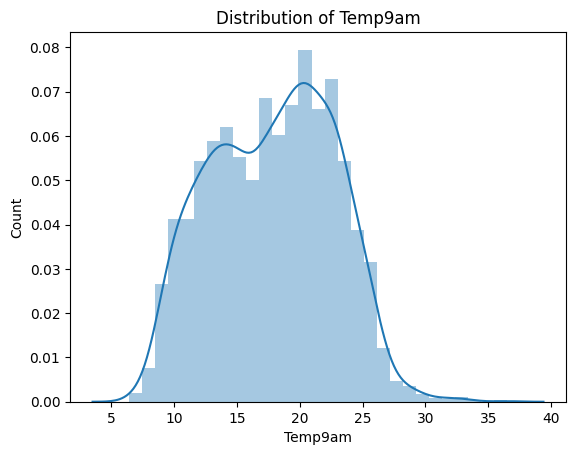

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1394828844.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


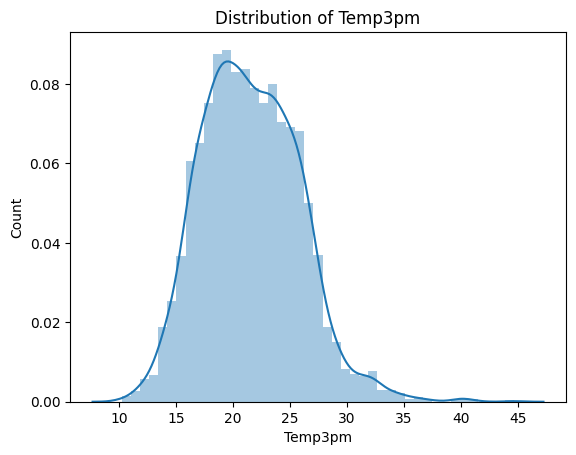

In [10]:

# continuous_feature is a list of continuous feature names
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.show()  # Moved plt.show() inside the loop


In [11]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,21-06-2017,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,22-06-2017,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,23-06-2017,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,24-06-2017,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


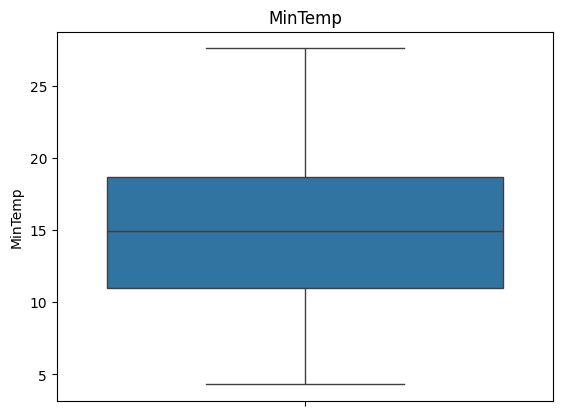

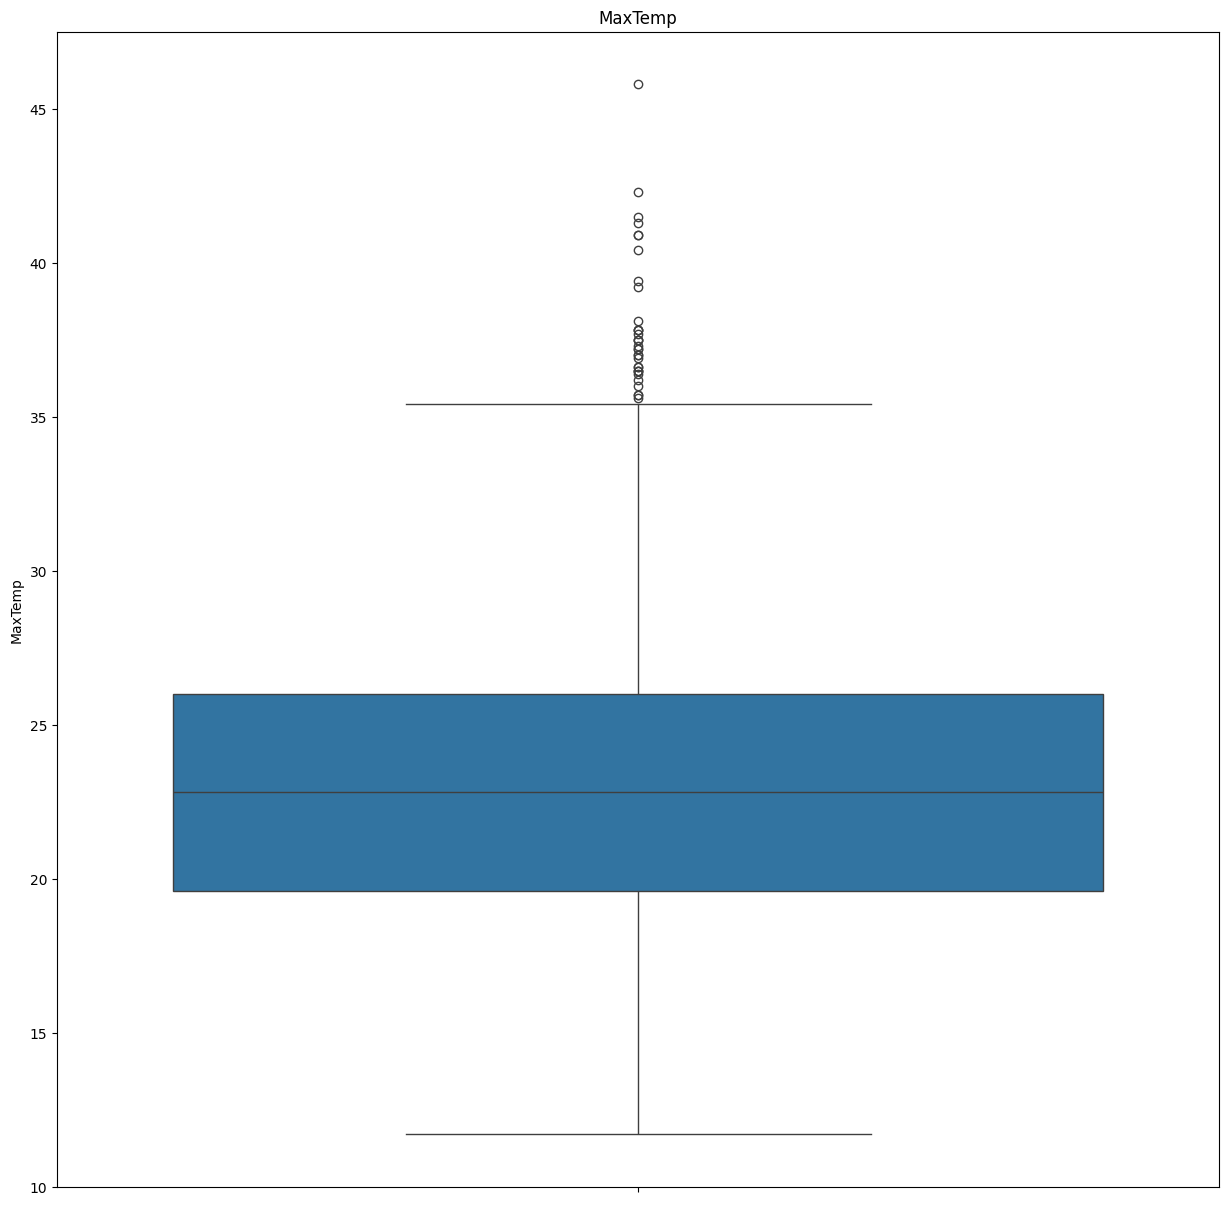

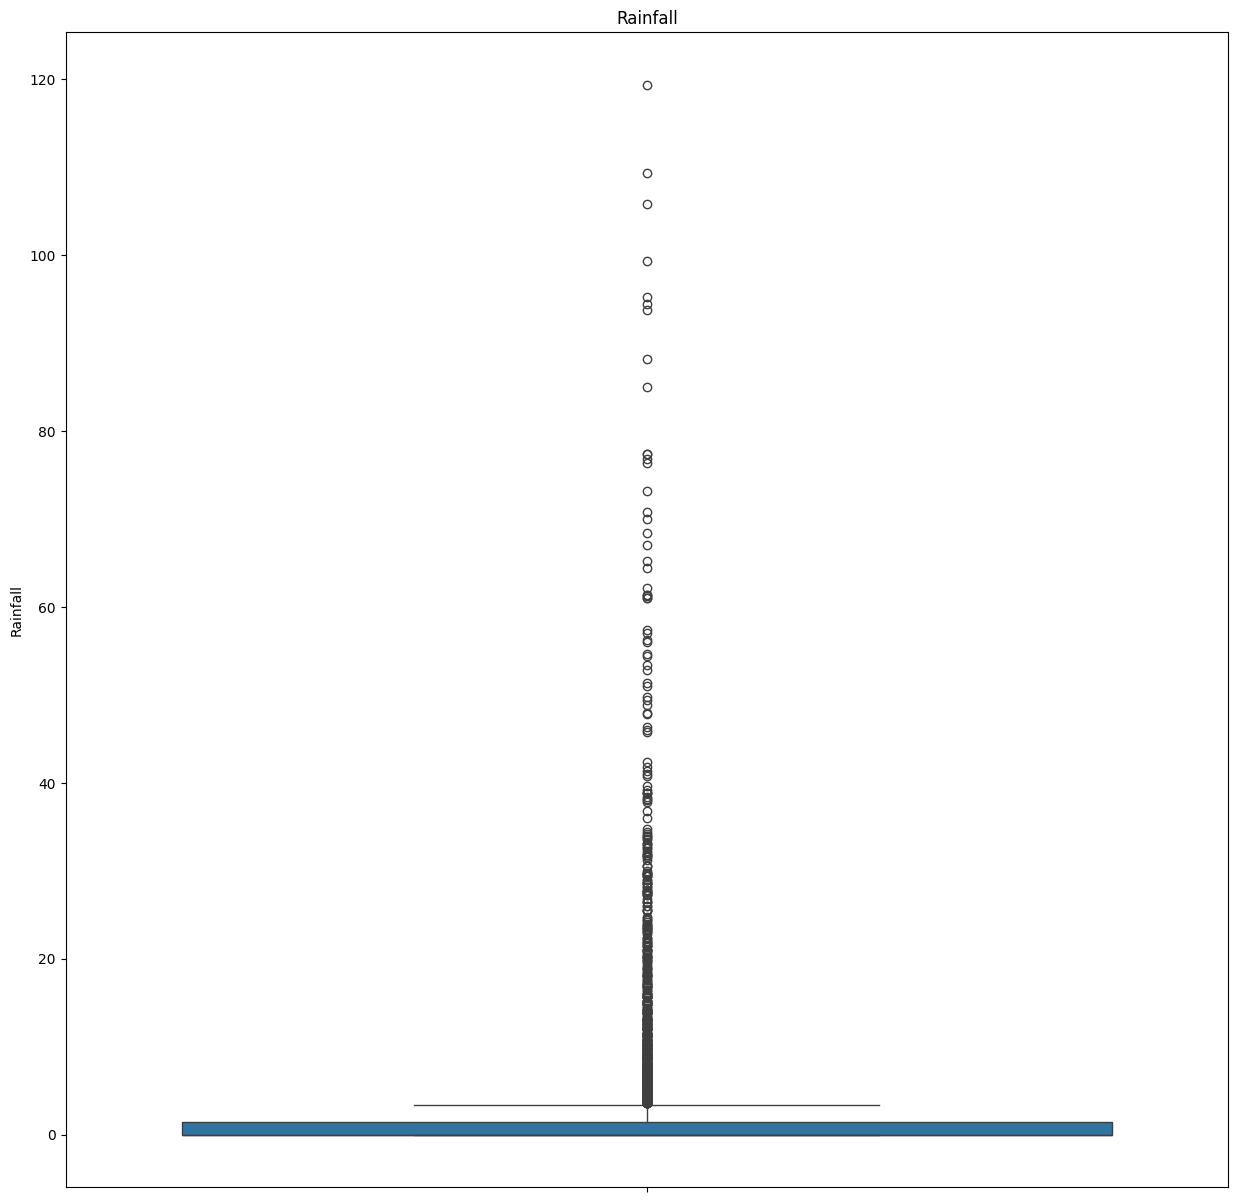

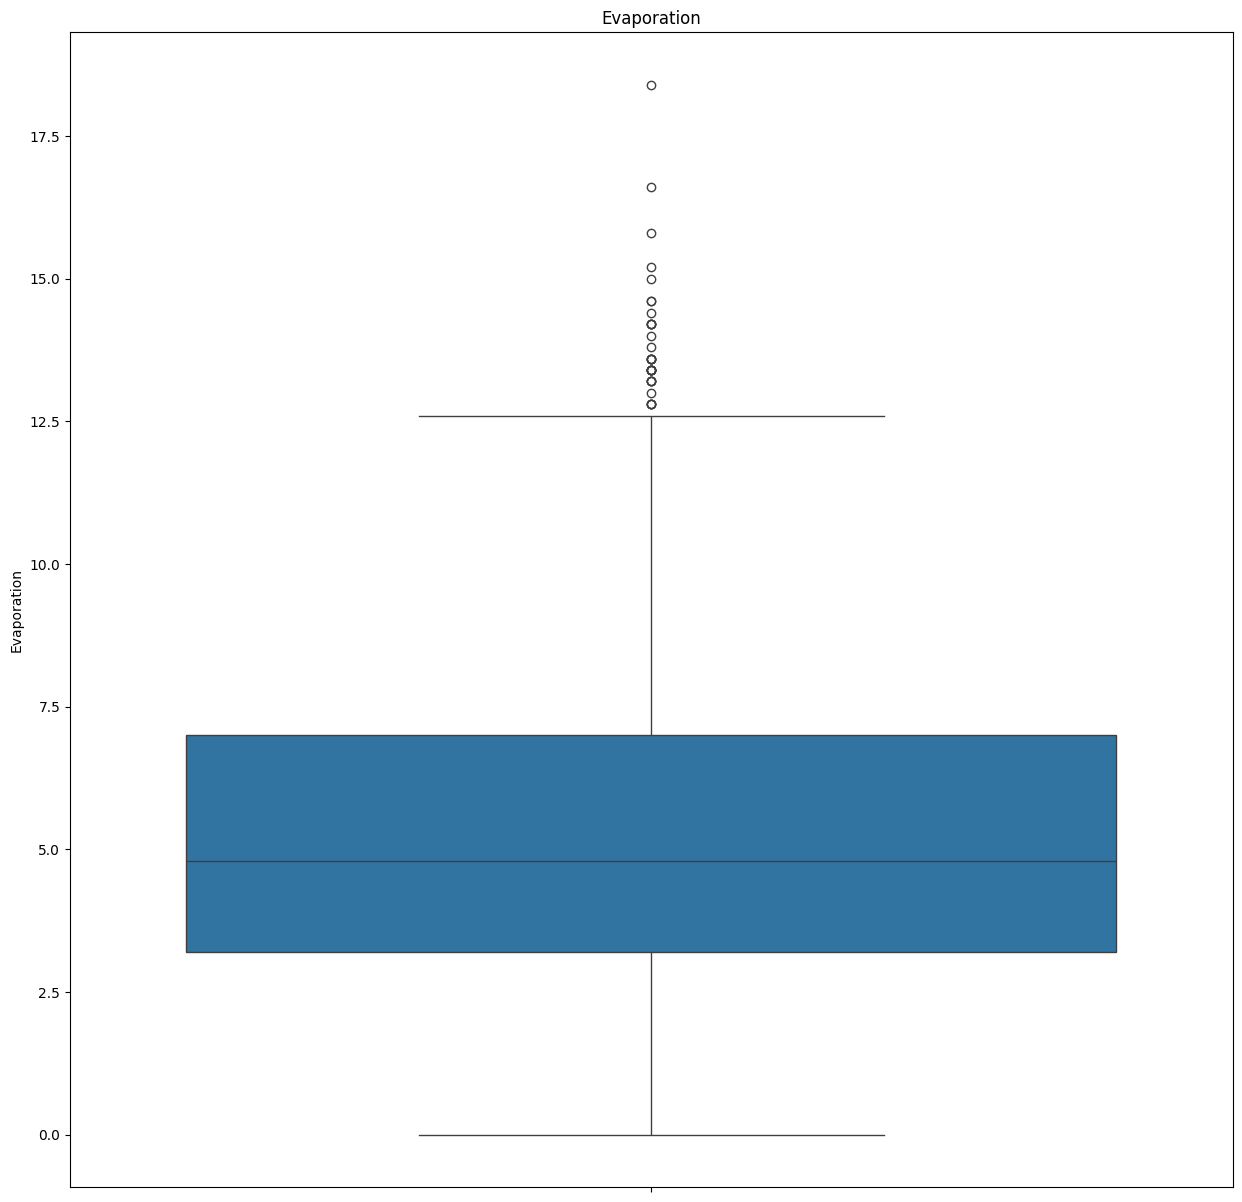

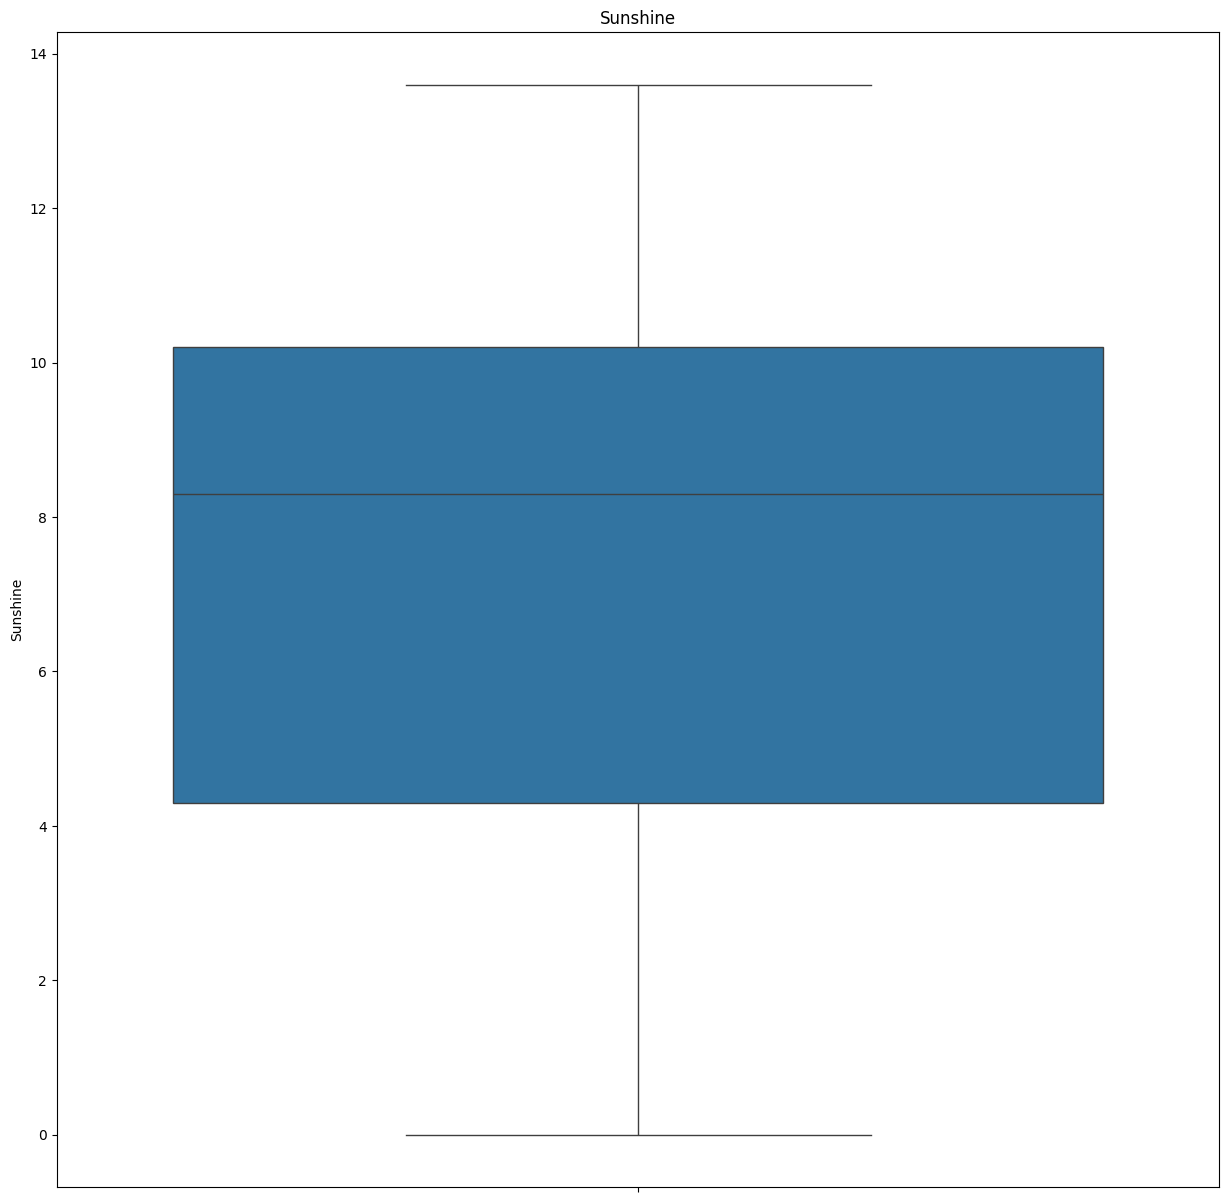

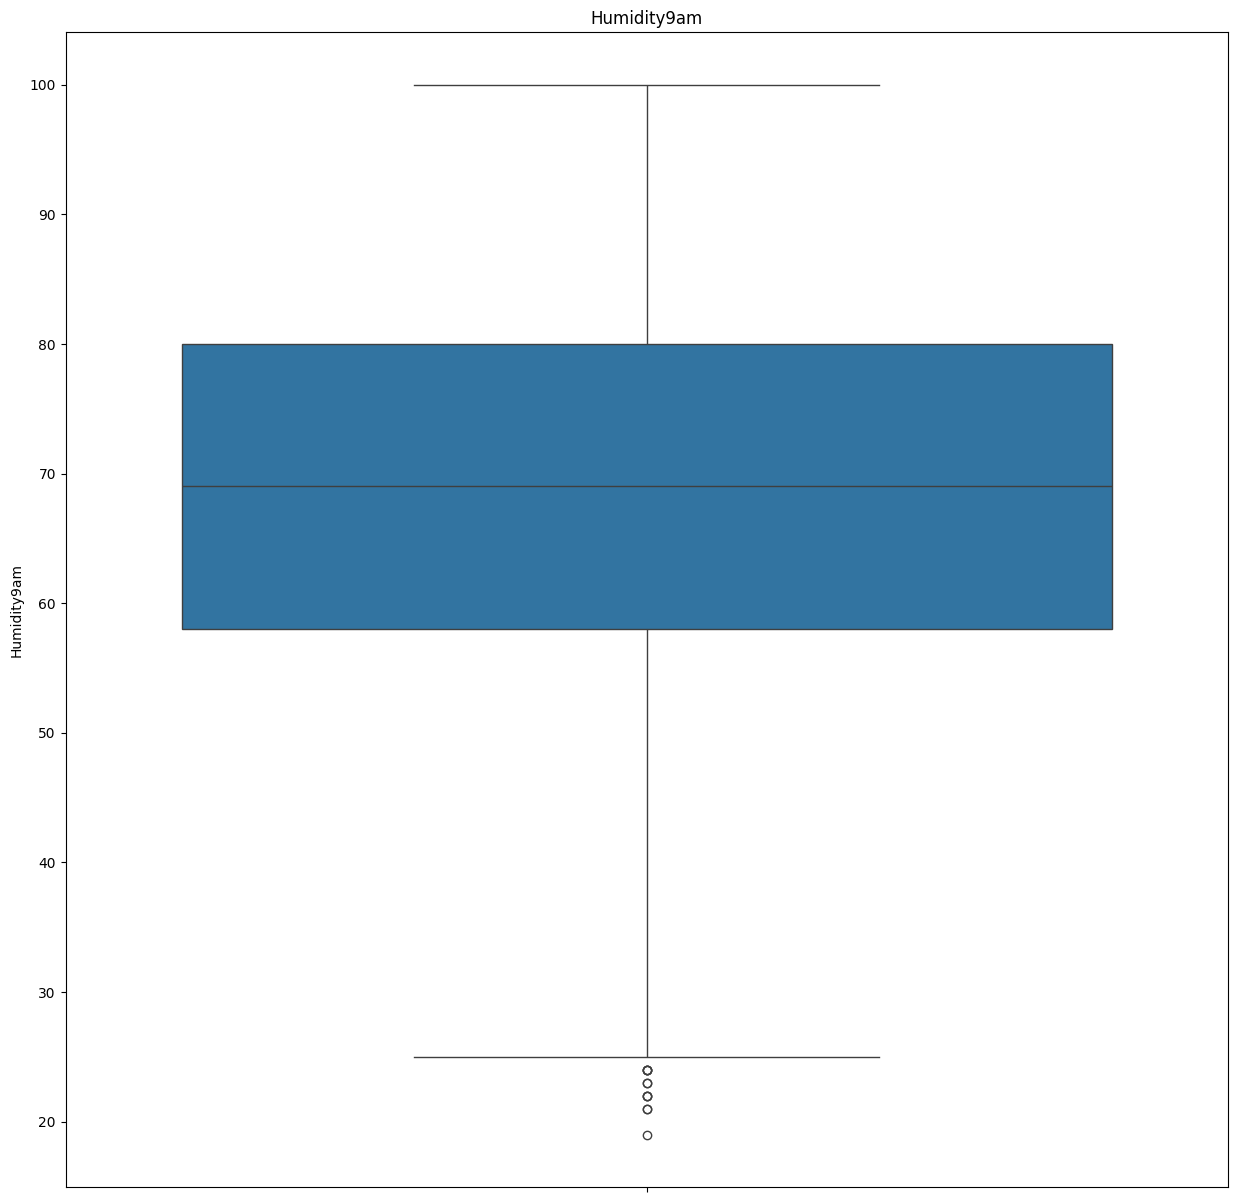

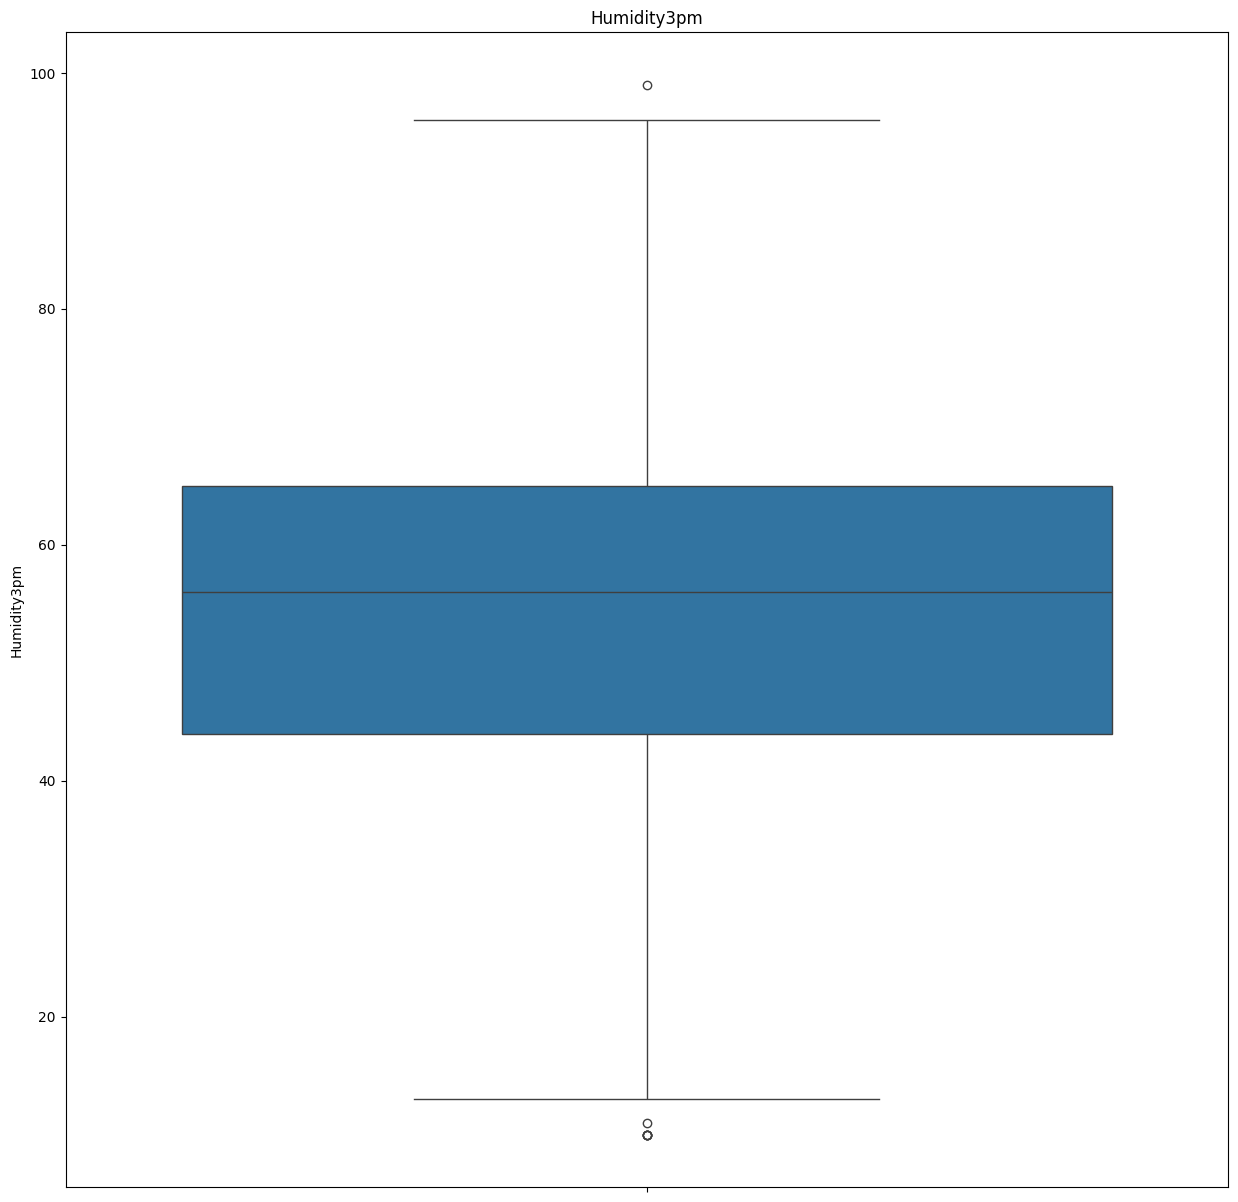

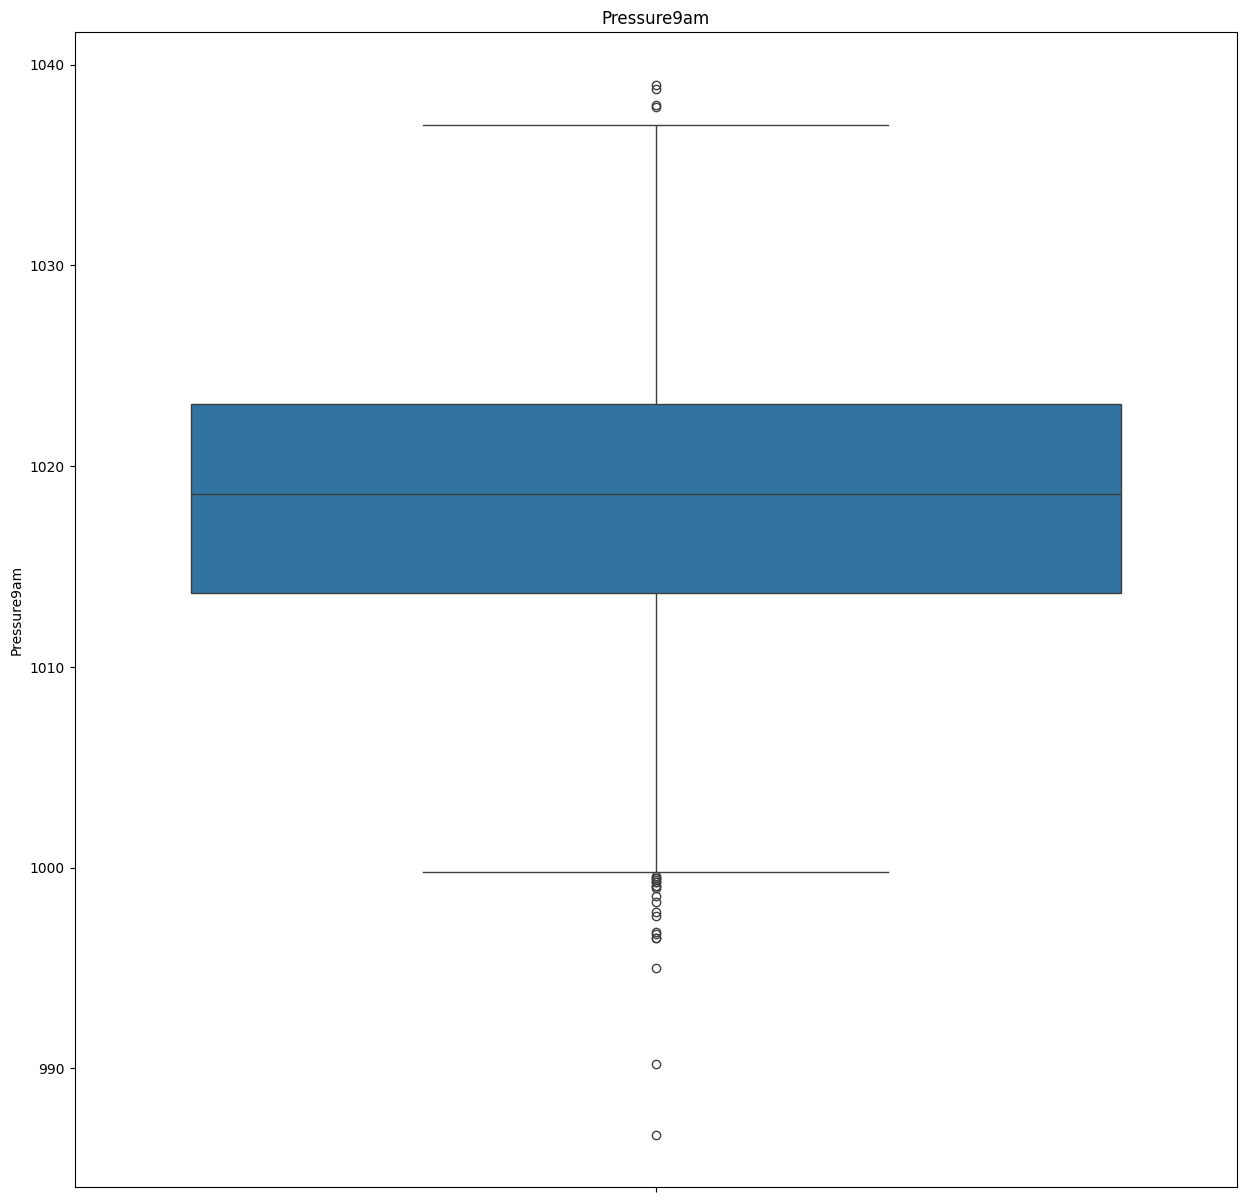

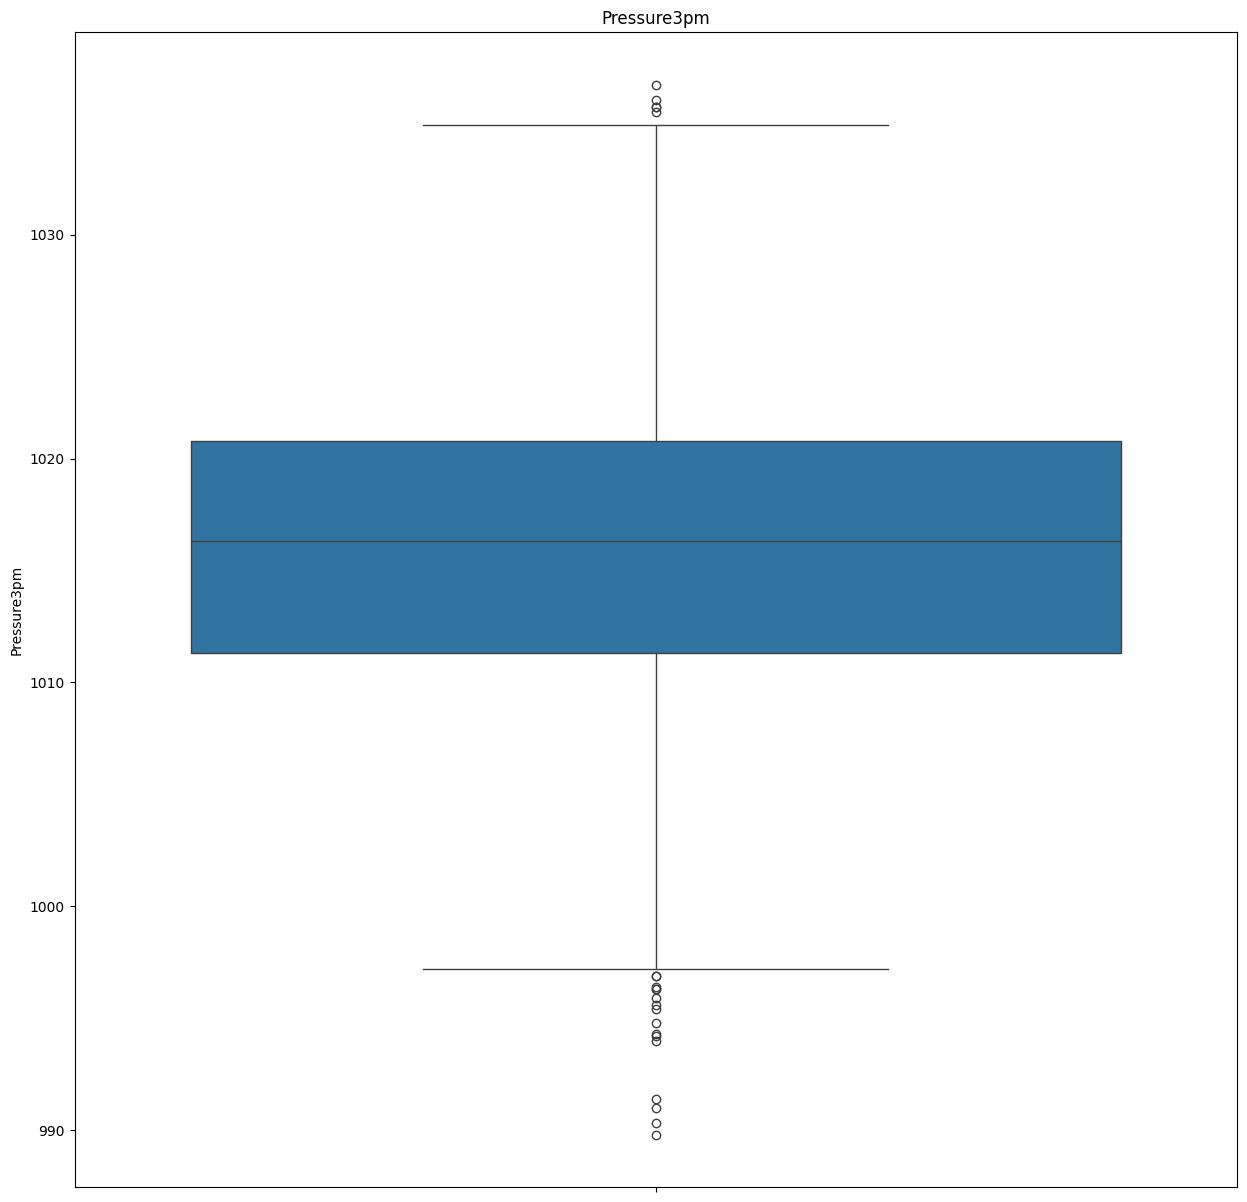

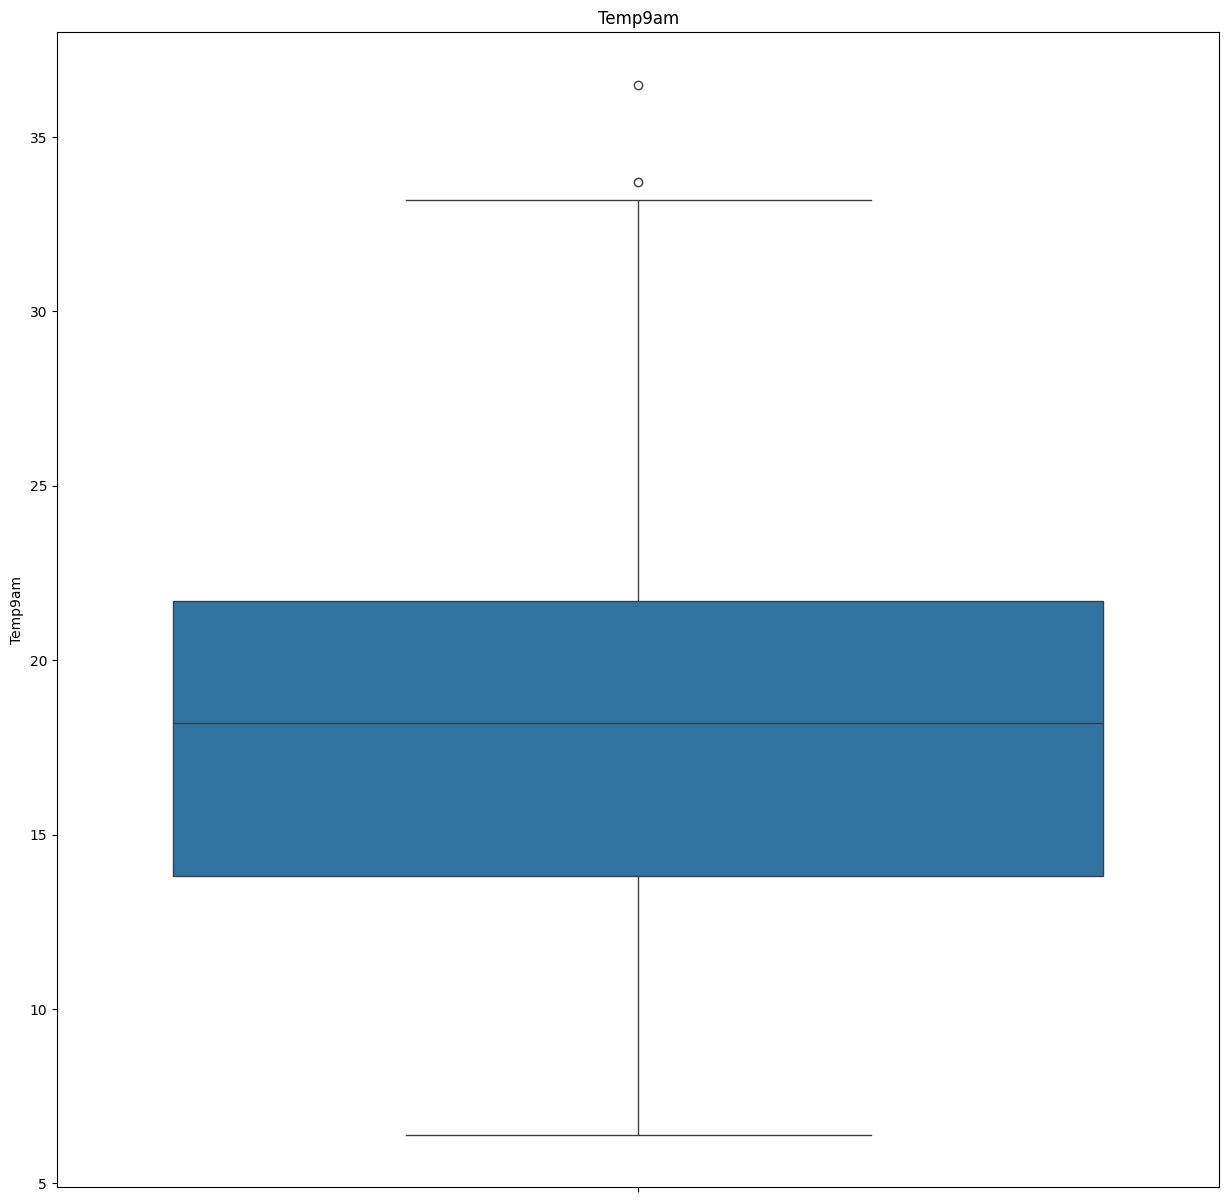

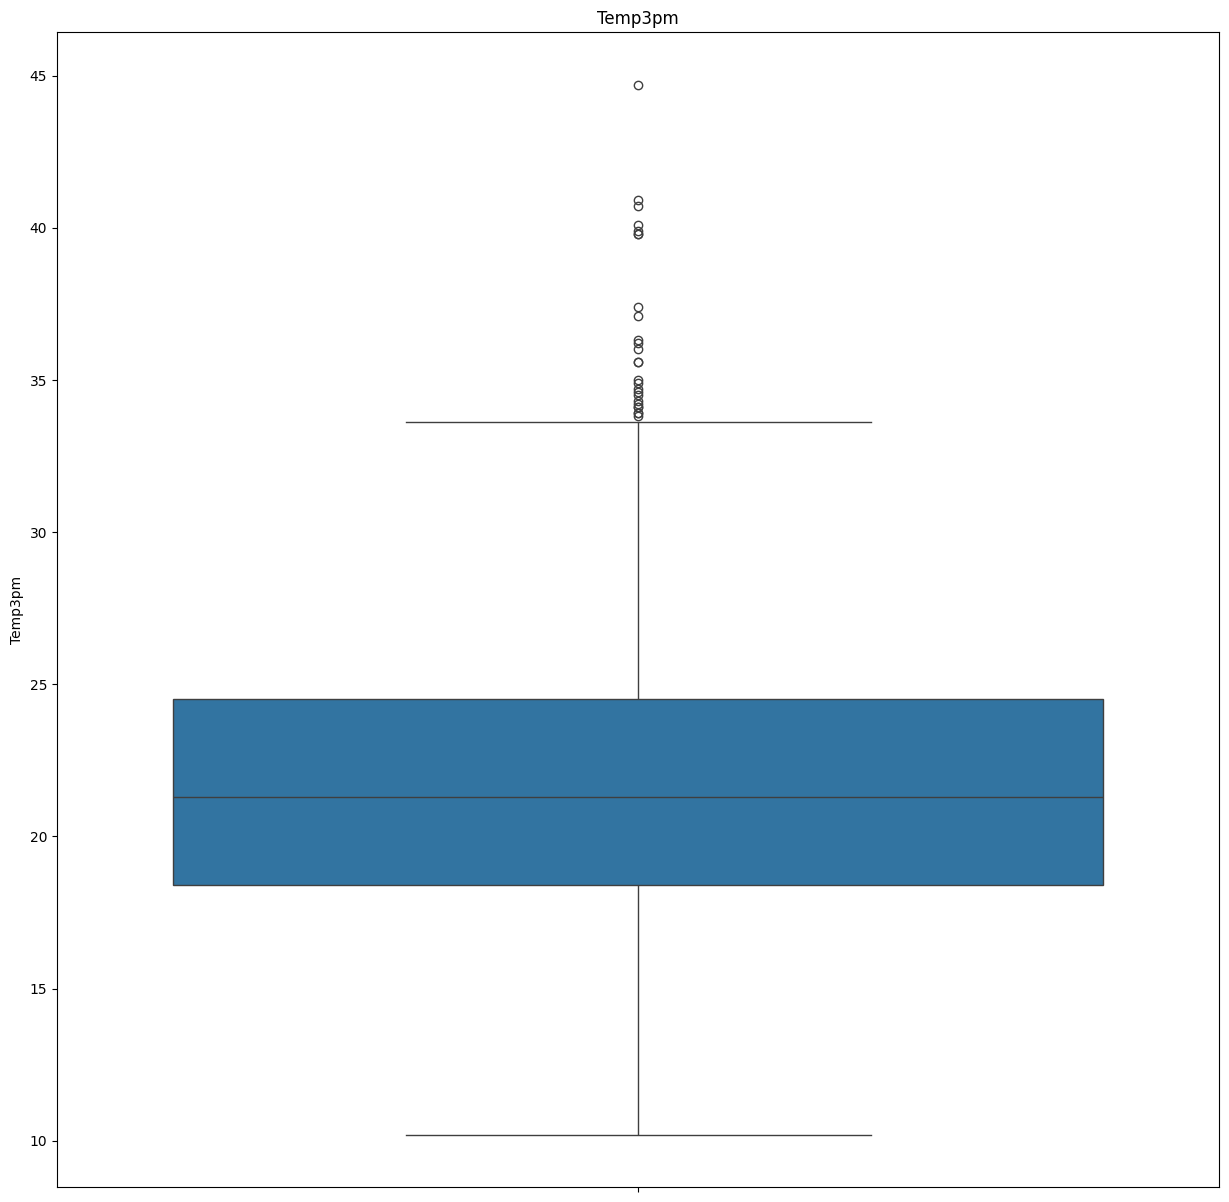

<Figure size 1500x1500 with 0 Axes>

In [12]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [13]:
#filling median in all null values for continuous feature
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [14]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       6
RainTomorrow    0
dtype: int64

In [15]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [16]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

<AxesSubplot: xlabel='count', ylabel='RainTomorrow'>

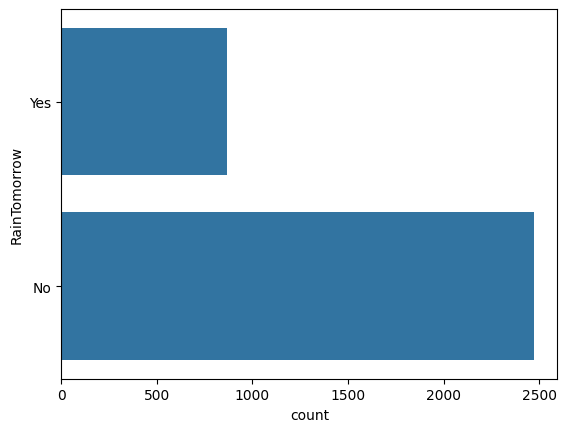

In [17]:
sns.countplot(df["RainTomorrow"])

In [18]:
#Getting dummies for rain today and rain tomarrow
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,05-02-2008,Sydney,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,05-02-2008,Sydney,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [20]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['18-06-2013', '06-10-2012', '06-07-2010', '24-05-2011', '06-07-2012',
       '24-05-2012', '27-06-2013', '24-05-2013', '06-07-2016', '13-03-2015',
       ...
       '12-10-2013', '12-09-2013', '12-09-2014', '12-09-2015', '12-09-2016',
       '12-10-2008', '12-10-2009', '12-10-2010', '12-10-2011', '31-12-2016'],
      dtype='object', name='Date', length=3337)
Location Index(['Sydney'], dtype='object', name='Location')
RainToday UInt64Index([1, 0], dtype='uint64', name='RainToday')
RainTomorrow UInt64Index([1, 0], dtype='uint64', name='RainTomorrow')


In [21]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1035262635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


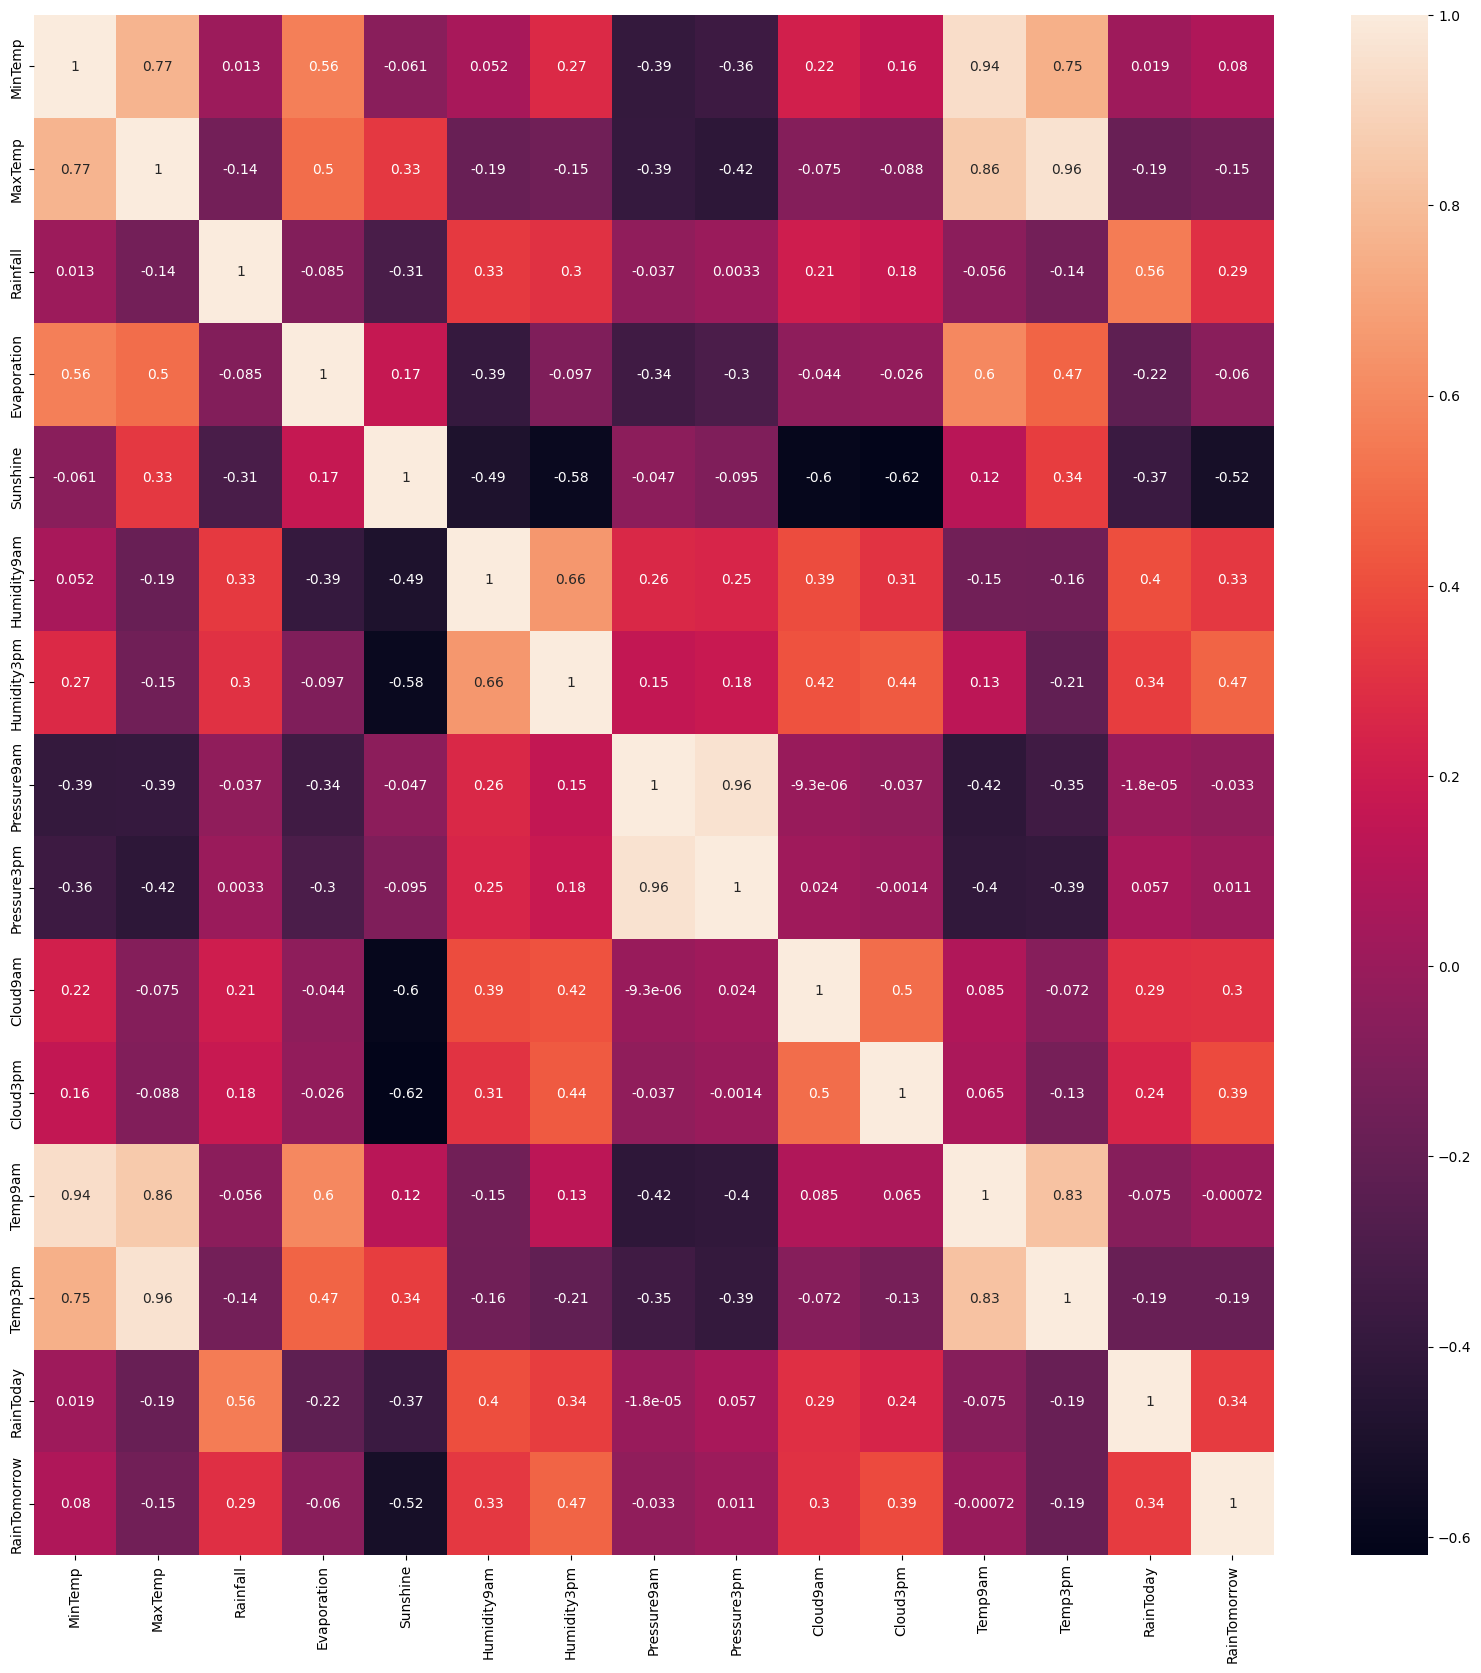

In [22]:
#calculating the correlation matrix (corrmat) for the DataFrame df
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [23]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [24]:
# Converting Date column to datetime object, handling errors by coercing them to NaT
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT', errors='coerce')

In [25]:
# Replacing NaT values with NaN
df['Date'].fillna(pd.NaT, inplace=True)


In [26]:

# Imputing NaN values with the first day of the month
df['Date'] = df['Date'].fillna(pd.to_datetime('1900-01-01'))


In [27]:
# Extracting month and day into separate columns
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

In [28]:
# Displaying the DataFrame to check the changes
print("DataFrame after conversion and cleaning:")
print(df.head())

DataFrame after conversion and cleaning:
        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 1900-01-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 1900-01-01   Sydney     19.5     25.6       6.0          3.4       2.7   
2 1900-01-01   Sydney     21.6     24.5       6.6          2.4       0.1   
3 1900-01-01   Sydney     20.2     22.8      18.8          2.2       0.0   
4 1900-01-01   Sydney     19.7     25.7      77.4          8.4       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTom

In [29]:
df=df

In [30]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,1900-01-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,1,1
1,1900-01-01,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,1,1
2,1900-01-01,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,1,1
3,1900-01-01,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,1,1
4,1900-01-01,Sydney,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1,1


In [31]:
#deleting location because it has only one location sydney
del df['Location']

In [32]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,1900-01-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,1,1
1,1900-01-01,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,1,1
2,1900-01-01,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,1,1
3,1900-01-01,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,1,1
4,1900-01-01,19.7,25.7,77.4,8.4,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,1900-01-01,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0,1,1
3333,1900-01-01,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0,1,1
3334,1900-01-01,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0,1,1
3335,1900-01-01,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0,1,1


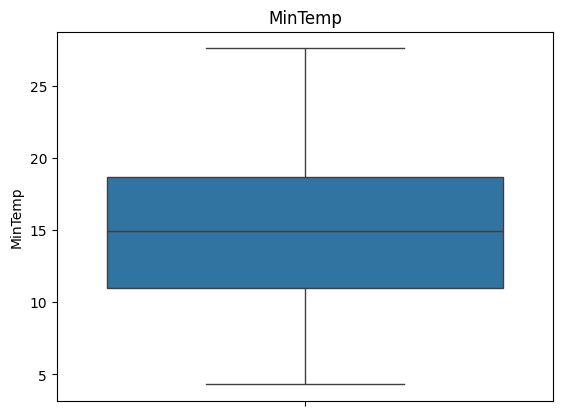

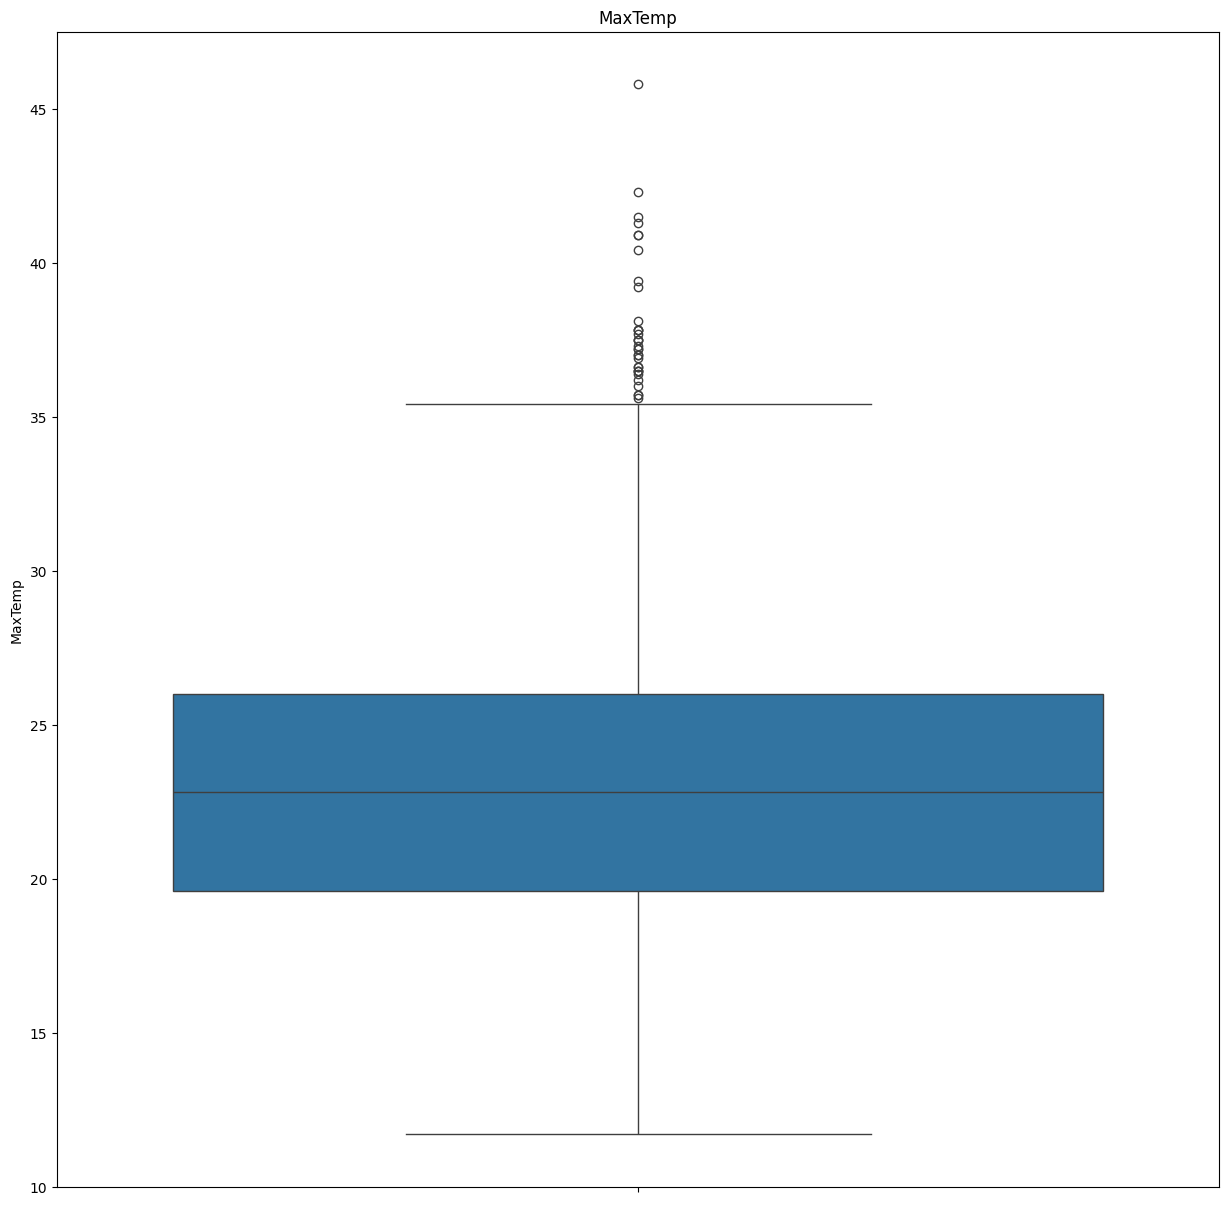

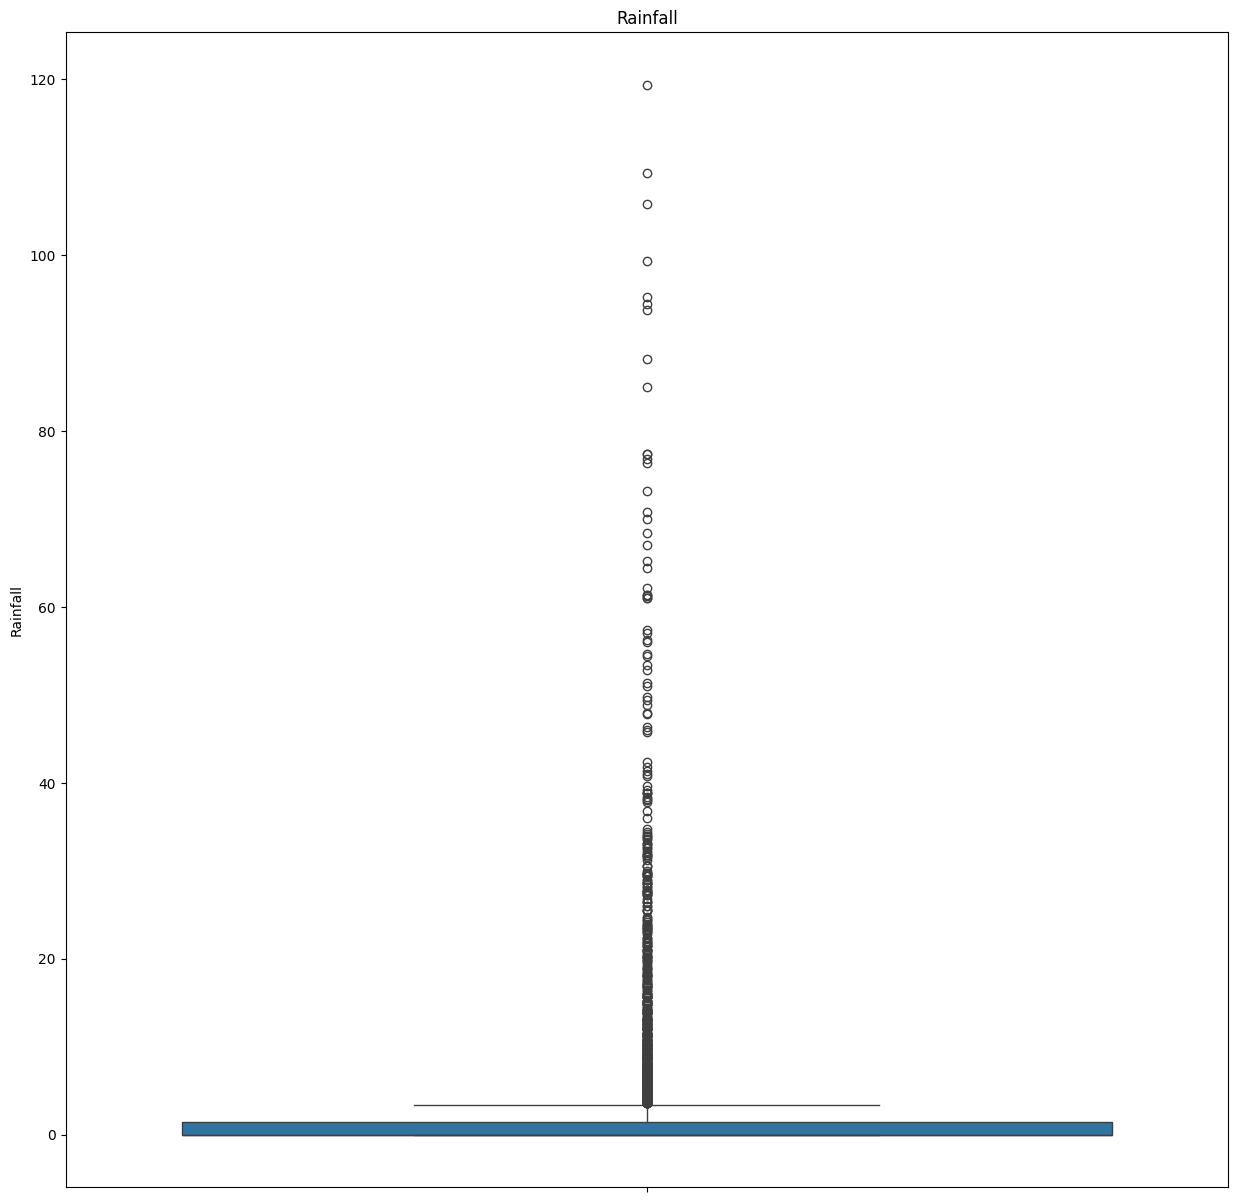

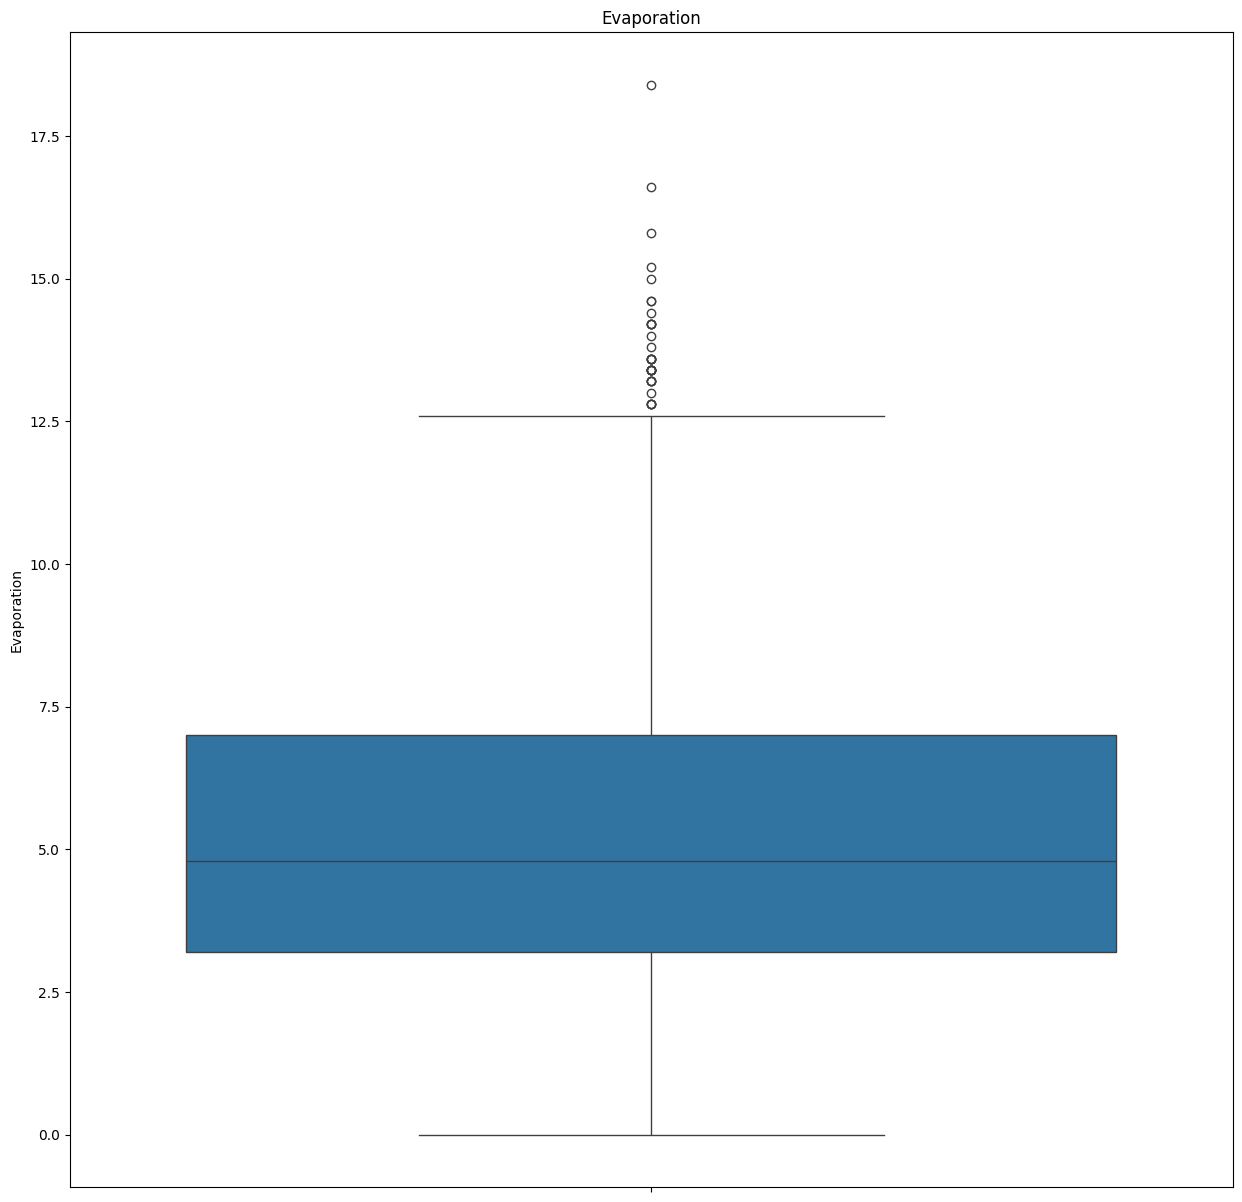

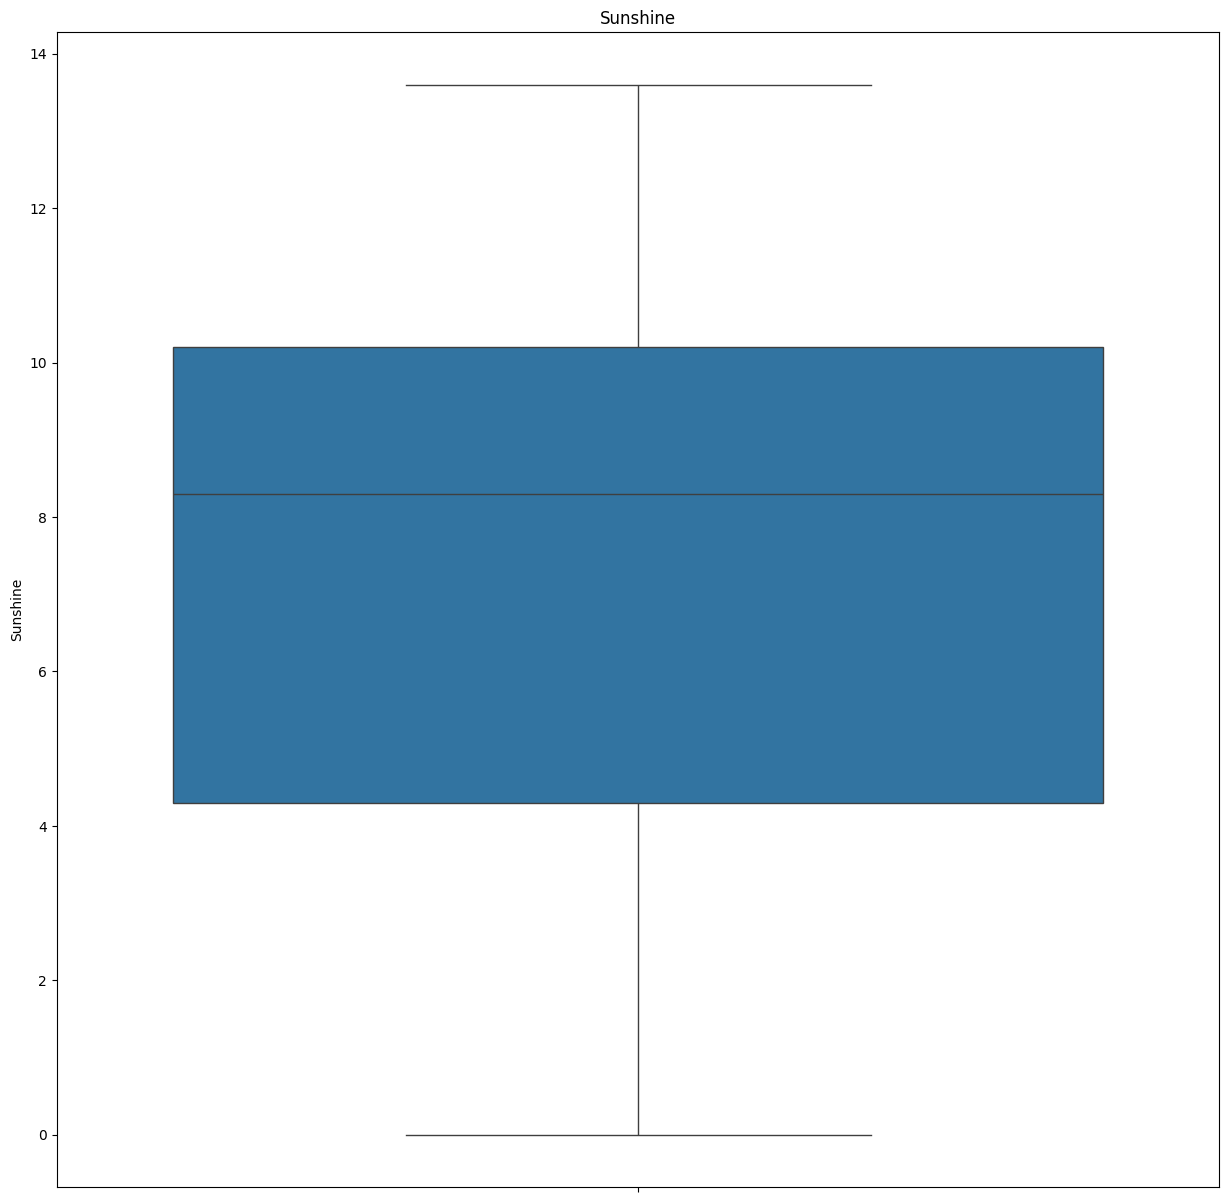

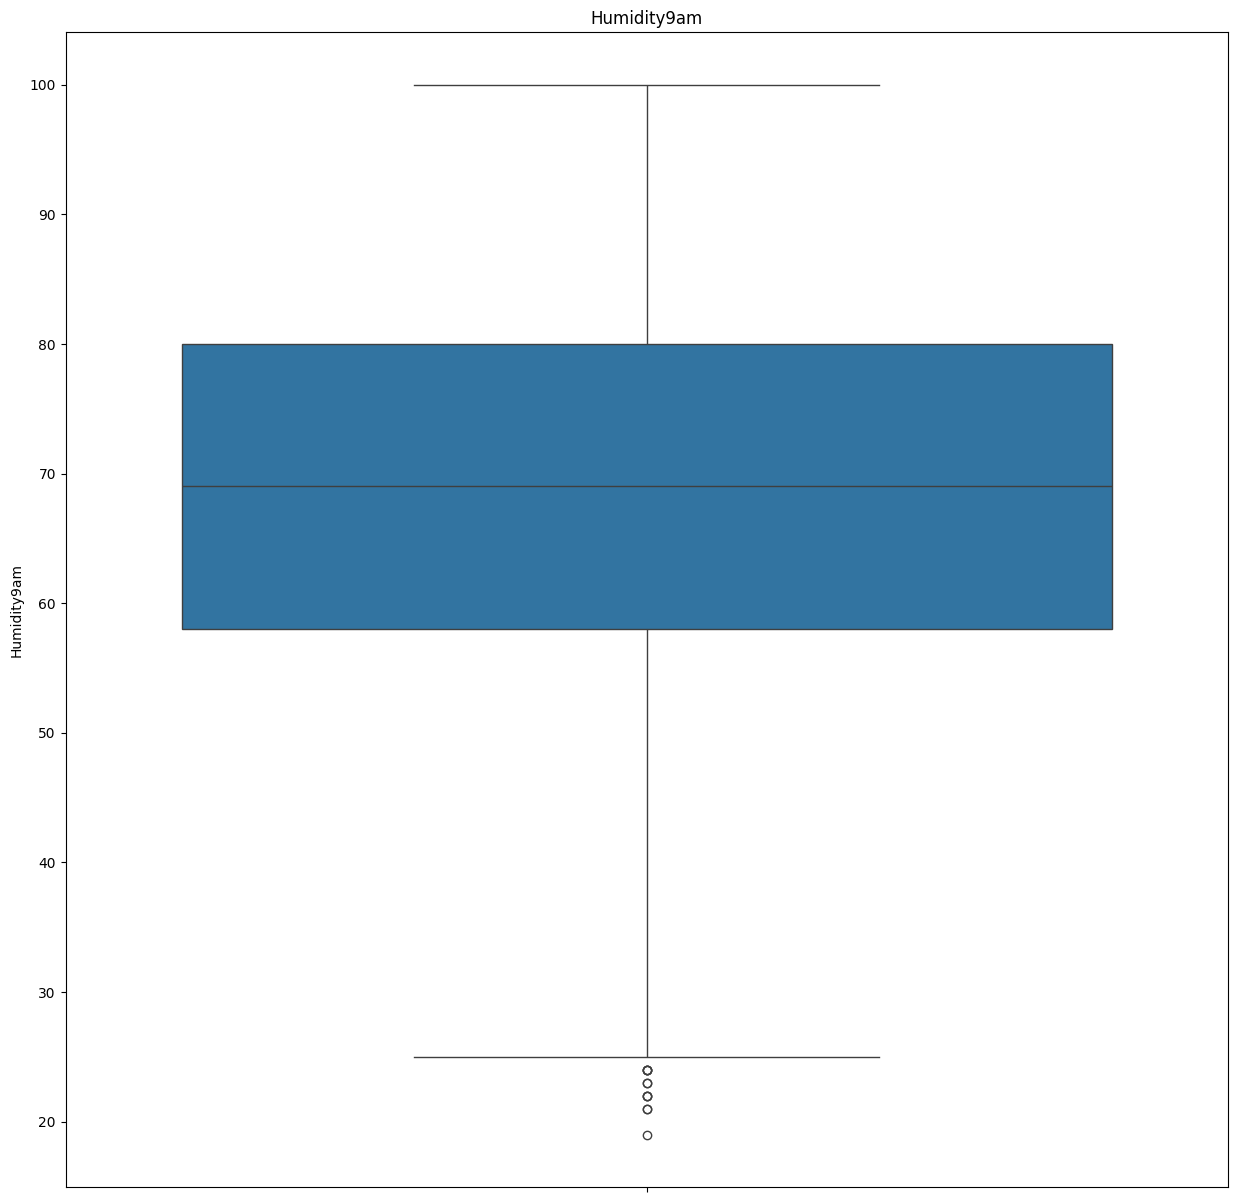

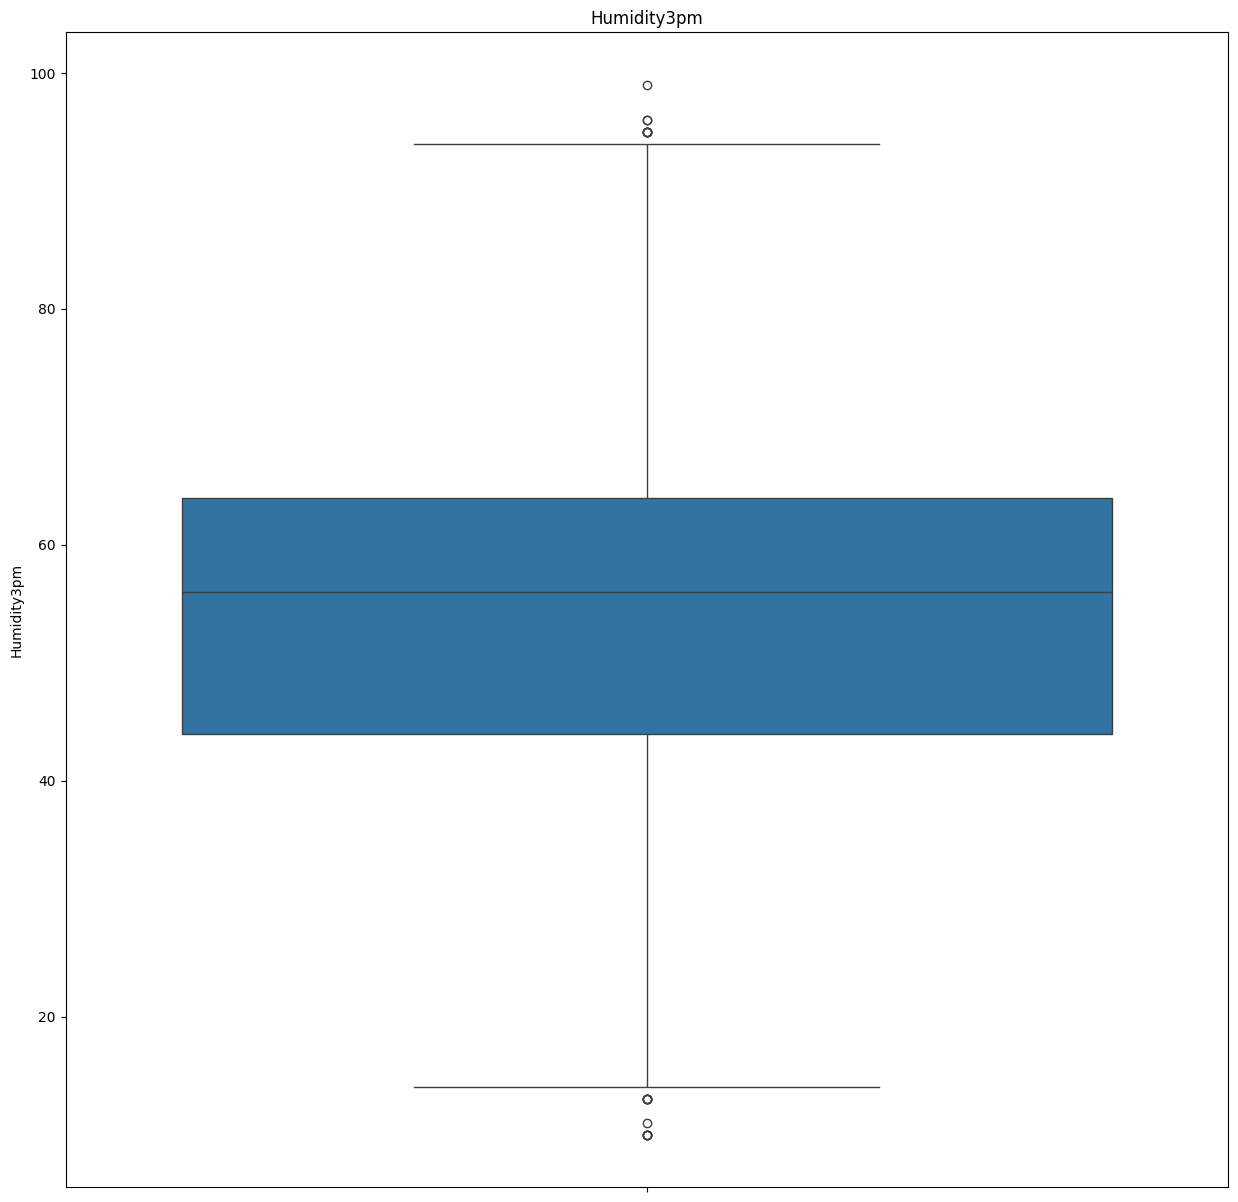

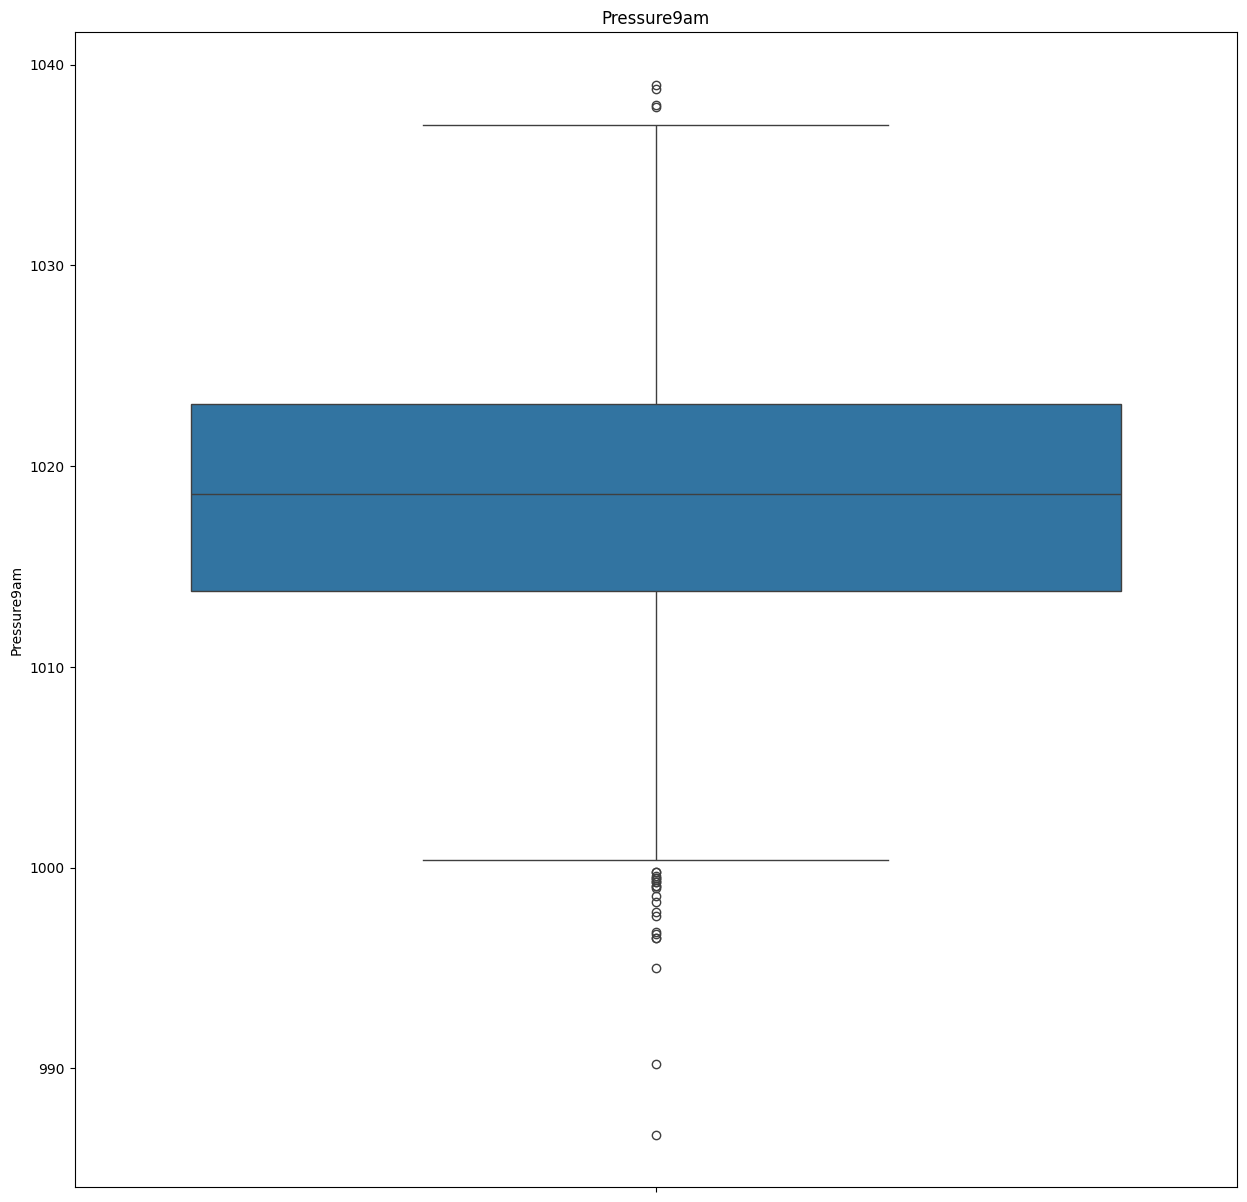

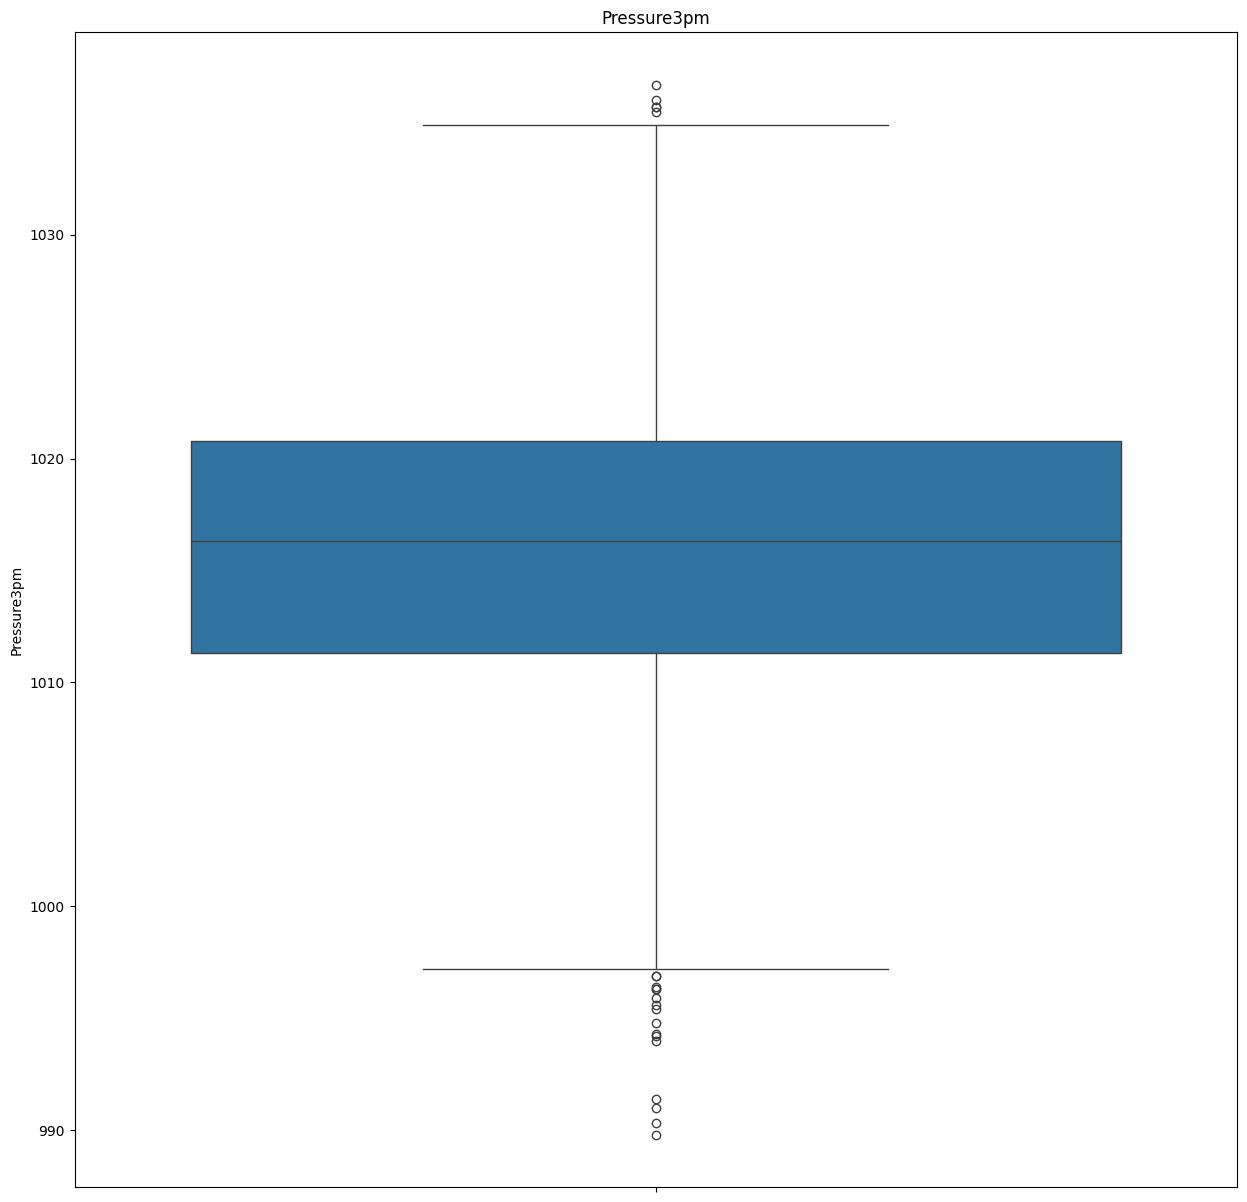

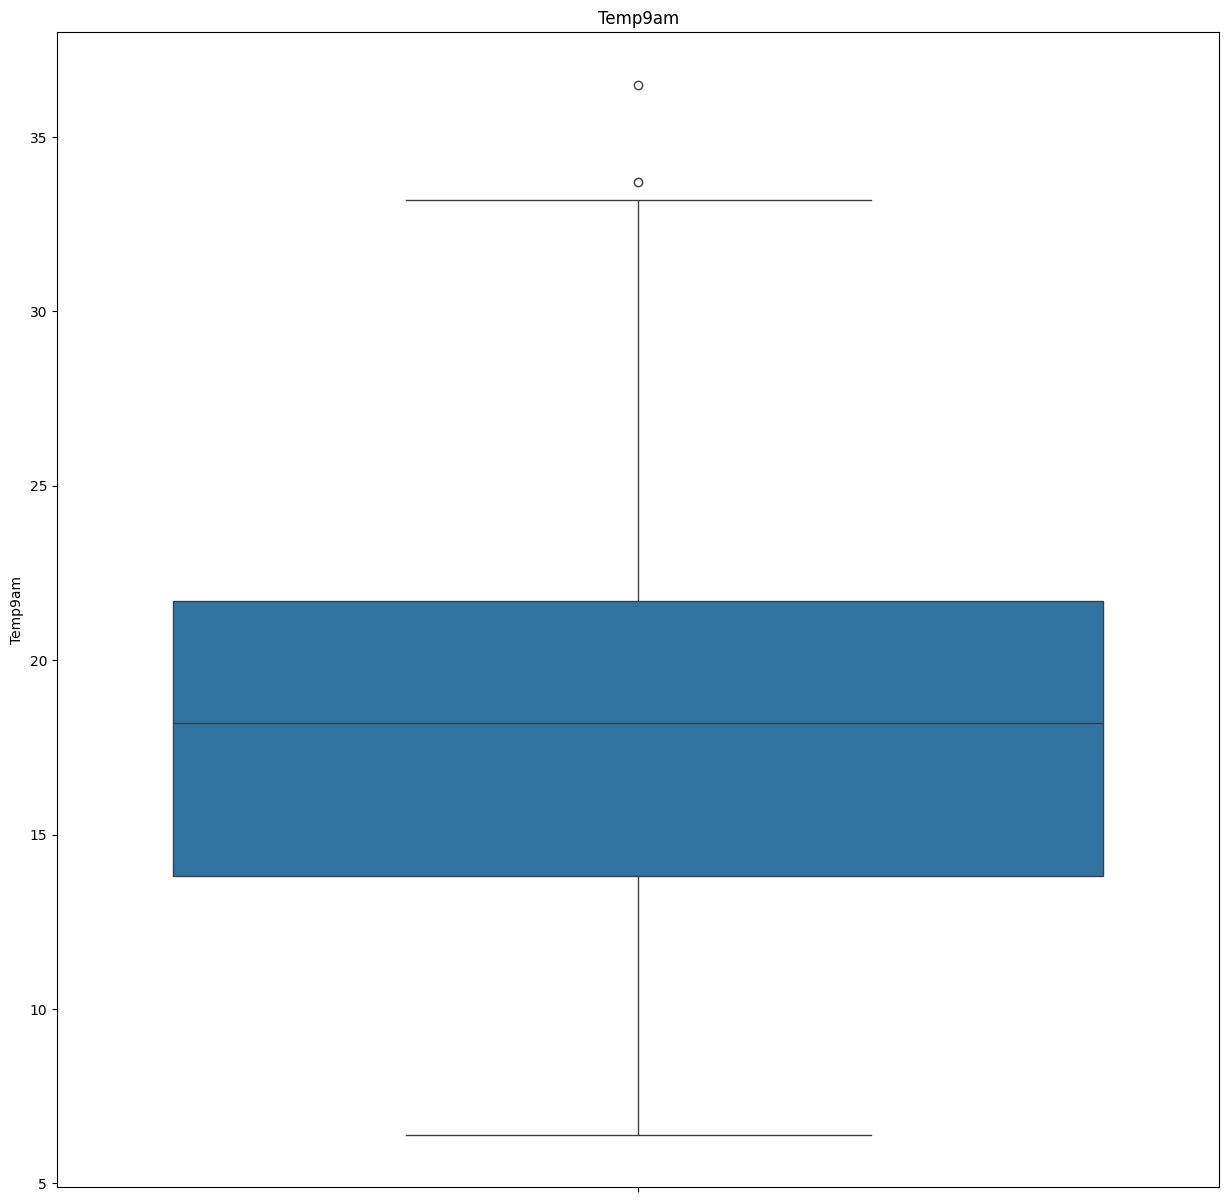

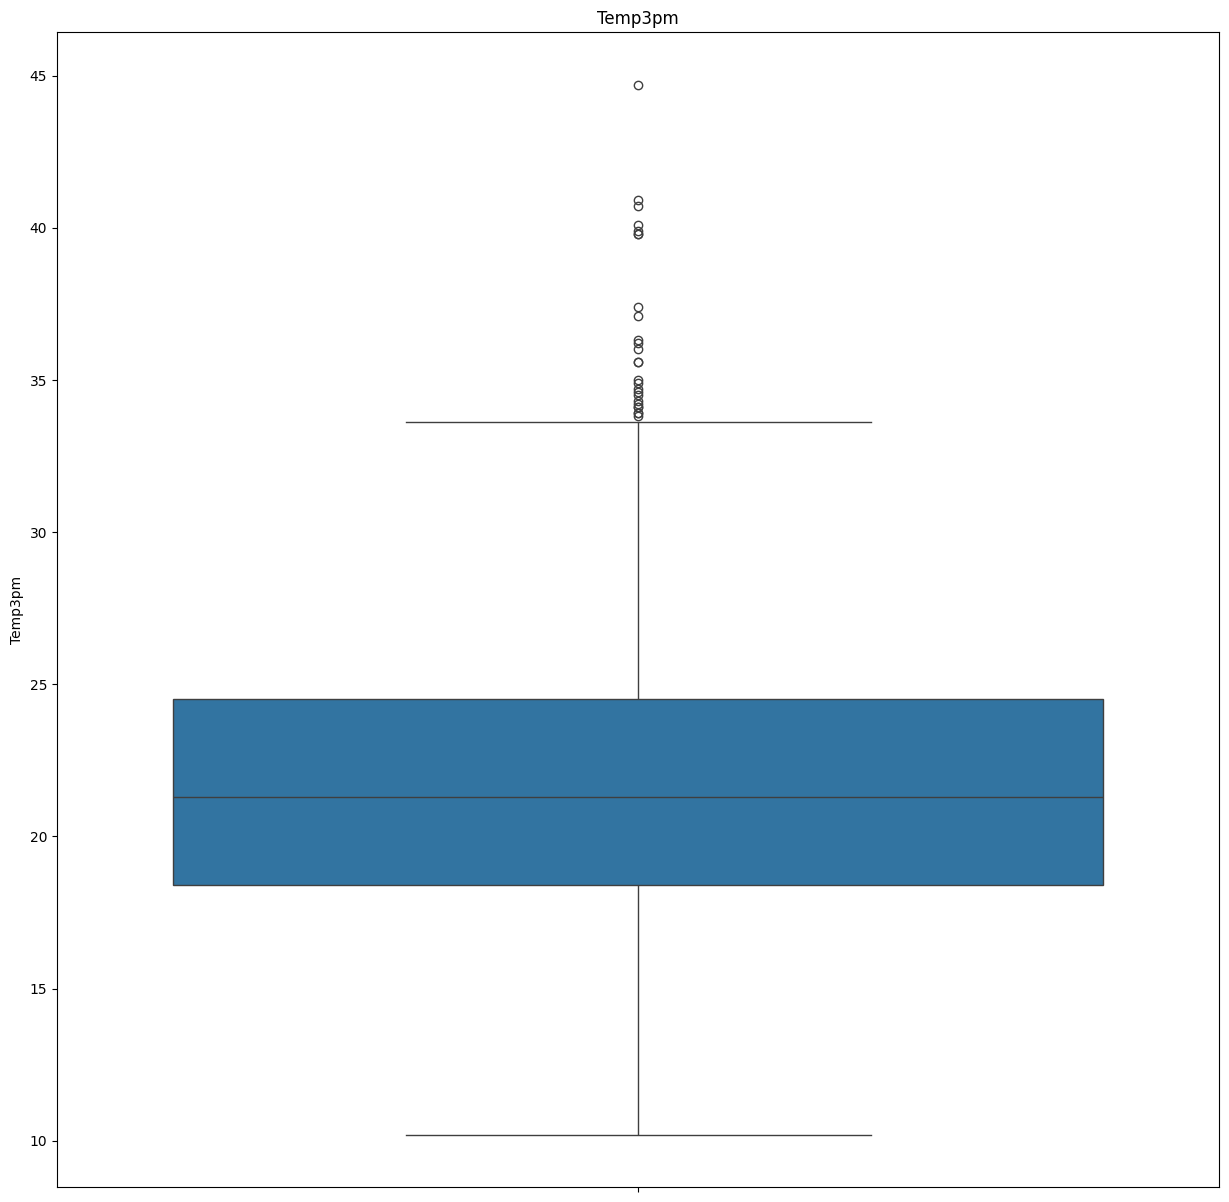

<Figure size 1500x1500 with 0 Axes>

In [33]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [34]:
#Checking continuous featues
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [35]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.5499999999999989 30.25


### Explanation:

We're calculating the Interquartile Range (IQR) of the 'MinTemp' column in our DataFrame 'df'. The IQR is a measure of statistical dispersion and is used to identify outliers.

- We find the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3).
- Then, we calculate the lower and upper bridges using the formula:
  - Lower bridge = Q1 - (1.5 * IQR)
  - Upper bridge = Q3 + (1.5 * IQR)

These bridges help identify potential outliers in our data. Values below the lower bridge or above the upper bridge are considered outliers.


In [36]:
df.loc[df['MinTemp']>=30.25,'MinTemp']=30.25
df.loc[df['MinTemp']<=-0.54,'MinTemp']=-0.54

### Explanation:

We're modifying the values in the 'MinTemp' column of our DataFrame 'df' based on certain conditions:

1. **Setting Upper Bound**: Any value in the 'MinTemp' column greater than or equal to 30.25 is replaced with 30.25. This is done to cap the maximum temperature value at 30.25, likely to handle outliers or extreme values.

2. **Setting Lower Bound**: Any value in the 'MinTemp' column less than or equal to -0.54 is replaced with -0.54. This is done to set a lower limit on the temperature values, likely to handle outliers or ensure consistency with a predefined range.

These operations help to manage extreme values or outliers in the 'MinTemp' column, ensuring that the data falls within acceptable bounds or ranges.
and we will do same for MaxTemp, Evaporation, Humidity ,rainfall etc.

In [37]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

10.000000000000004 35.599999999999994


In [38]:
df.loc[df['MaxTemp']>=35.59,'MaxTemp']=35.5
df.loc[df['MaxTemp']<=10,'MaxTemp']=10

In [39]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.0999999999999996 3.4999999999999996


In [40]:
df.loc[df['Rainfall']>=3.49,'Rainfall']=3.49
df.loc[df['Rainfall']<=-2.09,'Rainfall']=-2.09

In [41]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.499999999999999 12.7


In [42]:
df.loc[df['Evaporation']>=12.7,'Evaporation']=12.7
df.loc[df['Evaporation']<=-2.49,'Evaporation']=-2.49

In [43]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.0 113.0


In [44]:
df.loc[df['Humidity9am']>=113,'Humidity9am']=113
df.loc[df['Humidity9am']<=25,'Humidity9am']=25

In [45]:
IQR=df.Humidity3pm.quantile(0.75)-df.Humidity3pm.quantile(0.25)
lower_bridge=df.Humidity3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

14.0 94.0


In [46]:
df.loc[df['Humidity3pm']>=94,'Humidity3pm']=94
df.loc[df['Humidity3pm']<=14,'Humidity3pm']=14

In [47]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.8499999999999 1037.0500000000002


In [48]:
df.loc[df['Pressure9am']>=1037.05,'Pressure9am']=1037.05
df.loc[df['Pressure9am']<=999.85,'Pressure9am']=999.85

In [49]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

997.05 1035.05


In [50]:
df.loc[df['Pressure3pm']>=1035.05,'Pressure3pm']=1035.05
df.loc[df['Pressure3pm']<=997.05,'Pressure3pm']=997.05

In [51]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9500000000000028 33.55


In [52]:
df.loc[df['Temp9am']>=33.55,'Temp9am']=33.55
df.loc[df['Temp9am']<=1.95,'Temp9am']=1.95

In [53]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

9.249999999999996 33.650000000000006


In [54]:
df.loc[df['Temp3pm']>=33.65,'Temp3pm']=33.65
df.loc[df['Temp3pm']<=9.25,'Temp3pm']=9.25

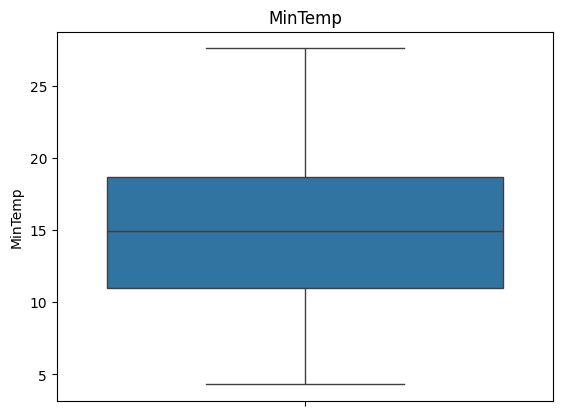

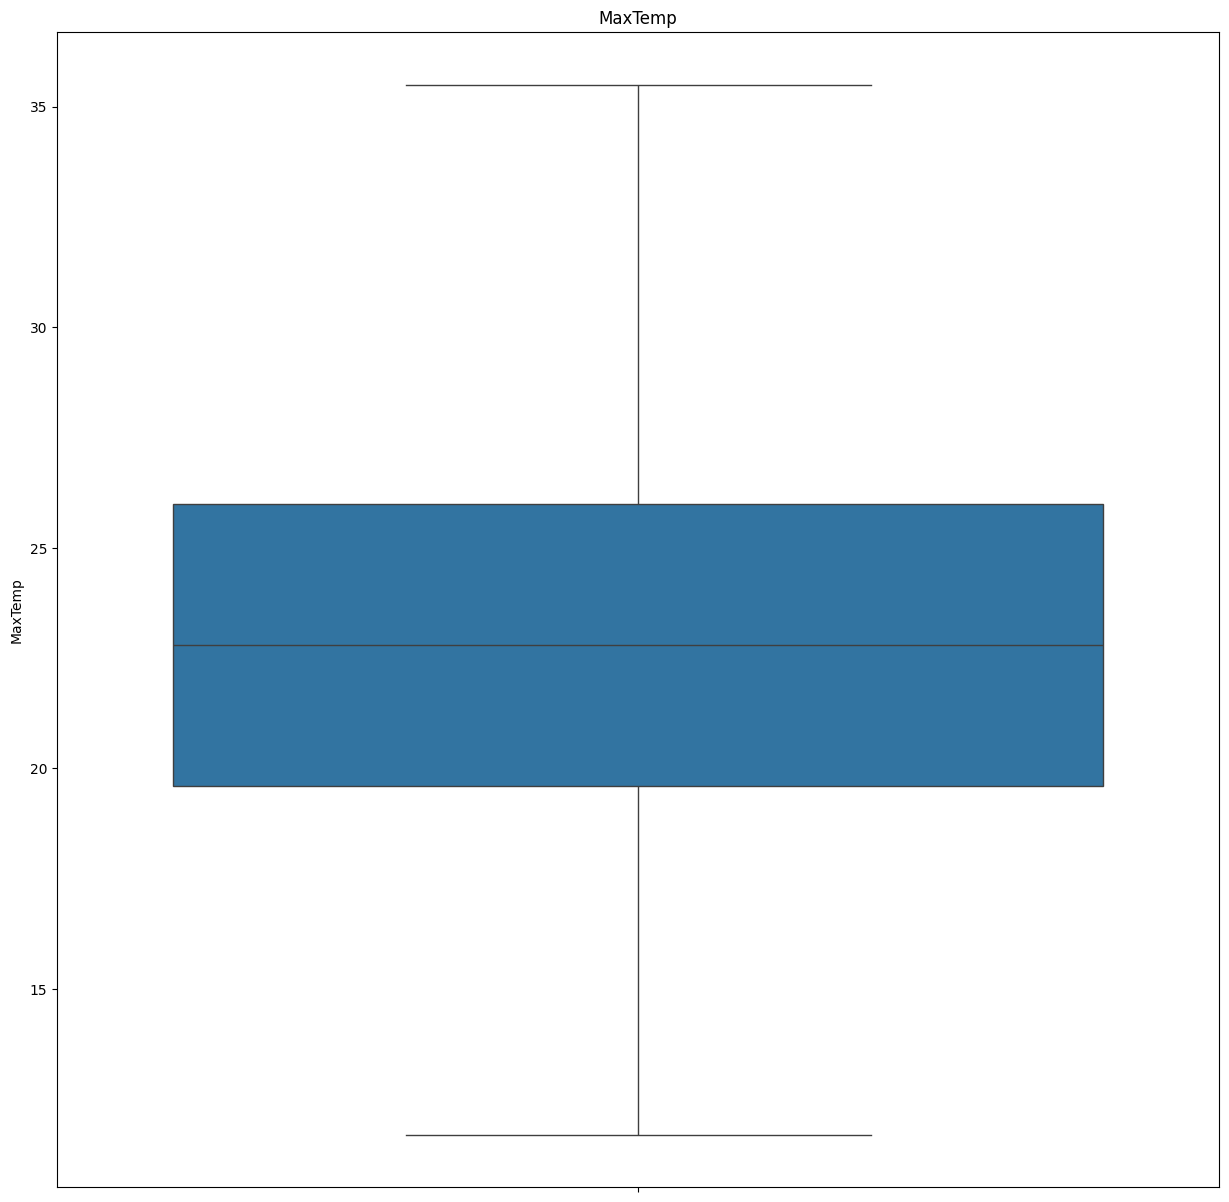

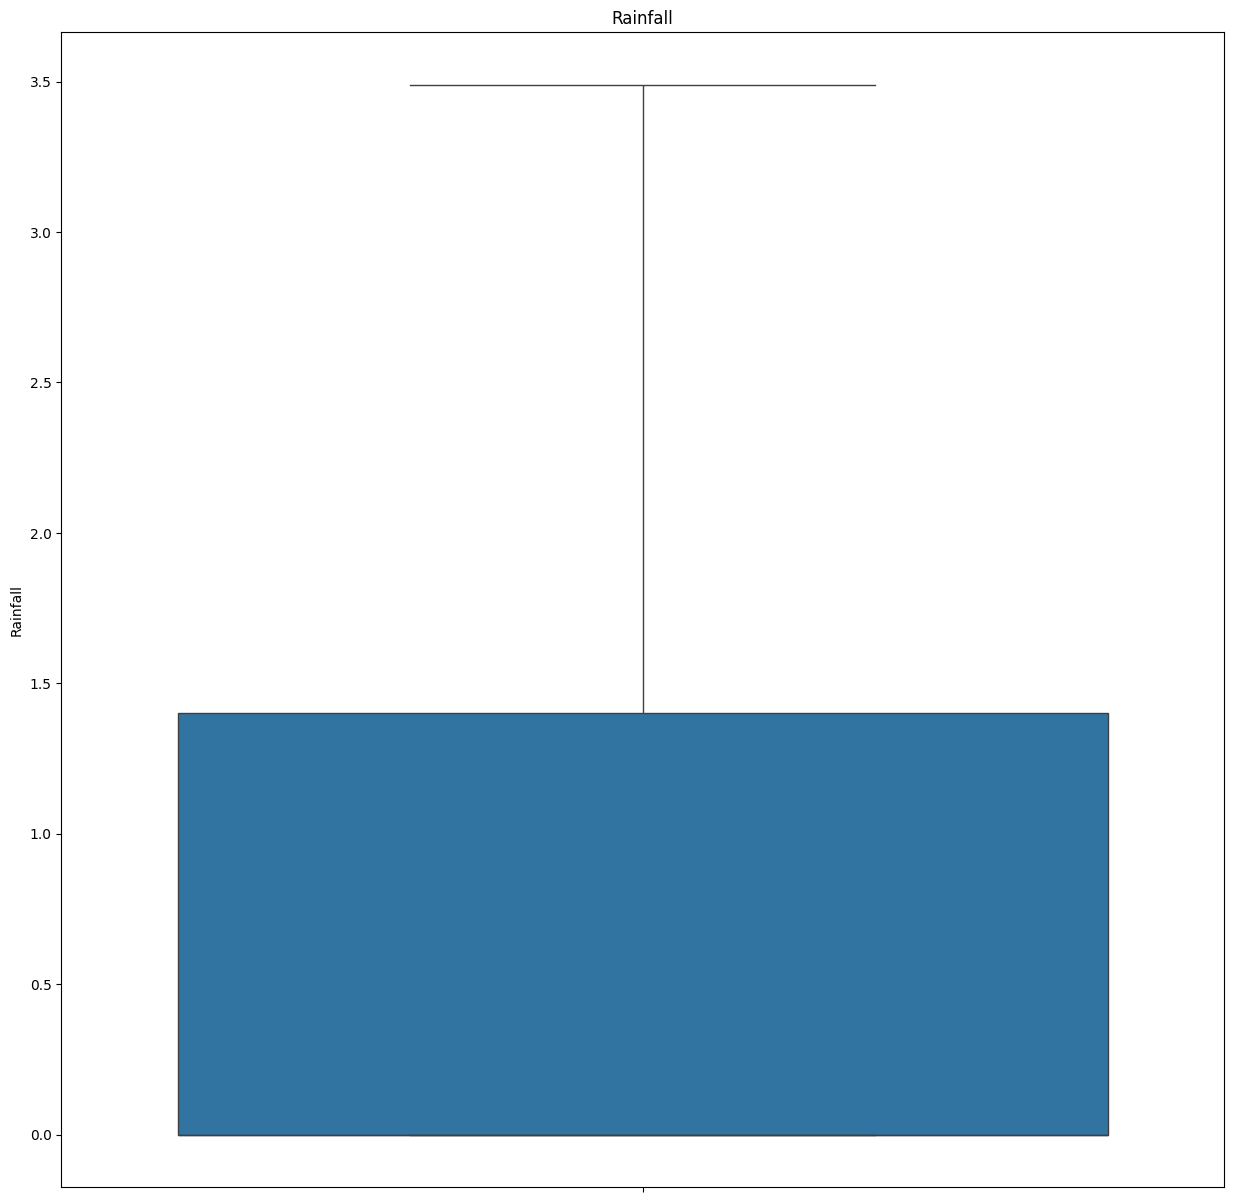

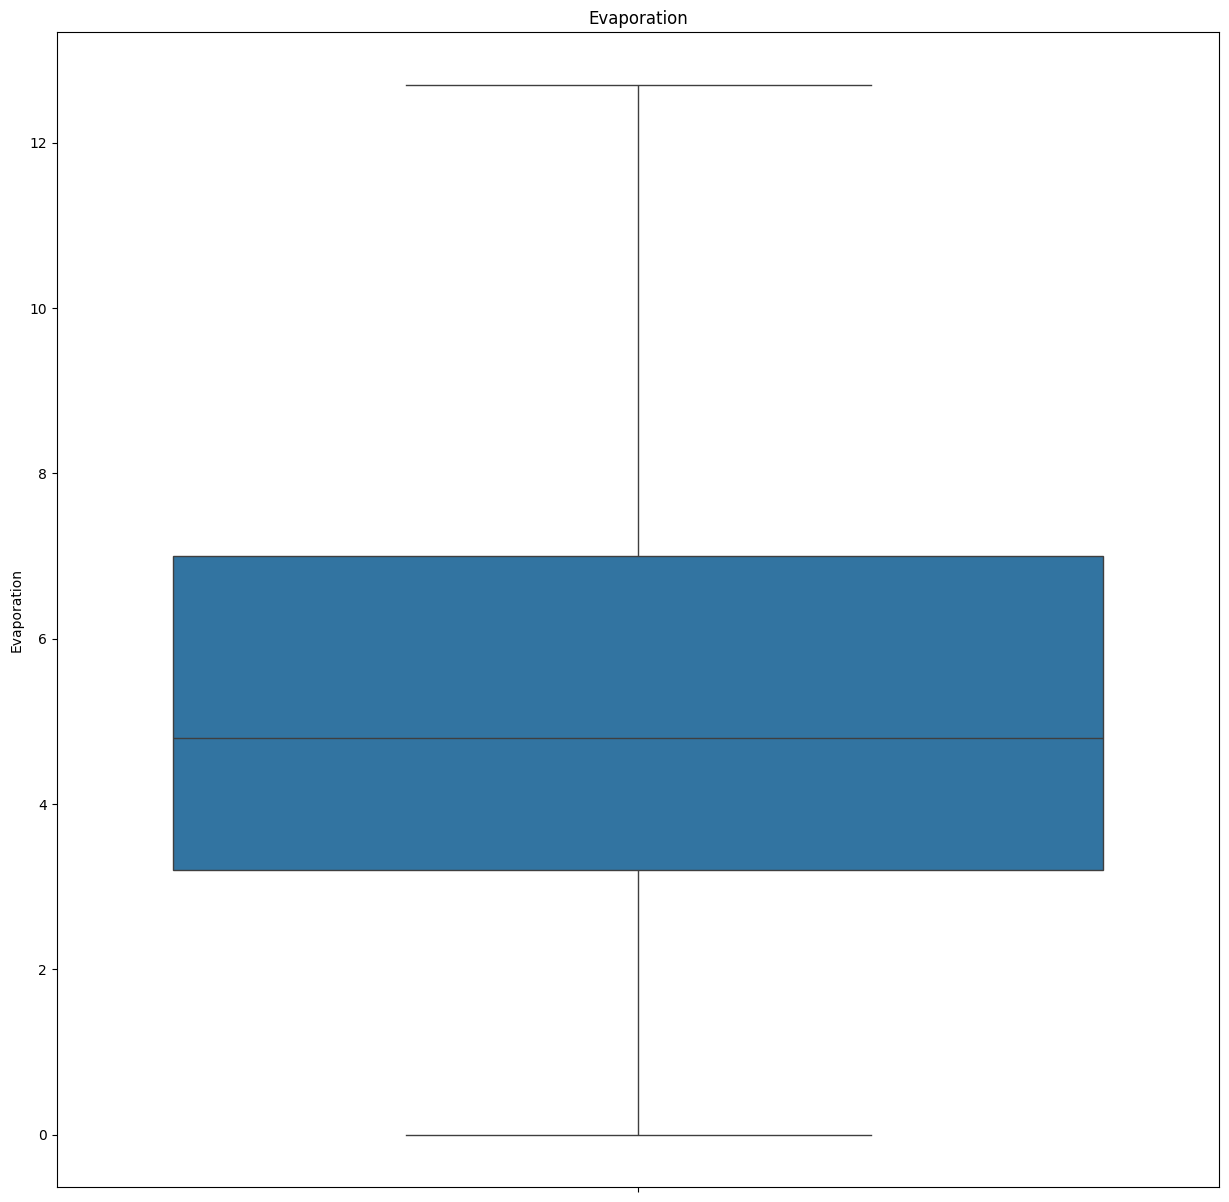

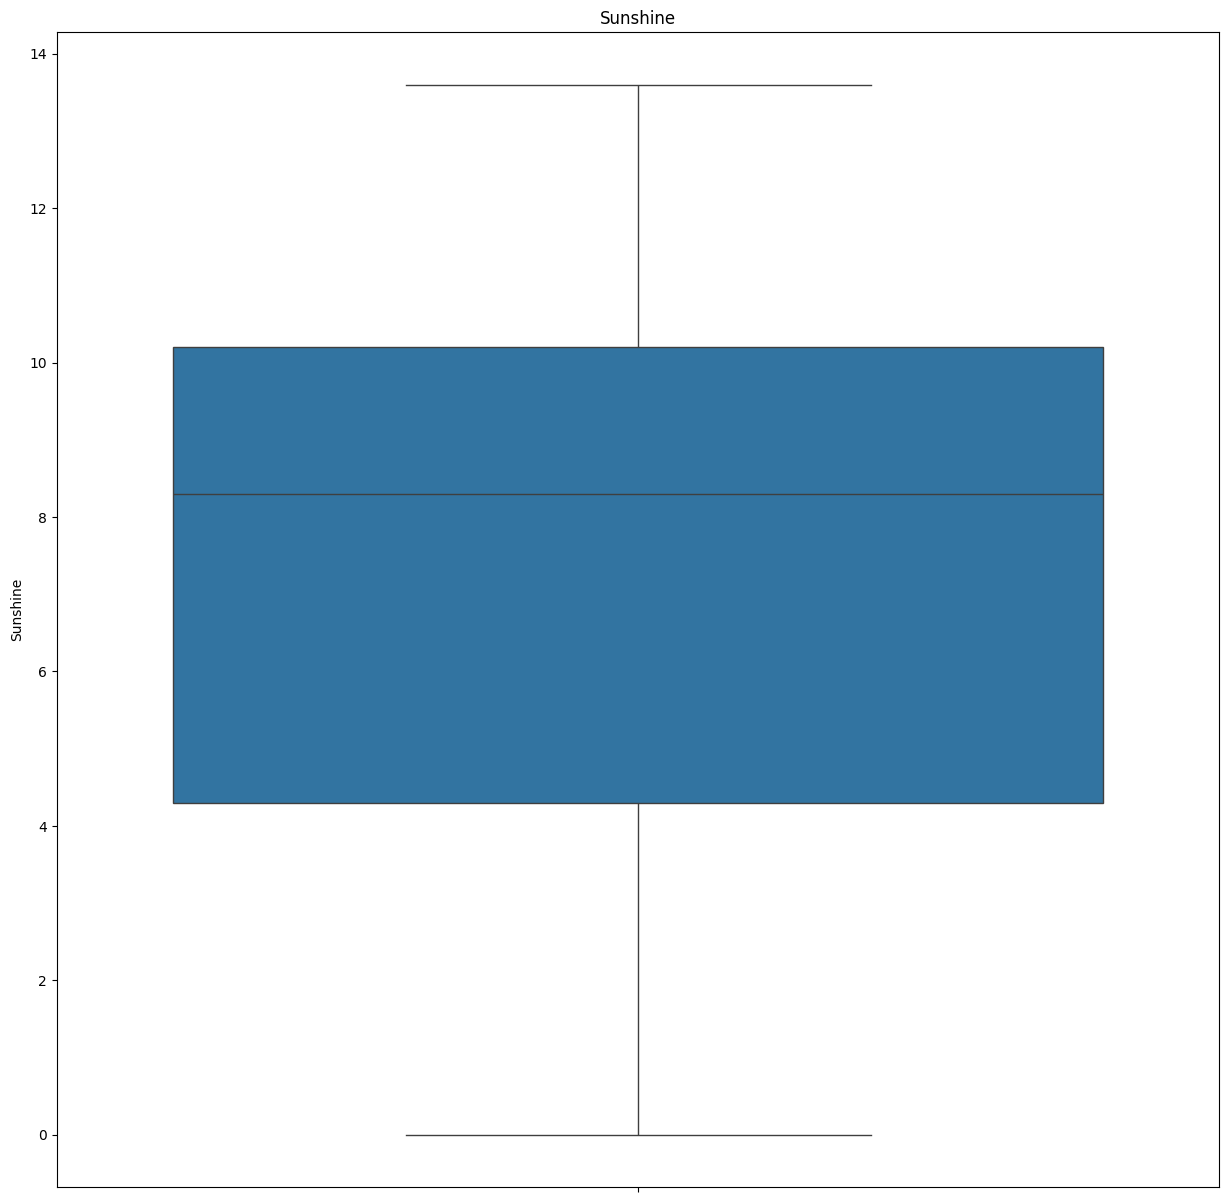

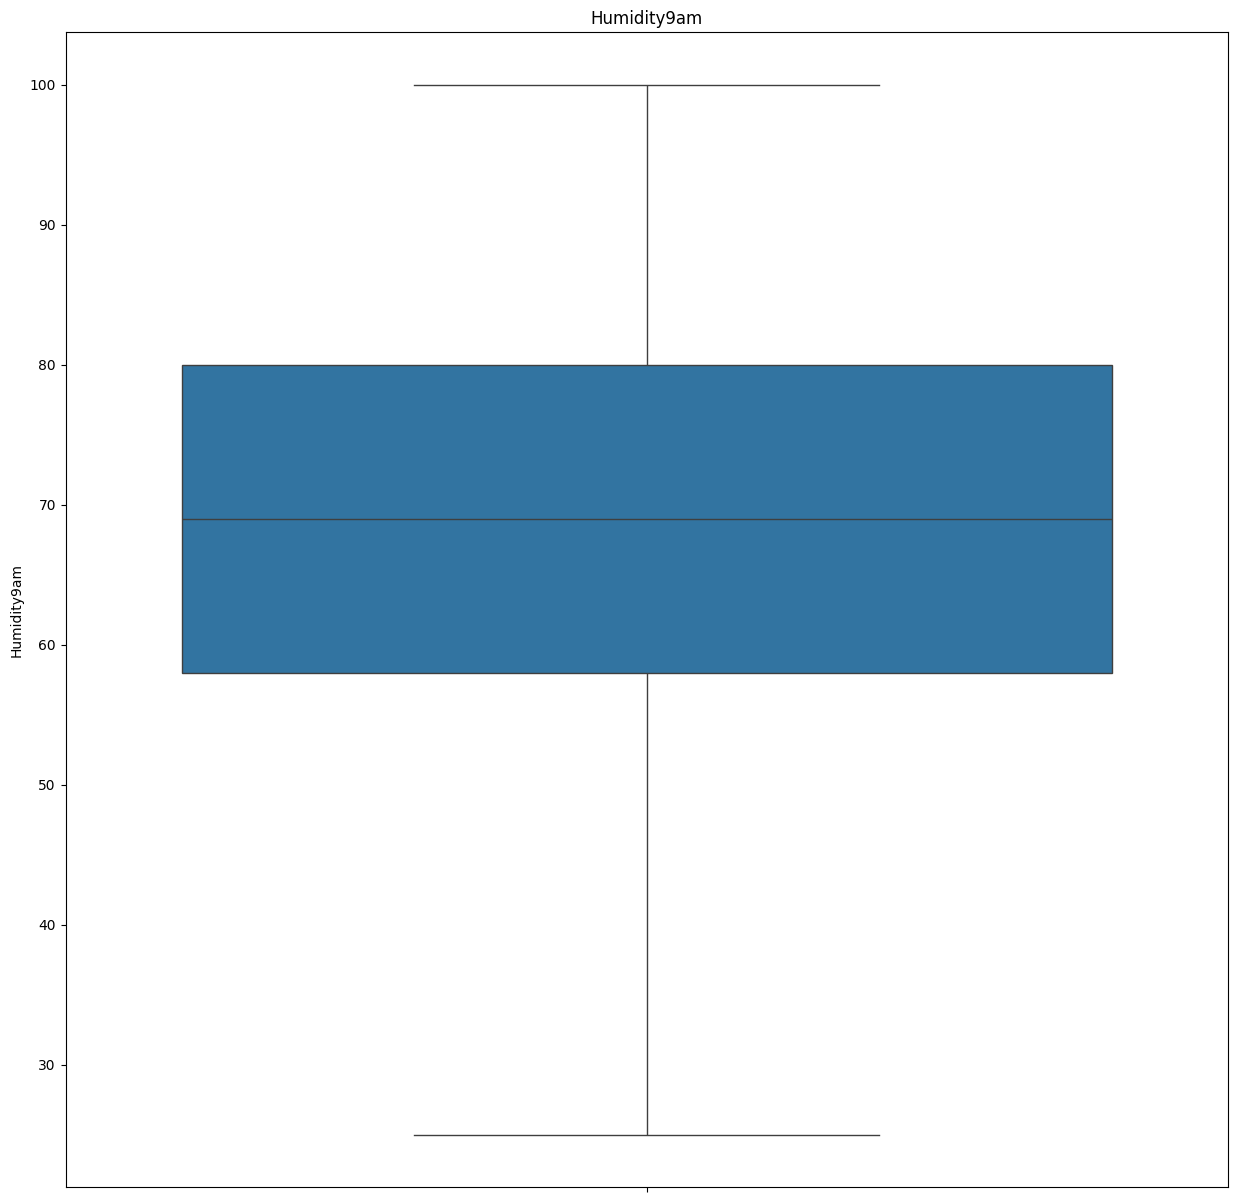

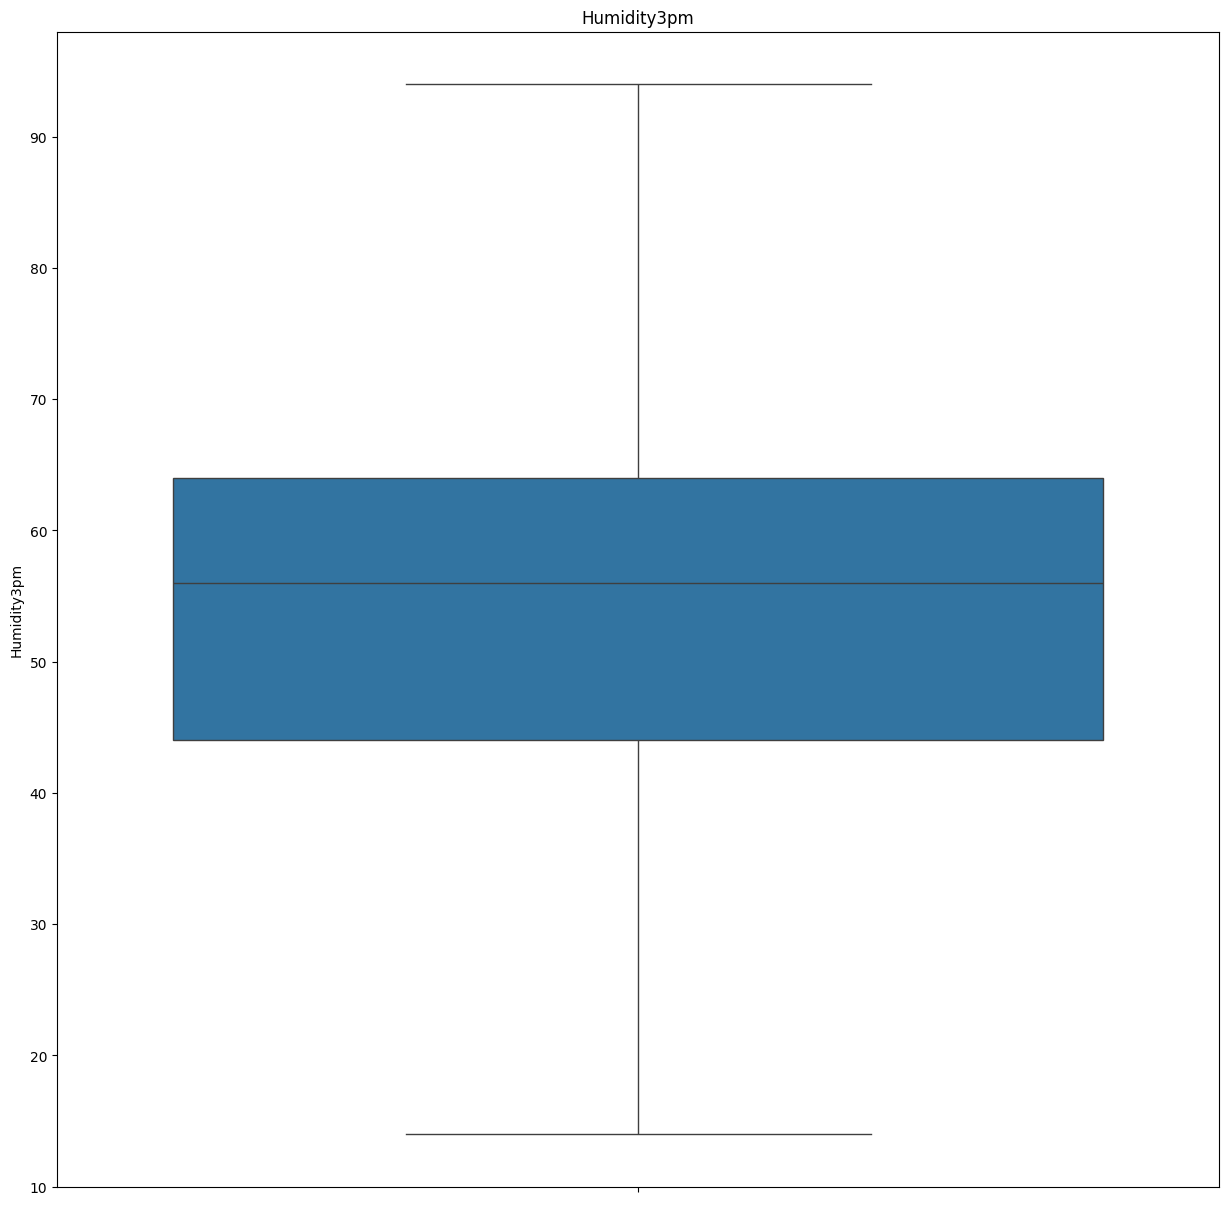

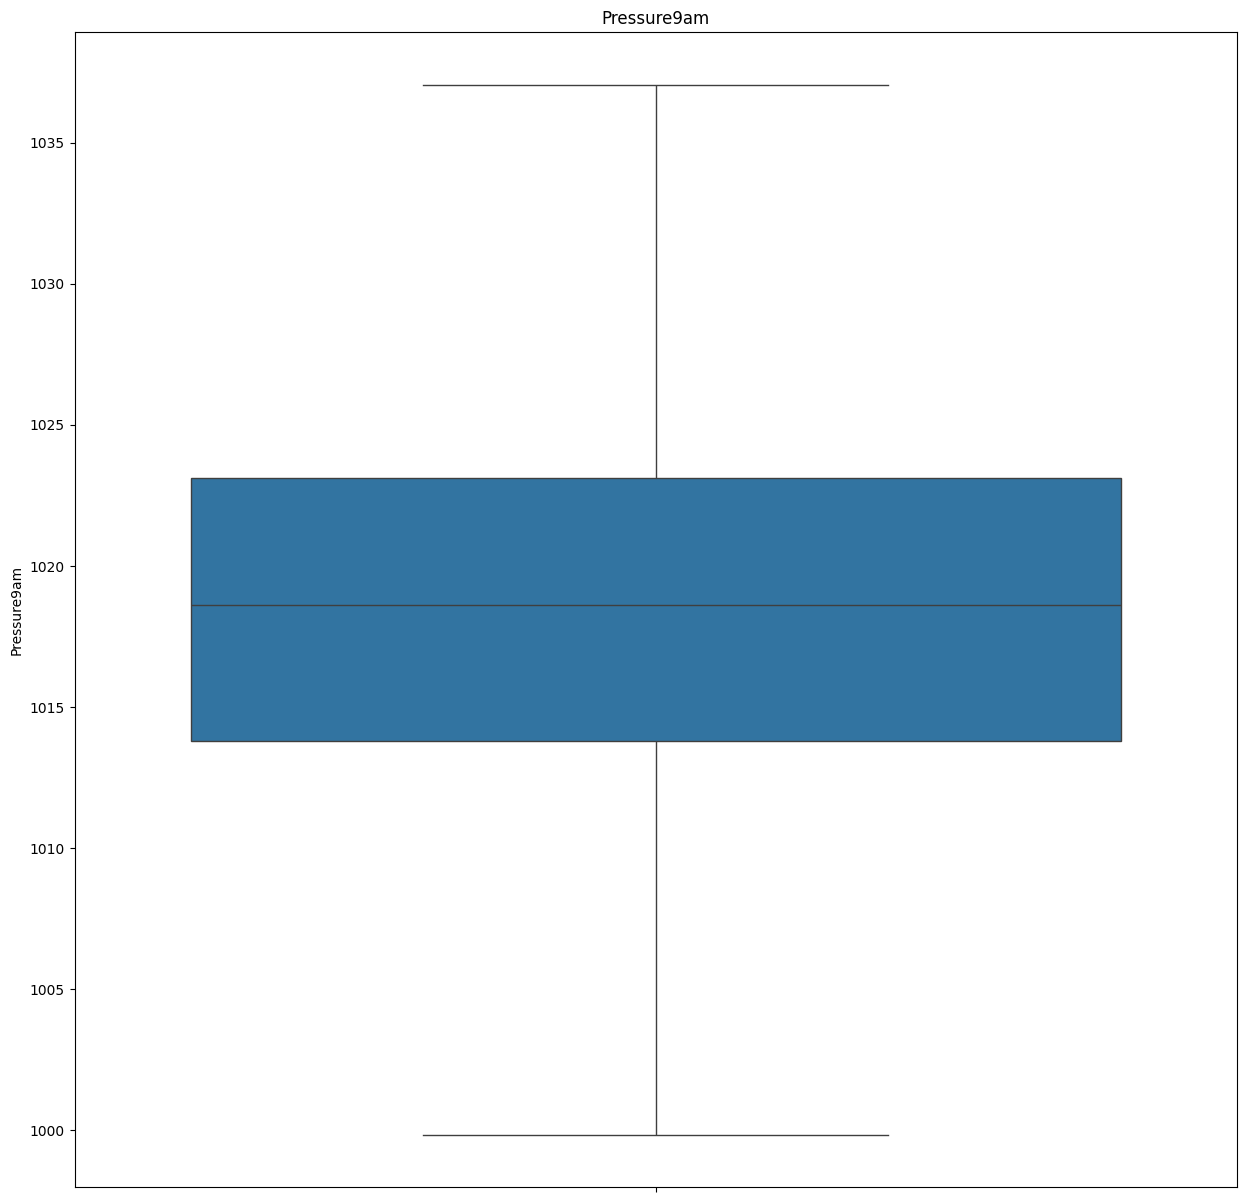

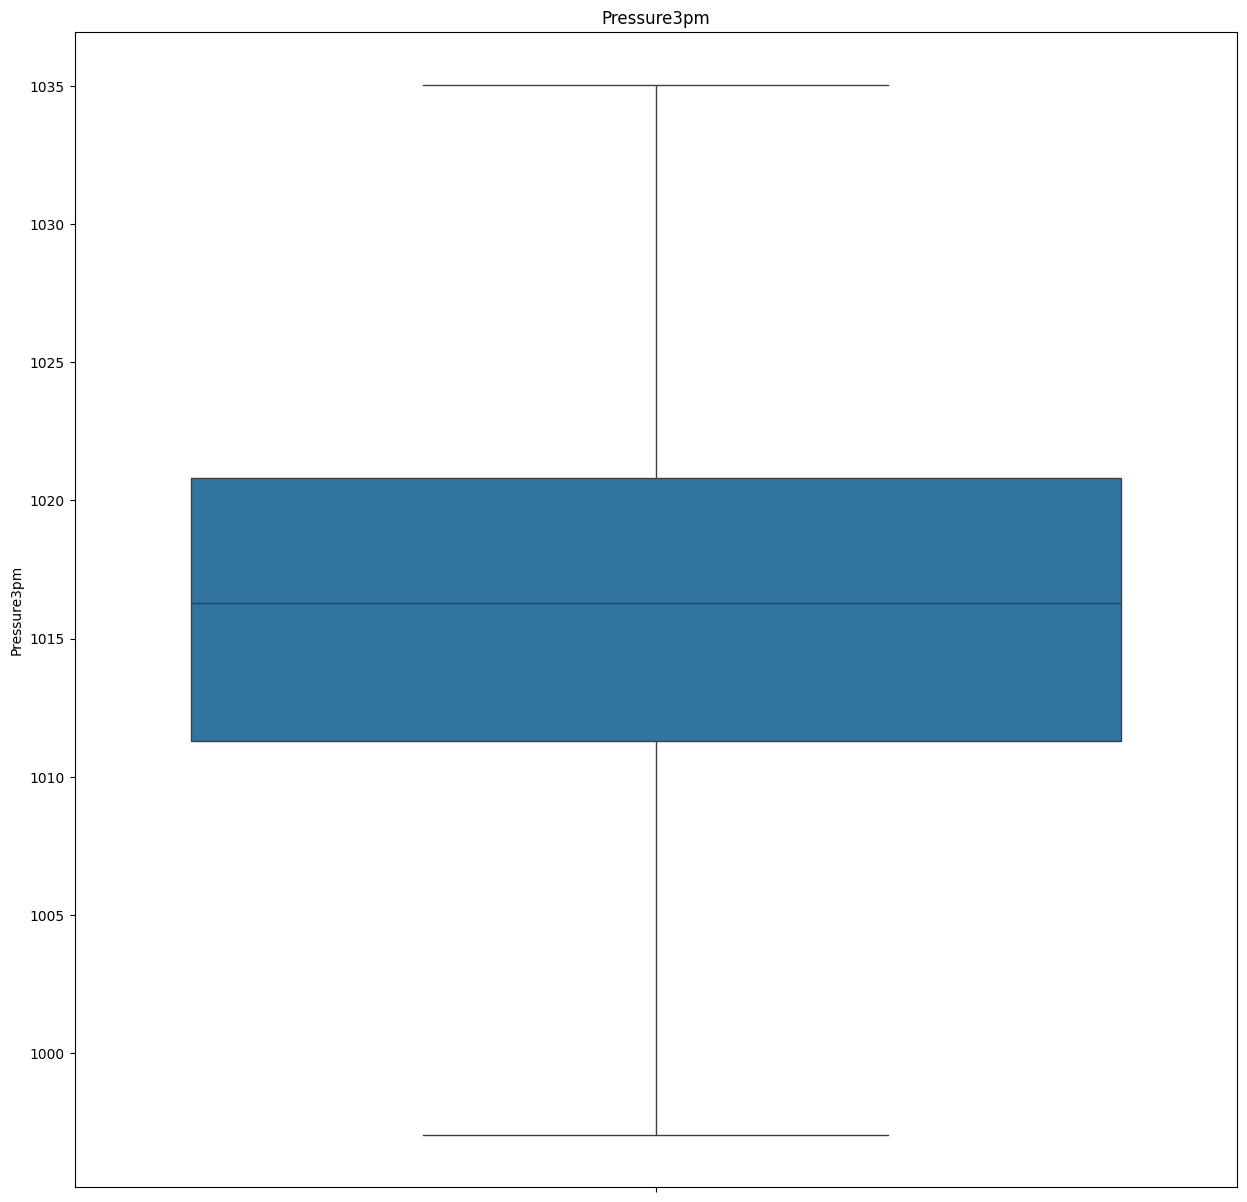

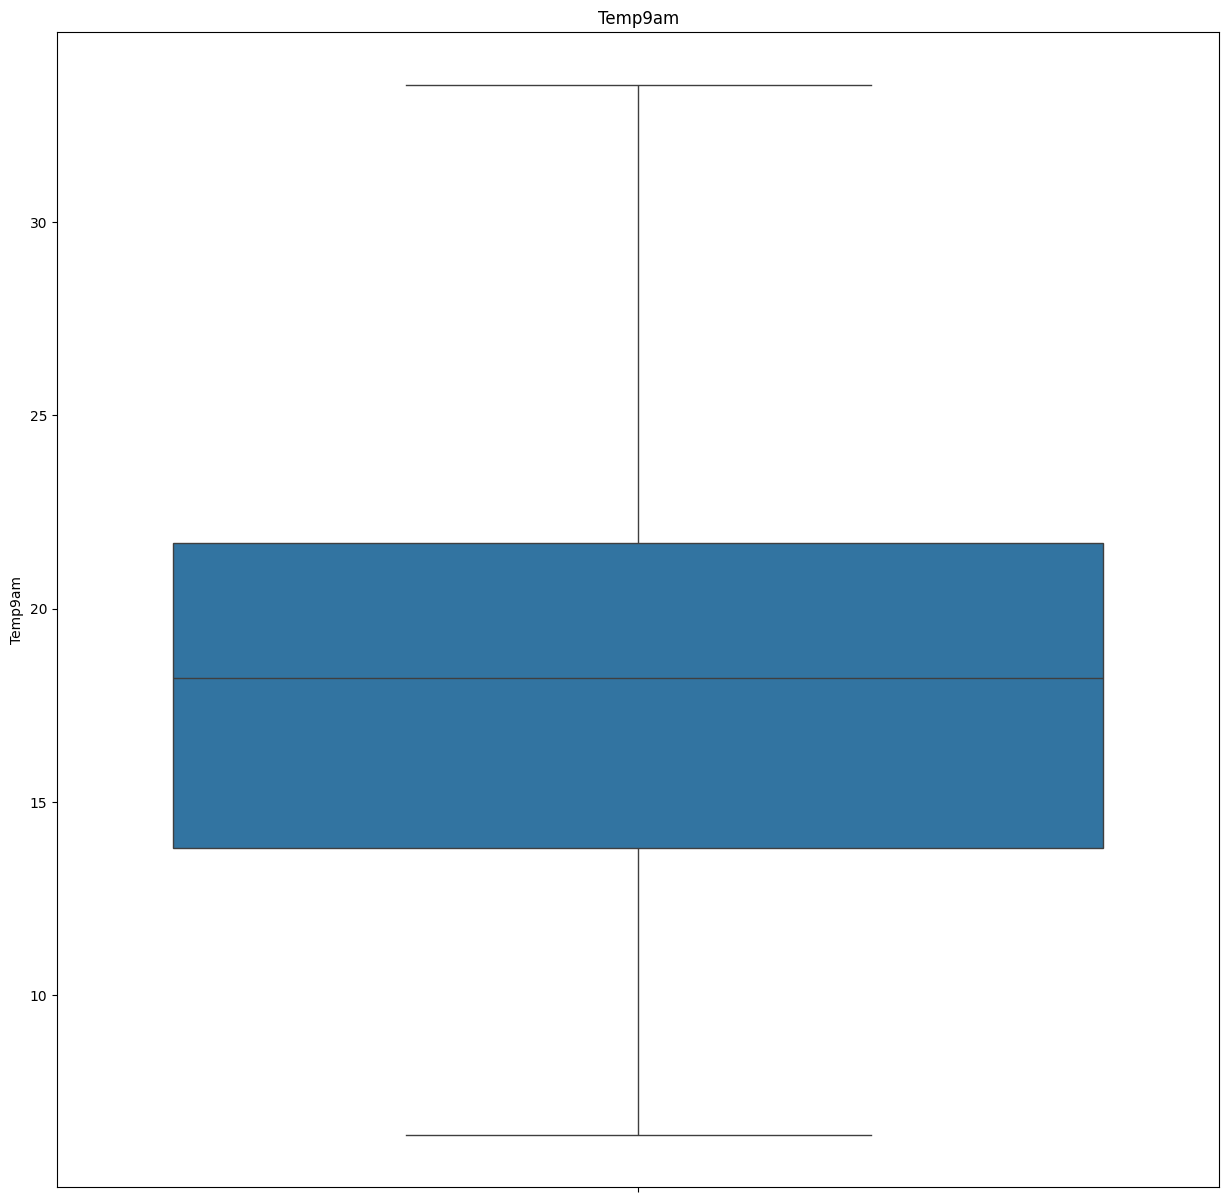

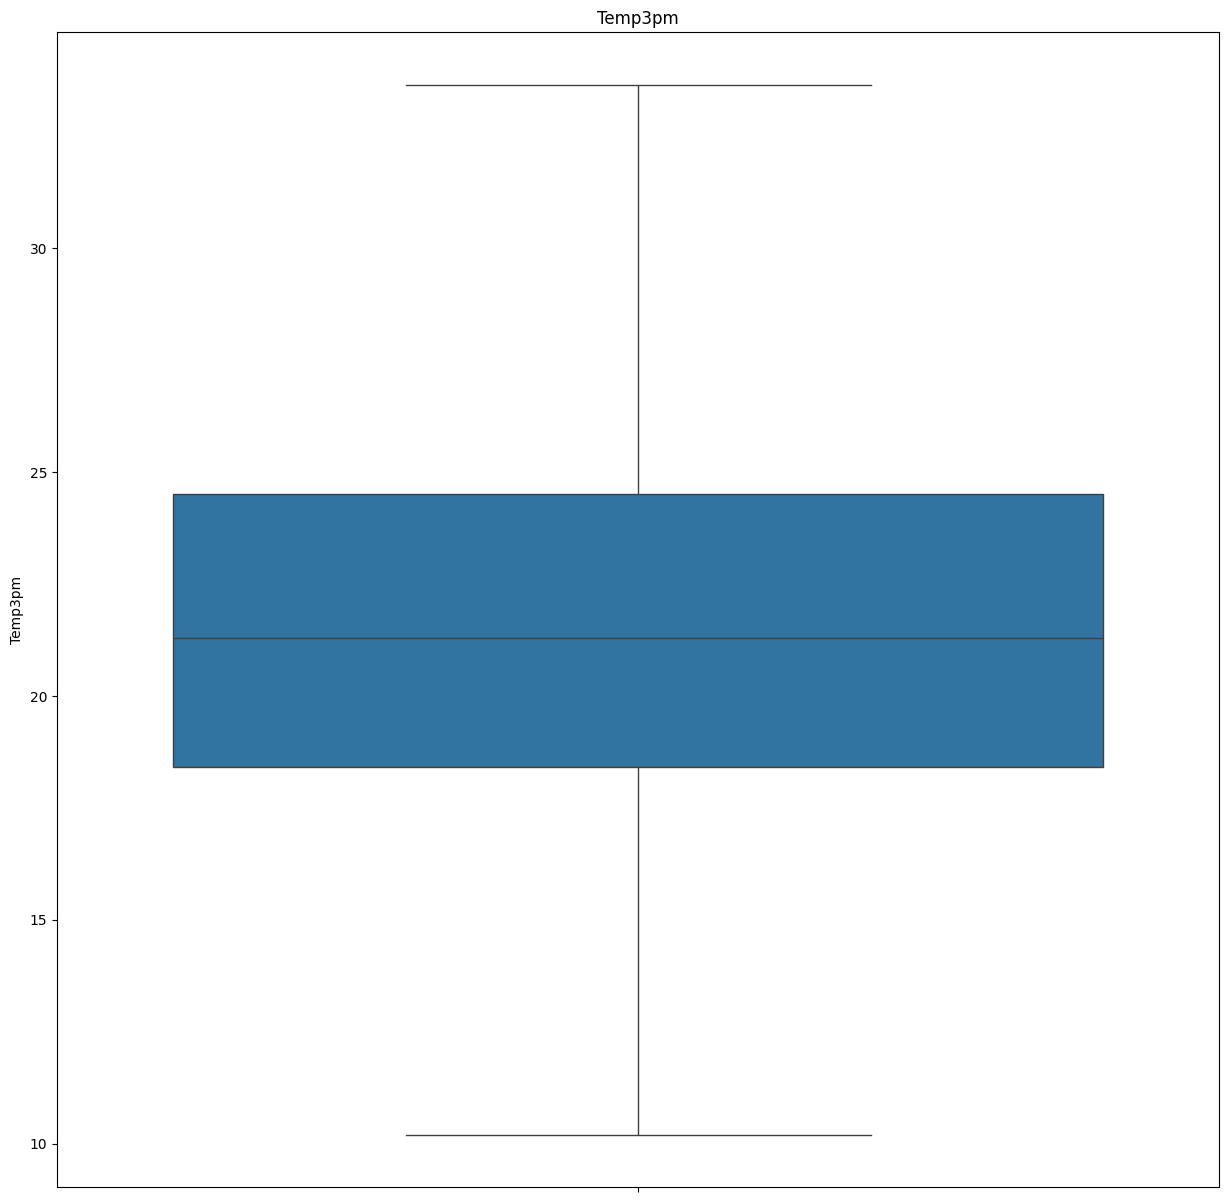

<Figure size 1500x1500 with 0 Axes>

In [55]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Explanation:

We're iterating over each continuous feature in the DataFrame 'df' and creating boxplots to visualize their distributions:
By creating boxplots for each continuous feature, we gain insights into their distributions and can identify potential outliers or patterns within the data.


In [56]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


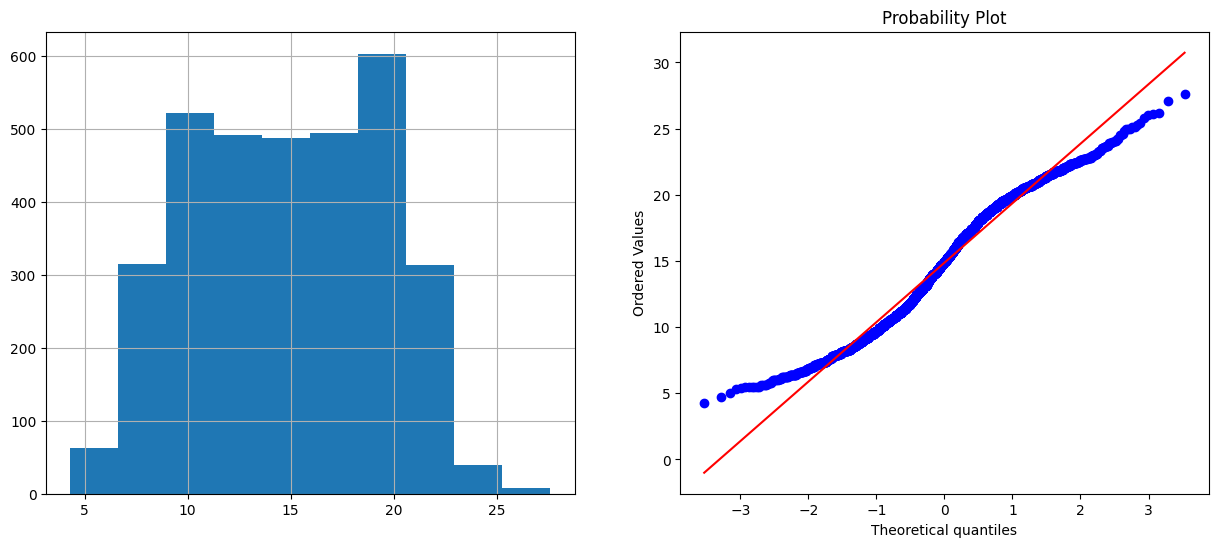

MaxTemp


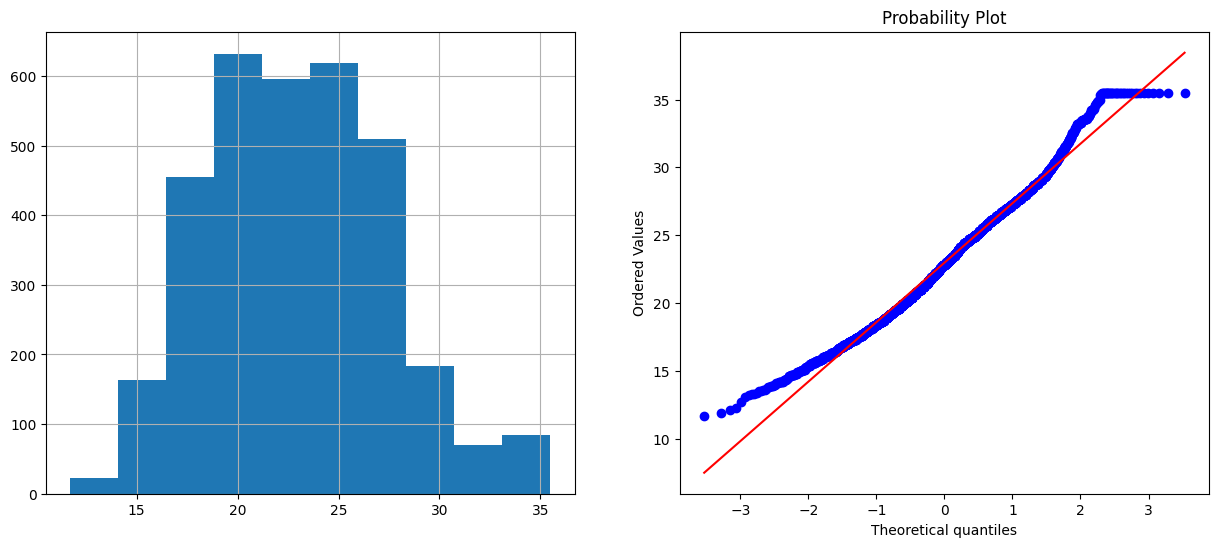

Rainfall


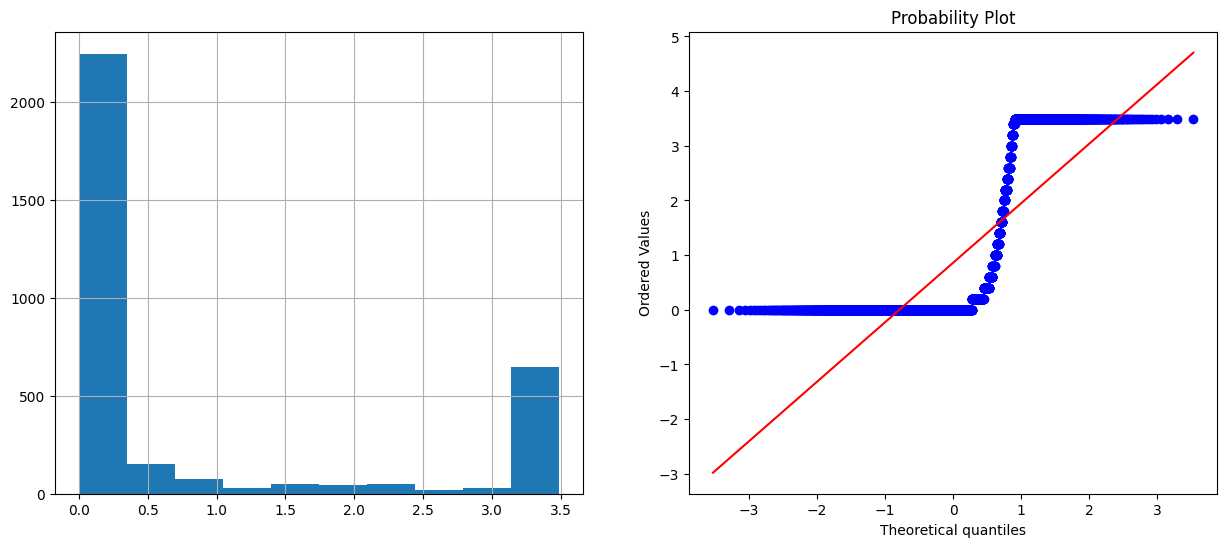

Evaporation


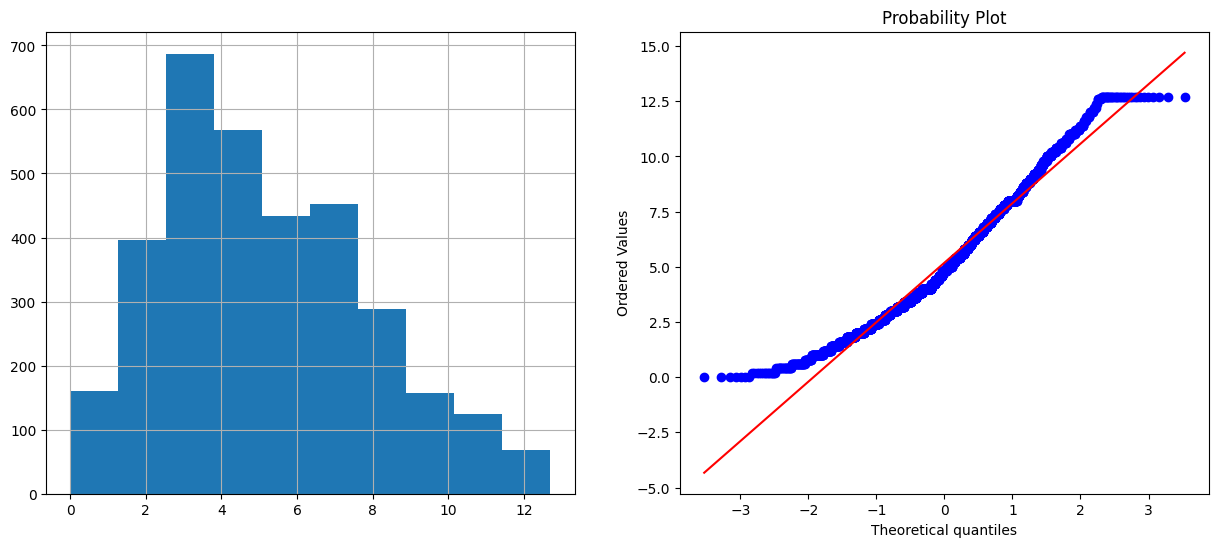

Sunshine


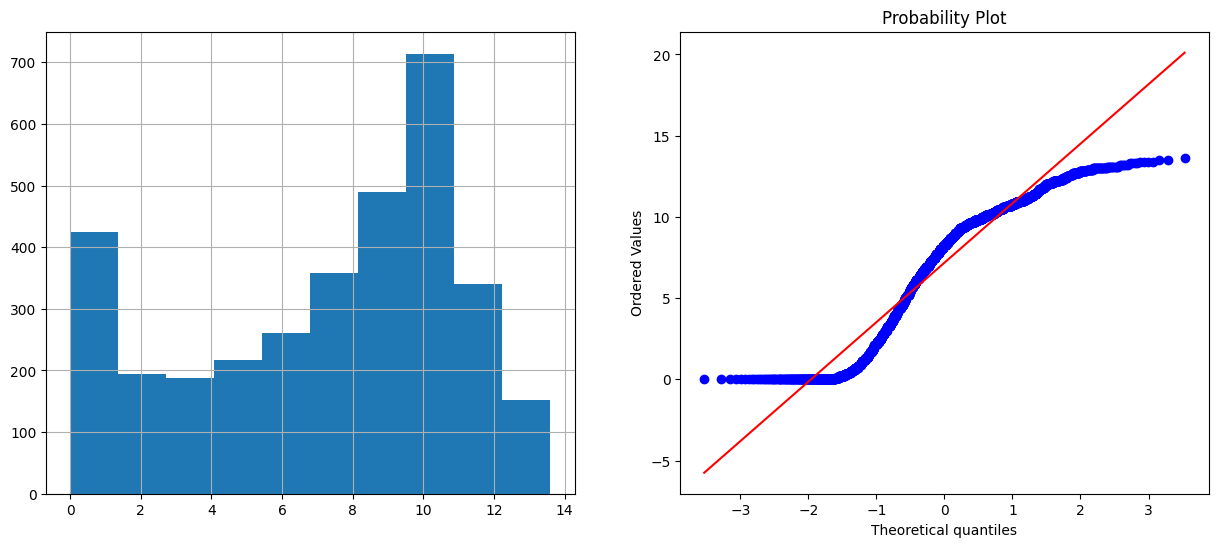

Humidity9am


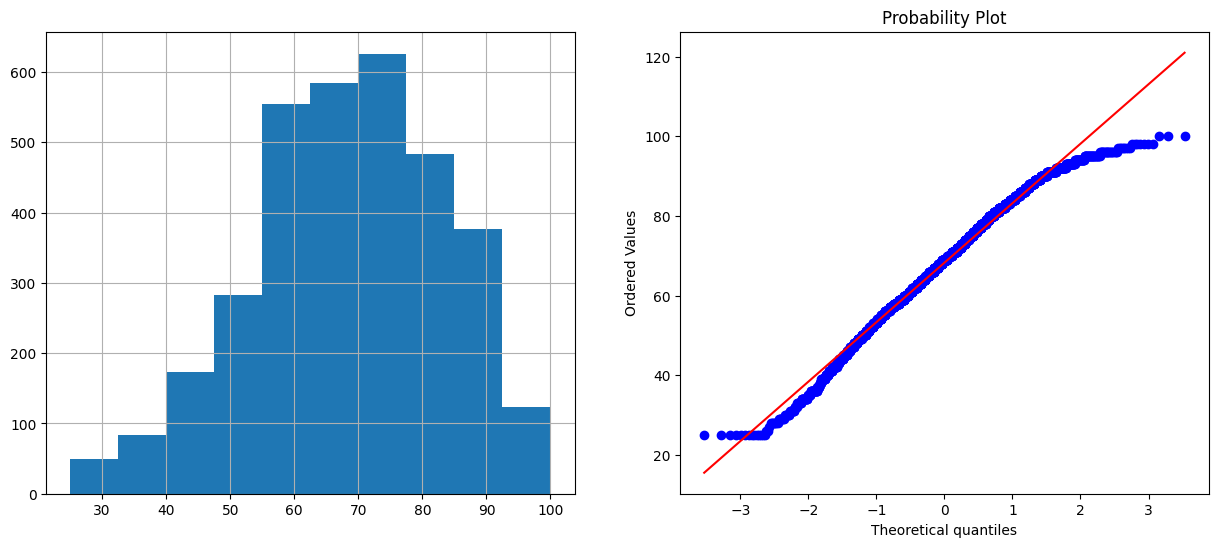

Humidity3pm


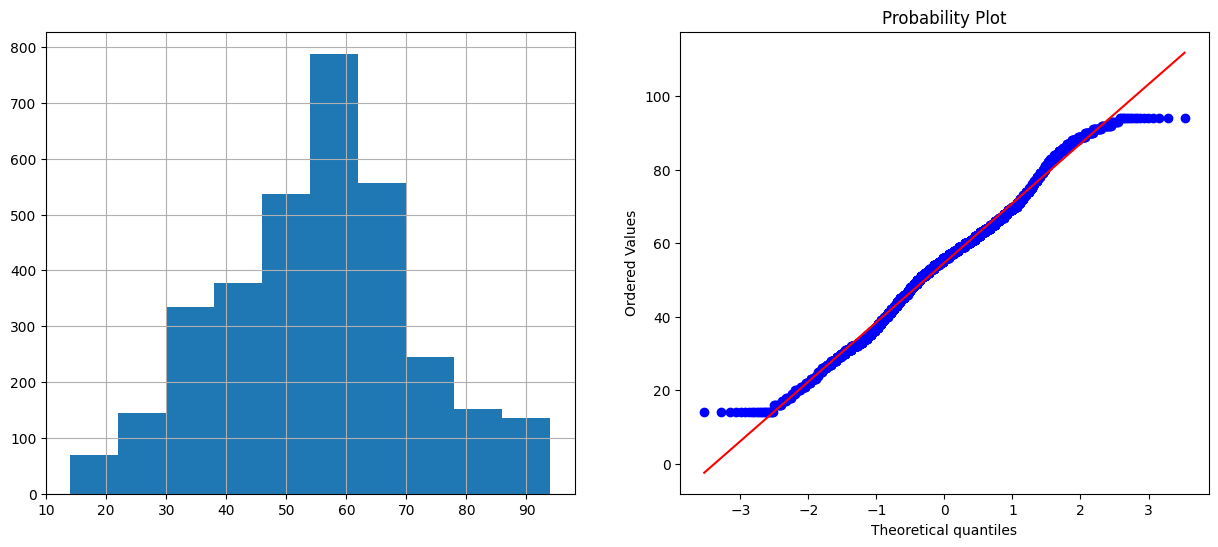

Pressure9am


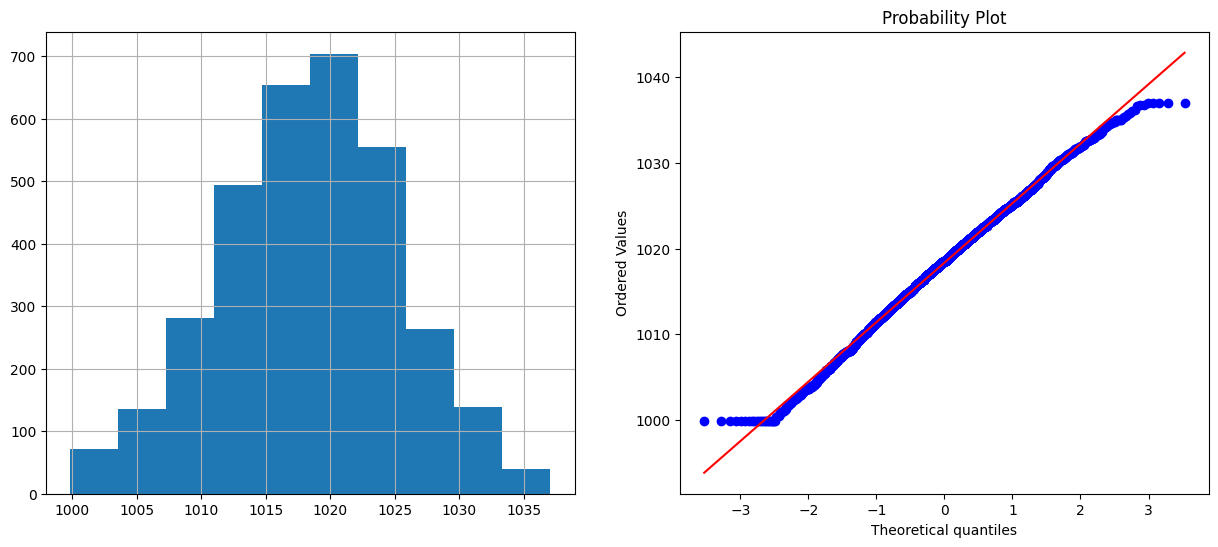

Pressure3pm


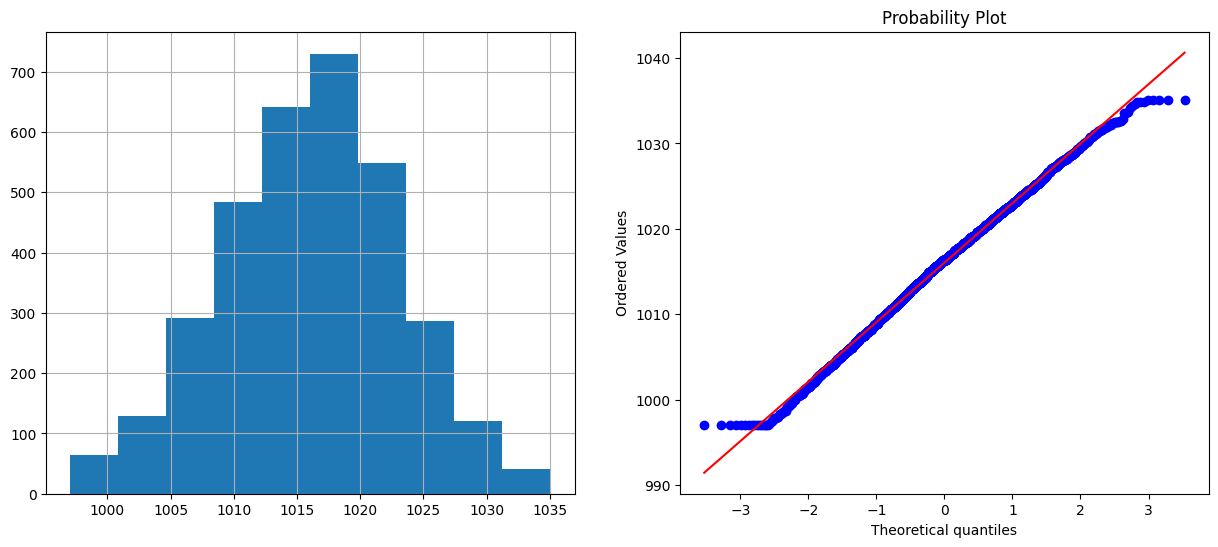

Temp9am


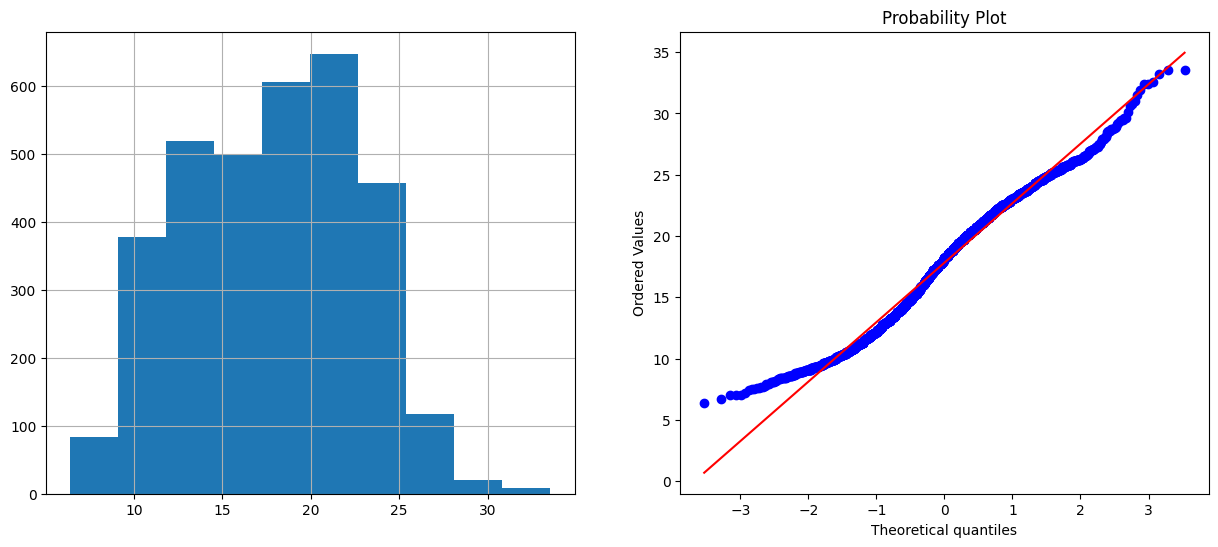

Temp3pm


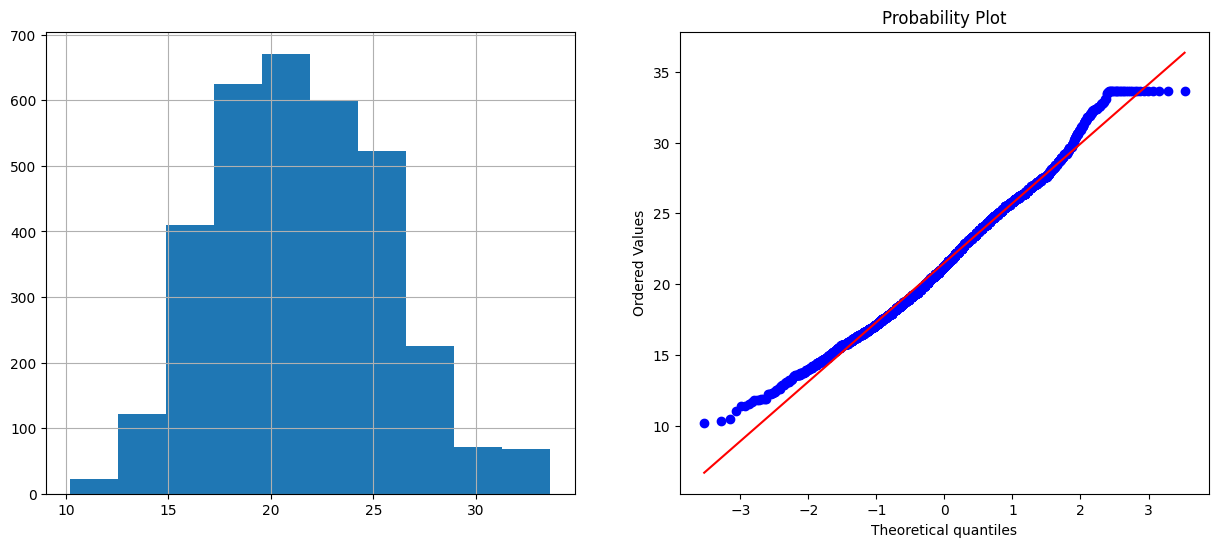

In [57]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [58]:
#We're saving the DataFrame 'df' to a CSV (Comma Separated Values) file named "preprocessed_1.csv" using the `to_csv()` function.
df.to_csv("preprocessed_1.csv", index=False)


In [59]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [60]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

### Testing Training Spliiting Model

In [61]:
#Defining X and y variables
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [62]:
# splits the dataset (X and Y) into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [63]:
y_train

651     0
974     1
2720    0
2986    0
1840    0
       ..
1320    1
888     1
1904    0
1224    0
568     0
Name: RainTomorrow, Length: 2669, dtype: uint8

In [64]:
#Using SMOTE to oversample the minority class in the training data, printing the class distribution before and after oversampling for comparison.
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 1977, 1: 692})
The number of classes after fit Counter({0: 1977, 1: 1977})


### Model Training - Using CatBoostClassifier

In [65]:
# Model Building and Evaluation
# CatBoostClassifier
catboost_clf = CatBoostClassifier(random_state=42, verbose=False, iterations=2000, eval_metric = "AUC")
catboost_clf.fit(X_train, y_train)
catboost_pred = catboost_clf.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_pred)
print("CatBoost Accuracy:", catboost_accuracy)



CatBoost Accuracy: 0.8383233532934131


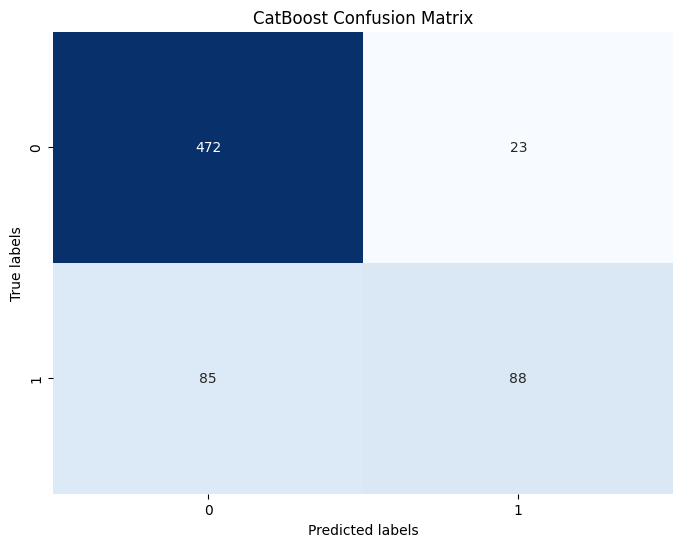

In [66]:
# 4. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, catboost_pred, title="CatBoost Confusion Matrix")


In [67]:
y_pred = catboost_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[472  23]
 [ 85  88]]
0.8383233532934131
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       495
           1       0.79      0.51      0.62       173

    accuracy                           0.84       668
   macro avg       0.82      0.73      0.76       668
weighted avg       0.83      0.84      0.83       668



In [68]:
metrics.roc_auc_score(y_test, y_pred, average=None) 

0.7311029368832836

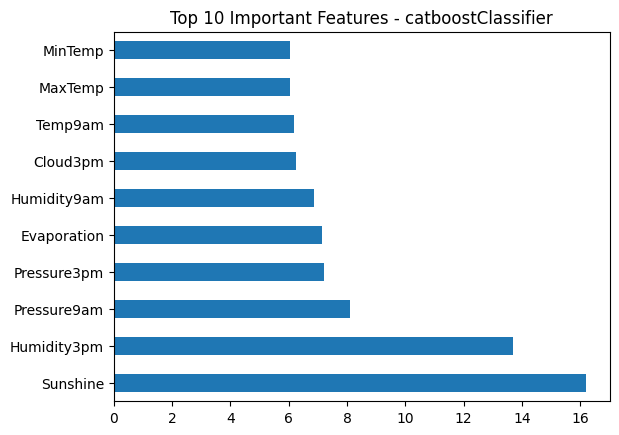

In [69]:
# Feature Importance Visualization
feat_importances = pd.Series(catboost_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - catboostClassifier')
plt.show()

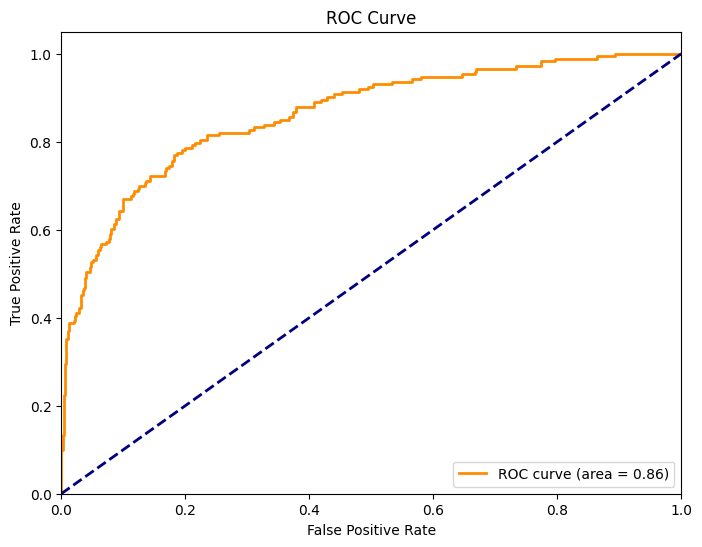

In [70]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities
y_pred_proba = catboost_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()




In [71]:
#Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7311029368832836


### Model Training - RandomForestClassifier

In [72]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [73]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [74]:

rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8248502994011976


In [75]:
y_pred2 = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))

[[449  46]
 [ 71 102]]


In [76]:
cnf=confusion_matrix(y_test,rf_pred)
cnf

array([[449,  46],
       [ 71, 102]], dtype=int64)

In [77]:
# Confusion Matrix for RandomForestClassifier
def plot_cnf(y_true, y_pred, title):
    cnf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

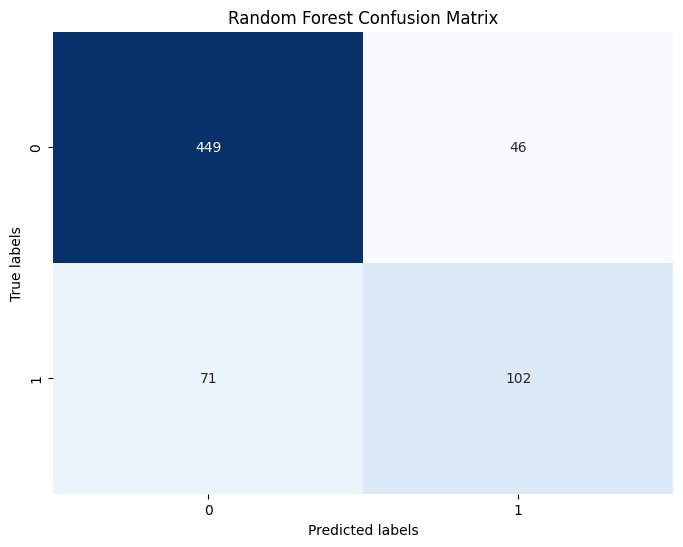

In [78]:
plot_confusion_matrix(y_test, rf_pred, title="Random Forest Confusion Matrix")


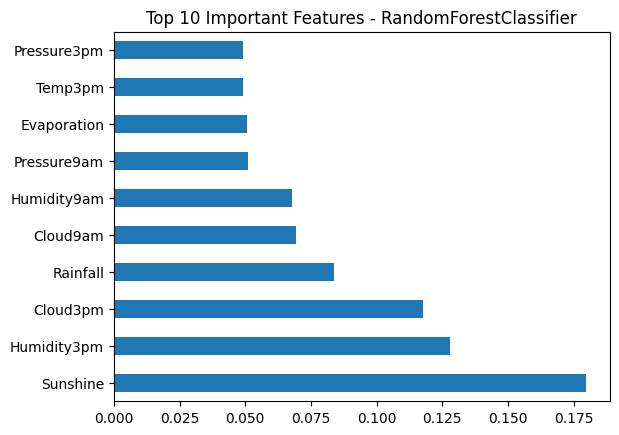

In [79]:
# Feature Importance Visualization
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - RandomForestClassifier')
plt.show()


In [80]:
# 4. Feature Selection using Ridge = (alpha=0.1)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


Ridge(alpha=0.1)

In [81]:
# 4. Feature Selection using lasso = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

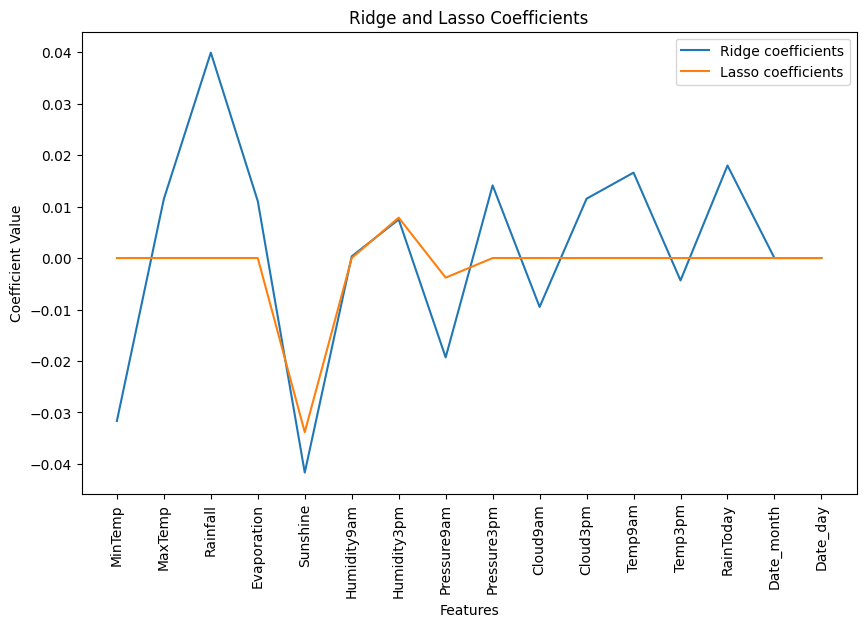

In [82]:
# Visualizing Coefficients for Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(range(len(X.columns)), ridge.coef_, label='Ridge coefficients')
plt.plot(range(len(X.columns)), lasso.coef_, label='Lasso coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title('Ridge and Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

In [83]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[449  46]
 [ 71 102]]
0.8248502994011976
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       495
           1       0.69      0.59      0.64       173

    accuracy                           0.82       668
   macro avg       0.78      0.75      0.76       668
weighted avg       0.82      0.82      0.82       668



In [84]:

metrics.roc_auc_score(y_test, y_pred1, average=None)

0.7483330413966252

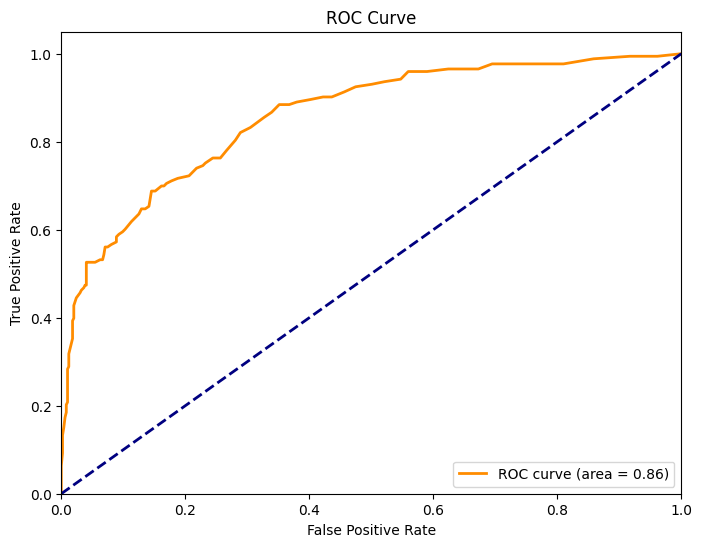

ROC AUC Score: 0.8566707537805803


In [85]:

y_pred_proba2 = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)


### Model Training - Using Logistic Regression

In [86]:
logreg = LogisticRegression()


In [87]:
logreg.fit(X_train_res, y_train_res)

C:\Users\Ideapad Gaming 3\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[402  93]
 [ 45 128]]
0.7934131736526946
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       495
           1       0.58      0.74      0.65       173

    accuracy                           0.79       668
   macro avg       0.74      0.78      0.75       668
weighted avg       0.82      0.79      0.80       668



In [89]:
# 7. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[402  93]
 [ 45 128]]


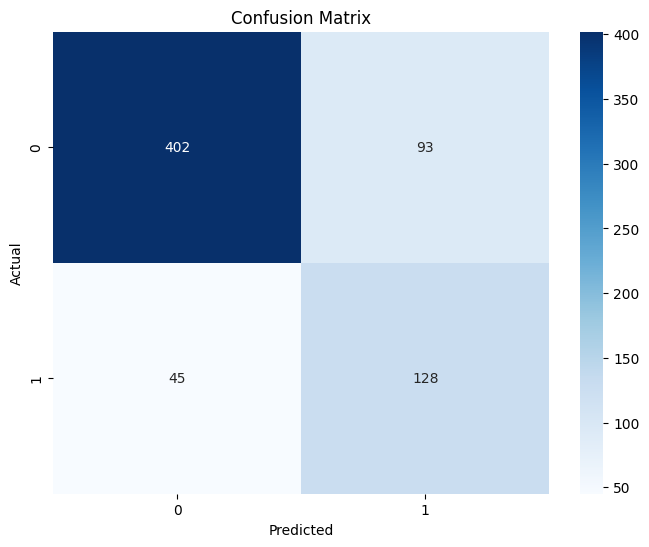

In [90]:
# 8. Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


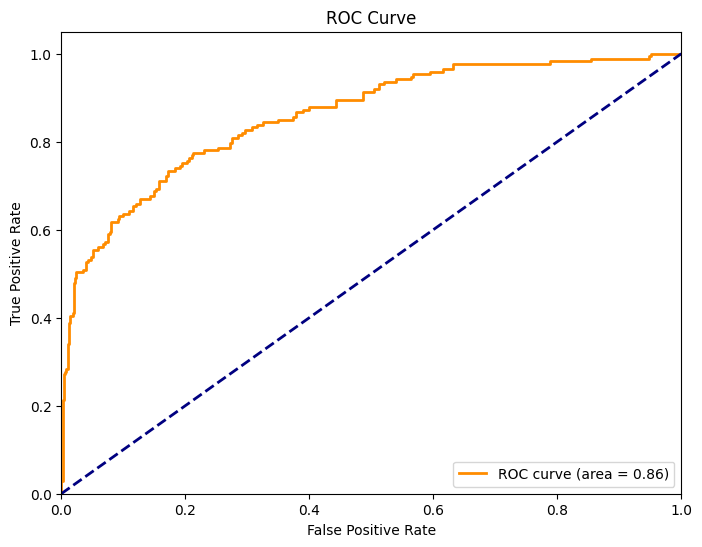

ROC AUC Score: 0.8596718631400713


In [91]:

# Predict probabilities
y_pred_proba3 = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)


### Model Training - GaussianNB

In [92]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [93]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))


[[392 103]
 [ 41 132]]


In [94]:
cn=confusion_matrix(y_test,y_pred3)
cn

array([[392, 103],
       [ 41, 132]], dtype=int64)

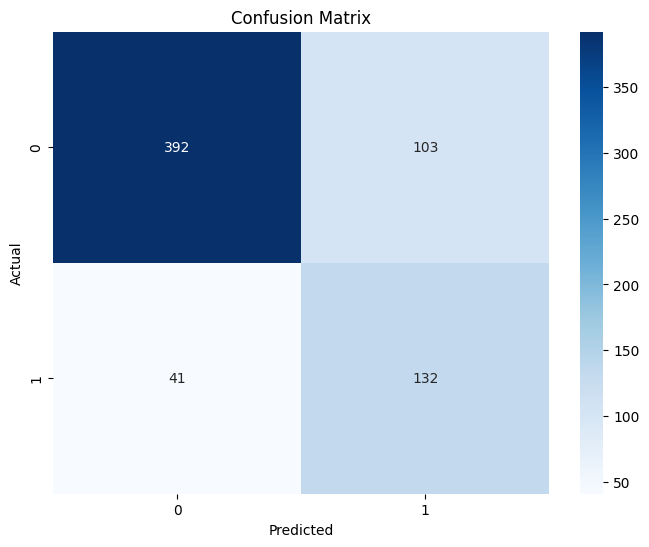

In [95]:
# 8. Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [96]:
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.7844311377245509
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       495
           1       0.56      0.76      0.65       173

    accuracy                           0.78       668
   macro avg       0.73      0.78      0.75       668
weighted avg       0.82      0.78      0.79       668



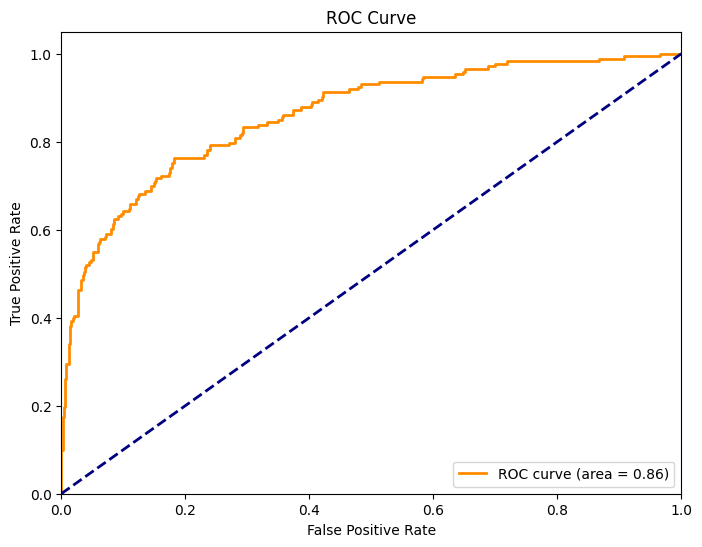

In [97]:

y_pred_proba4 = gnb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba4)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [98]:

metrics.roc_auc_score(y_test, y_pred3, average=None) 

0.7774624861330063

### model Training - KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred4 = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred4)
print(confusion_matrix(y_test,y_pred4))

[[394 101]
 [ 61 112]]


In [101]:

print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

0.7574850299401198
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       495
           1       0.53      0.65      0.58       173

    accuracy                           0.76       668
   macro avg       0.70      0.72      0.70       668
weighted avg       0.78      0.76      0.76       668



In [102]:
def plot_confusion_matrix(y_true, y_pred4, labels):
    cm = confusion_matrix(y_true, y_pred4, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [103]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[394 101]
 [ 61 112]]
0.7574850299401198
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       495
           1       0.53      0.65      0.58       173

    accuracy                           0.76       668
   macro avg       0.70      0.72      0.70       668
weighted avg       0.78      0.76      0.76       668



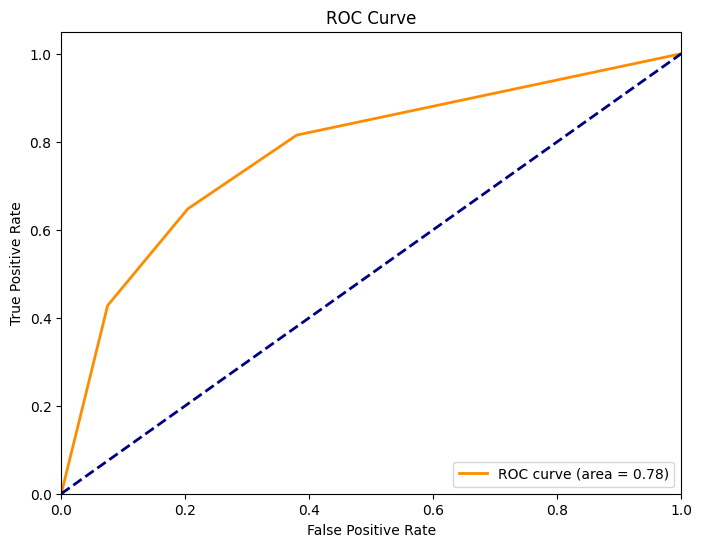

In [104]:
y_pred_proba7 = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba7)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Model training - XGBClassifier

In [105]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
cn_mx=confusion_matrix(y_test,y_pred6)

[[447  48]
 [ 73 100]]


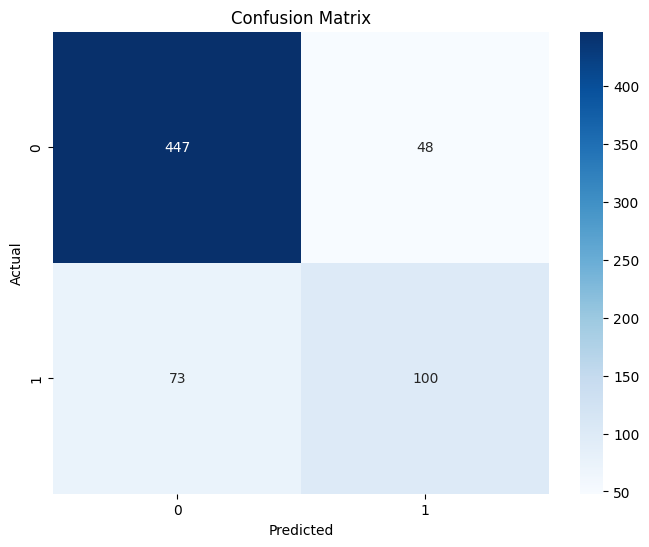

In [107]:
# 8. Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cn_mx, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [108]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[447  48]
 [ 73 100]]
0.8188622754491018
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       495
           1       0.68      0.58      0.62       173

    accuracy                           0.82       668
   macro avg       0.77      0.74      0.75       668
weighted avg       0.81      0.82      0.81       668



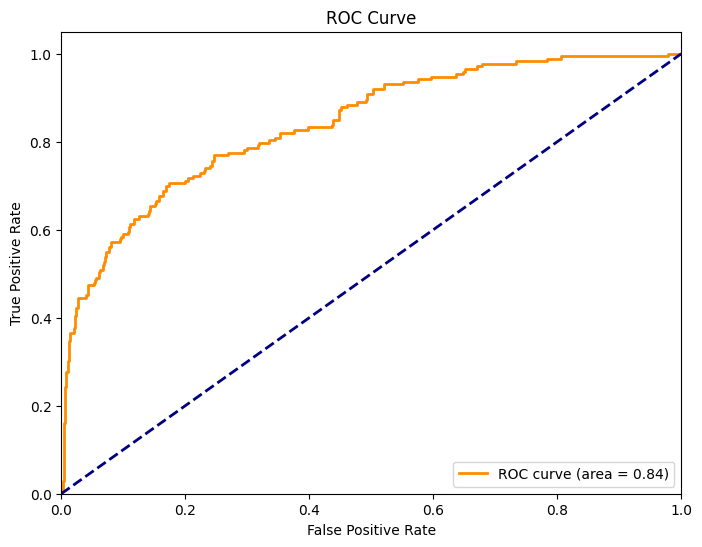

ROC AUC Score: 0.8397150697728732


In [109]:
# Predict probabilities
y_pred_proba5 = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba5)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)


### Model Training - Using SVC

In [110]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [111]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
cnm=confusion_matrix(y_test,y_pred5)

[[379 116]
 [ 48 125]]


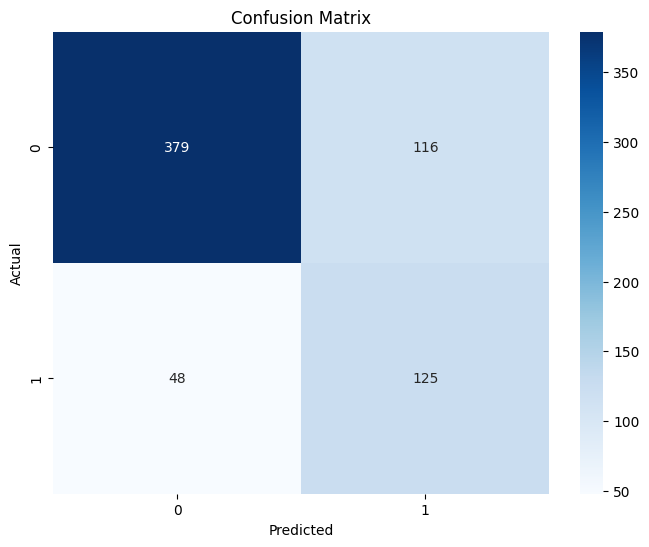

In [112]:
# 8. Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cnm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [113]:
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

0.7544910179640718
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       495
           1       0.52      0.72      0.60       173

    accuracy                           0.75       668
   macro avg       0.70      0.74      0.71       668
weighted avg       0.79      0.75      0.77       668



In [114]:

metrics.roc_auc_score(y_test, y_pred5, average=None) 

0.744099959128861

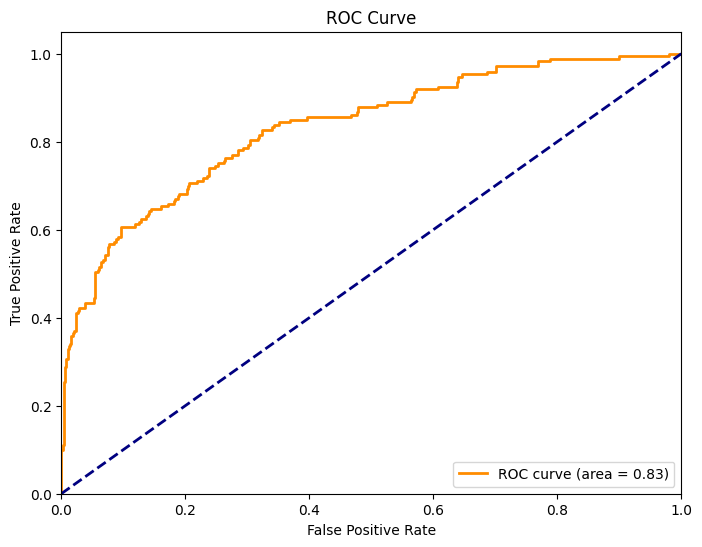

In [115]:
# Generate binary classification output using decision_function
y_scores = svc.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [116]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
#joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

### Model Training - DecisionTreeClassifier

In [117]:
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [118]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=4)

In [119]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [120]:
y_pred7 = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred7))
cnn=confusion_matrix(y_test,y_pred7)

[[471  24]
 [ 83  90]]


In [121]:
print(accuracy_score(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

0.8398203592814372
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       495
           1       0.79      0.52      0.63       173

    accuracy                           0.84       668
   macro avg       0.82      0.74      0.76       668
weighted avg       0.83      0.84      0.83       668



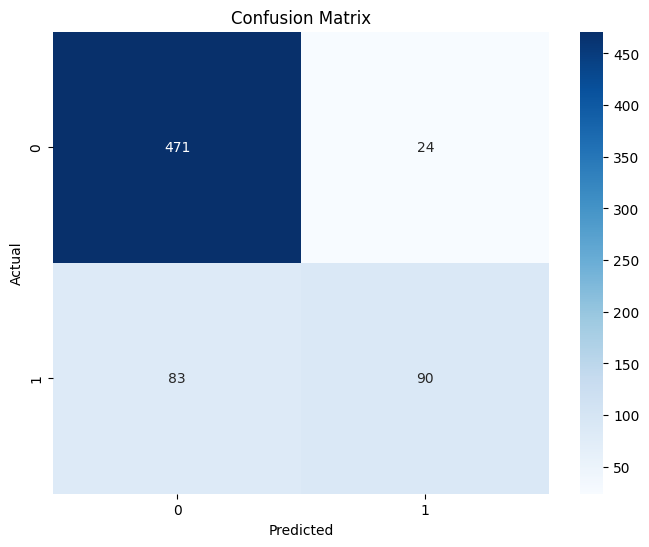

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

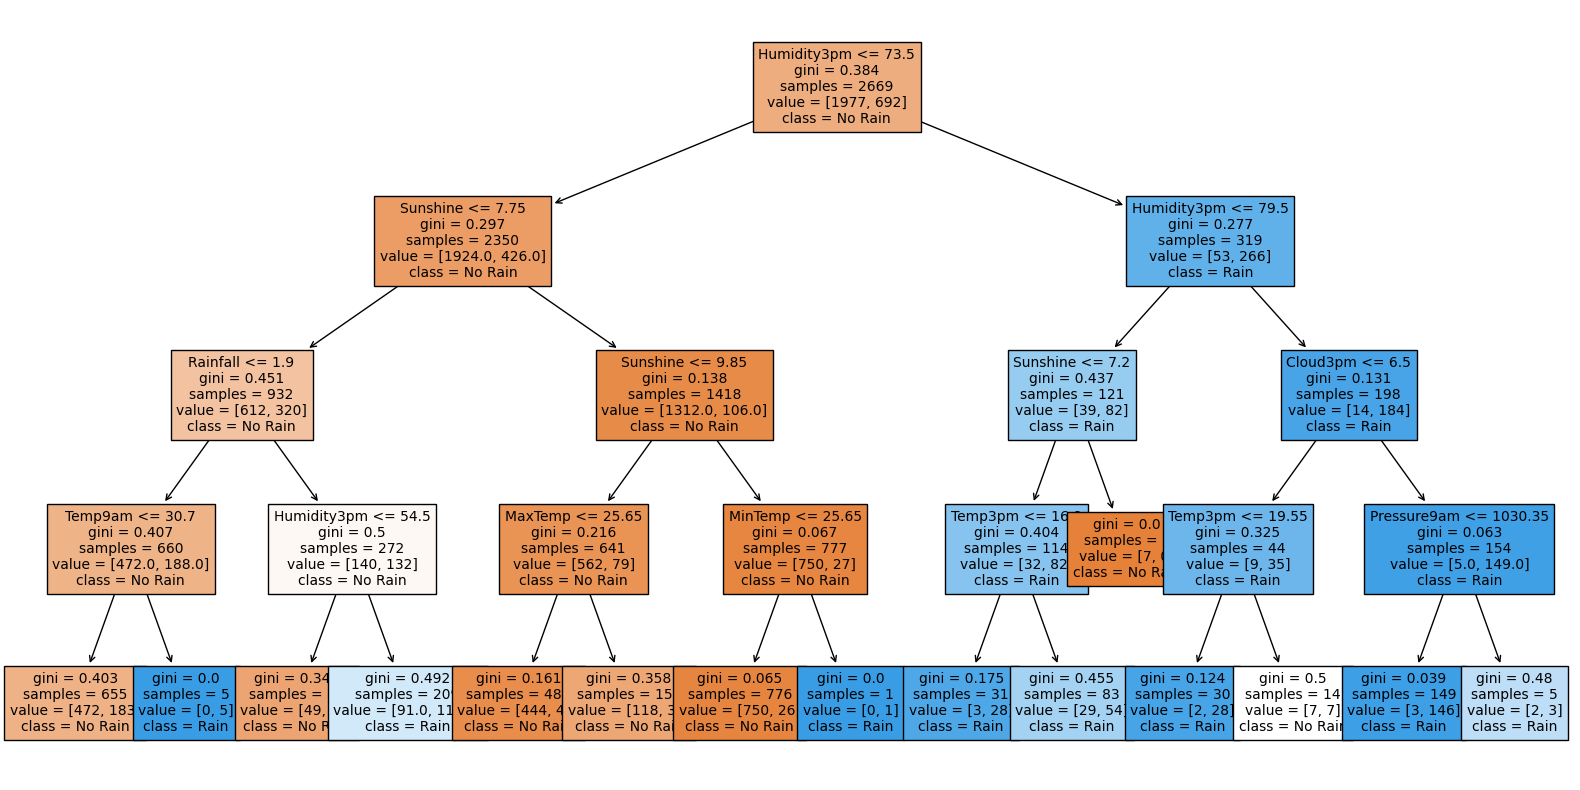

In [123]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True, fontsize=10)
plt.show()

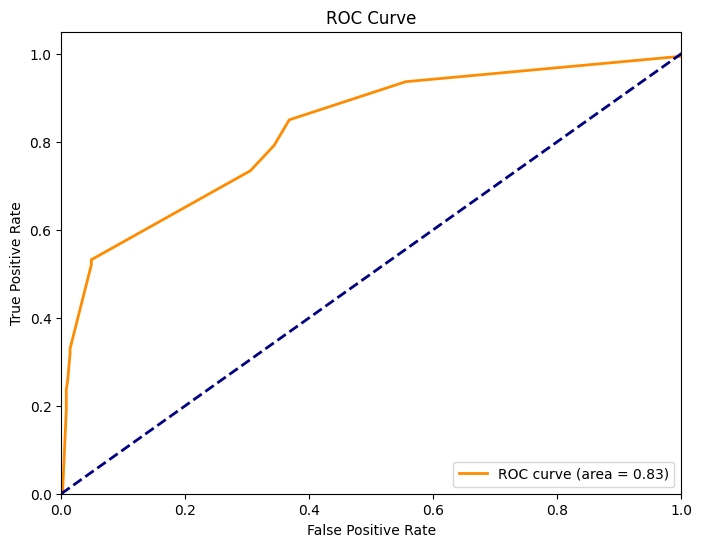

ROC AUC Score: 0.8252174928475506


In [124]:

y_pred_proba6 = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba6)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)



### Model Training - Grid Score

In [125]:
from sklearn.model_selection import  GridSearchCV

In [126]:
# Grid Search for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=0)

In [127]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [128]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [129]:
# Best parameters
print("Best parameters found by Grid Search:", grid_search.best_params_)

Best parameters found by Grid Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [130]:
# Best estimator
best_rf_classifier = grid_search.best_estimator_

# Predictions
rf_predictions = best_rf_classifier.predict(X_test)


In [131]:
# Best estimator
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=0)

In [132]:
# Predictions
rf_predictions = best_rf_classifier.predict(X_test)
rf_predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [133]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy after Grid Search:", rf_accuracy)

Random Forest Accuracy after Grid Search: 0.8413173652694611


In [134]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm

array([[479,  16],
       [ 90,  83]], dtype=int64)

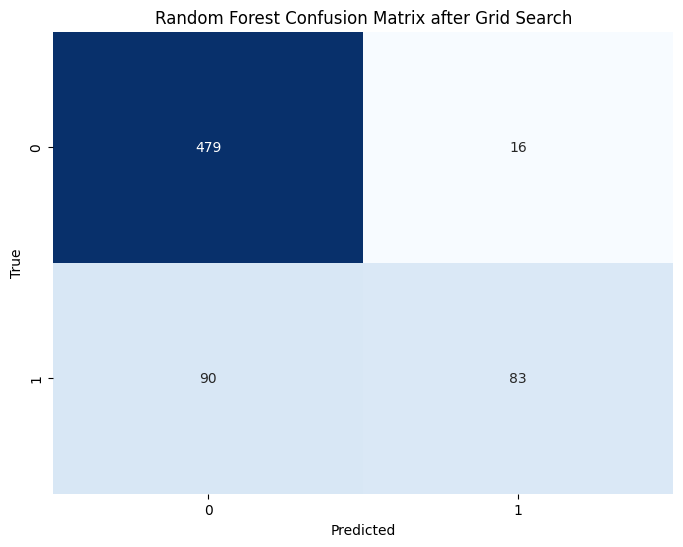

In [135]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix after Grid Search')
plt.show()


Comparing RandomForestClassifier, AdaBoostClassifier and DecisionTreeClassifier

C:\Users\Ideapad Gaming 3\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree Accuracy: 0.8398203592814372
Random Forest Accuracy: 0.8248502994011976
AdaBoost Accuracy: 0.8353293413173652


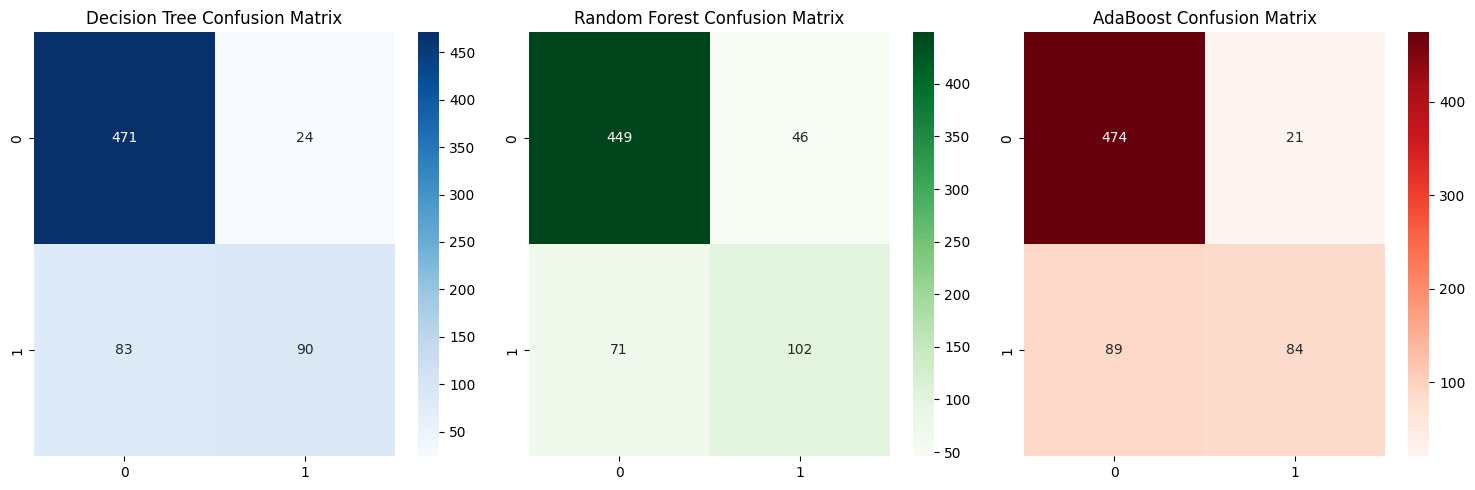

In [136]:

dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)

# Boosting with AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)


# Evaluate Models
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("AdaBoost Accuracy:", adaboost_accuracy)

# Create confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
adaboost_cm = confusion_matrix(y_test, adaboost_predictions)

# Step 6: Select Best Model
# Compare models based on accuracy scores and confusion matrices

# Step 7: Discussion
# Analyze why the selected model performed better and suggest ways to improve its accuracy

# Visualize confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(adaboost_cm, annot=True, cmap='Reds', fmt='g')
plt.title('AdaBoost Confusion Matrix')

plt.tight_layout()
plt.show()


### Comparing to get the best model

In [137]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "Support Vector Classifier": SVC(),
    "dt" :DecisionTreeClassifier(max_depth=4),
    "grid_search ": GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
}



In [138]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

C:\Users\Ideapad Gaming 3\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [139]:
# Sort models by accuracy
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))



C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_22400\1370586034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_results.values()), y=list(sorted_results.keys()), palette='viridis')


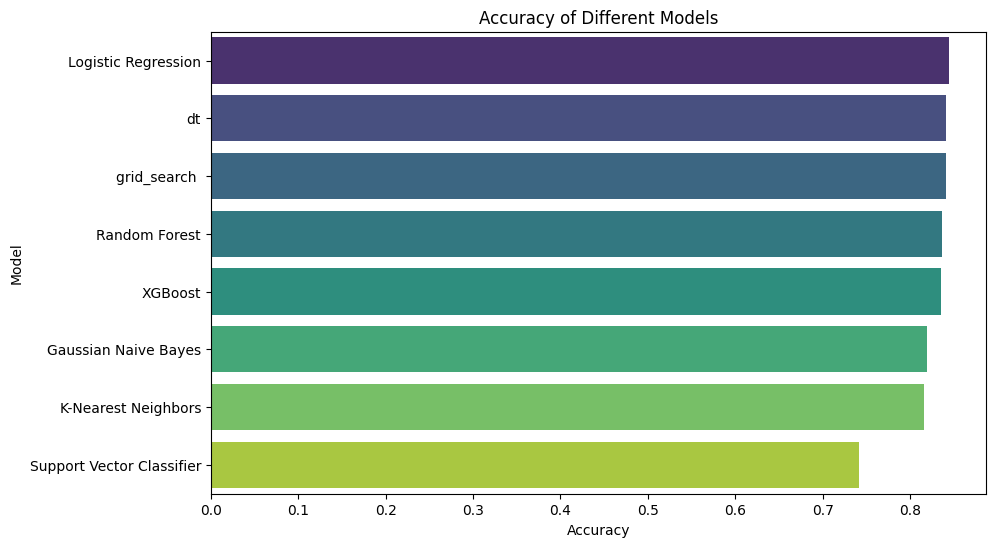

In [140]:
# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_results.values()), y=list(sorted_results.keys()), palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models')
plt.show()


In [141]:
# Print best model
best_model_name = list(sorted_results.keys())[0]
best_model_accuracy = sorted_results[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}.")

The best model is Logistic Regression with an accuracy of 0.84.
